# **LDD 1C-2025**

**Librerías necesarias**

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy
import seaborn as sns  # Para los boxplot
import seaborn.objects as so
import statistics
import sympy as sp

from formulaic import Formula  # Para obtener las matrices del modelo definido con la fórmula en la notación de Wilkinson
from IPython.display import Markdown  # Para usar latex en strings
from pathlib import Path
from sklearn import linear_model  # Herramientas de modelos lineales
from sklearn.cluster import KMeans # Para clustering
from sklearn.cluster import DBSCAN # Para clustering
from sklearn.datasets import make_blobs, make_circles # Para generar datos
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error  # Medidas de desempeño
from sklearn.preprocessing import MinMaxScaler  # Para escalamiento MinMax de las variables
from sklearn.preprocessing import PolynomialFeatures  # Herramientas de polinomios
from sklearn.preprocessing import StandardScaler  # Para escalamiento estándar de las variables
from sklearn.model_selection import train_test_split, KFold, cross_val_score  # Para entrenamiento, testo y validación
from sklearn.neighbors import NearestNeighbors  # Para obtener los vecinos más cercanos
from statistics import mode

**Otras**

In [3]:
# # Chequear que activé el entorno correcto
# import sys
# print(sys.executable)  

# # Ver nombres de colores para las visualizaciones
# import matplotlib.colors as mcolors
# from IPython.display import display, HTML

# def get_text_color(bg_color):
#     # Convertir color a RGB y calcular brillo
#     r, g, b = mcolors.to_rgb(bg_color)
#     brightness = (0.299 * r + 0.587 * g + 0.114 * b)
#     return "white" if brightness < 0.5 else "black"

# color_html = "<div style='display: flex; flex-wrap: wrap;'>"
# for color_name in mcolors.CSS4_COLORS:
#     text_color = get_text_color(color_name)
#     color_html += f"""
#     <div style='width: 100px; height: 50px; margin: 5px; 
#                  background-color: {color_name}; 
#                  border: 1px solid black; 
#                  display: flex; 
#                  justify-content: center; 
#                  align-items: center;
#                  font-size: 10px;
#                  color: {text_color};'>  <!-- Color dinámico -->
#         {color_name}
#     </div>
#     """
# color_html += "</div>"
# display(HTML(color_html))

## **EJERCICIOS DEL PRIMER CUADERNO**

### Norma
**Ejercicio.** Definir una función que calcule la **norma** (euclideana o **L2**) de un vector. *\[La "L" hace referencia a la teoría de los espacios de Lebesgue]* 

In [4]:
def normaL2(arr):
    return np.round(np.sqrt(np.sum(arr**2)), 2)

v = np.array([1,2,3])
normaL2(v)

np.float64(3.74)

### Azar
**Ley de los grandes números.** Esta ley asegura que si tiramos $n$ veces una moneda, el promedio de veces que sale cara tiende a $1/2$ cuando $n$ tiende a infinito.

Simular 10 lanzamientos de una moneda y calcular el promedio de veces que sale cara. Repetir para $n = 1000$ y $n = 100.000$.

**Ejercicio.** Se tira $n$ veces una moneda. Intentar predecir, si existen, los siguientes límites cuando $n$ tiene a infinito y verificar la intuición mediante simulaciones.

1. La cantidad de caras dividido por la cantidad de cecas:   **\[$\to 1$ cuando $n \to \infty$\]**
2. La cantidad de caras menos la cantidad de cecas:  **\[$\to$ una cantidad cada vez más pequeña de lanzamientos, cuando $n \to \infty$\]**
3. La cantidad de caras menos la cantidad de cecas, divido por la cantidad total de tiradas: **\[$\to 0$ cuando $n \to \infty$\]**
4. Considerando las veces que salieron tres caras seguidas, el promedio de veces que en la siguiente tirada sale nuevamente cara. **\[$\to 0.5$ cuando $n \to \infty$\]**

In [5]:
resultados_posibles = np.array (['cara','ceca'])
lanzamientos = 100000
simulacion = np.random.choice(resultados_posibles, size = lanzamientos)
es_cara = np.where(simulacion == 'cara', True, False)

#1
caras = np.sum(np.where(es_cara == True, 1, 0))
cecas = es_cara.size - caras
rel_caras_cecas = np.round(caras / cecas,3)
print(f'Caras entre cecas: {rel_caras_cecas}')

#2 
print(f'Caras - cecas: {caras - cecas}')

#3
print(f'(Caras - cecas) / tiradas: {np.round((caras - cecas) / lanzamientos, 3)}')


#4
def veces_seguidas(caras):
    indices_caras = np.where(caras == True)[0]
    indices_tres_seguidas = np.where(
        (indices_caras[:-2] - indices_caras[1:-1] == -1) &
        (indices_caras[:-2] - indices_caras[2:] == -2)
    )[0]

    if indices_tres_seguidas.size > 0:
        n = 0
        i = 1
        total3 = 1
        total4 = 0
        while i < indices_tres_seguidas.size:
            if indices_tres_seguidas[i] > n+2:                 
                if caras[i + 1] == True:  # Registro que hubo 4 seguidas
                    total4 += 1            
                total3 += 1 # Registro que hubo 3 seguidas
                n = indices_tres_seguidas[i]  # Actualizo la referencia                
            i += 1
        return total3, total4

veces = veces_seguidas(es_cara)
tres_seguidas = veces[0]
cuatro_seguidas = veces[1]
aux = f'El {np.round((cuatro_seguidas / tres_seguidas) * 100, 2)}% de las veces que salieron tres caras seguidas, '
aux = aux + 'la cuarta tambien fue cara.'
print(aux)

Caras entre cecas: 0.993
Caras - cecas: -376
(Caras - cecas) / tiradas: -0.004
El 50.21% de las veces que salieron tres caras seguidas, la cuarta tambien fue cara.


### Archivos de datos

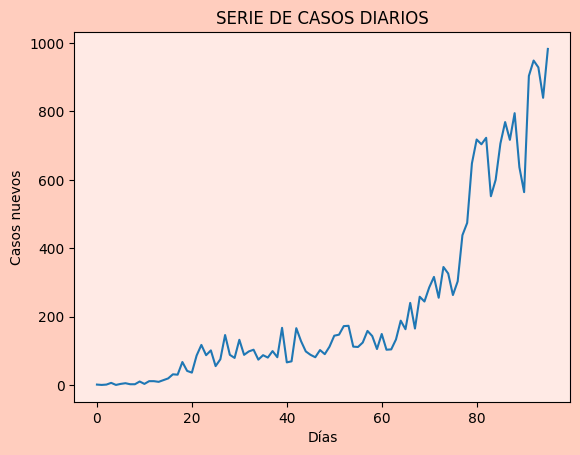

In [6]:
ruta_a_casos = (Path(os.getcwd()) / 'recs' / 'casos_coronavirus.csv').resolve()  # Para que funcione en Windows 

casos_covid = pd.read_csv(ruta_a_casos)  # Dataframe de casos
#casos_covid.head()  # Permite inspeccionar los datos
#casos_covid.info()  # Devuelve índices y estructura del dataframe


# Gráfico 1: serie de casos diariosb
casos_diarios = casos_covid.confirmados_Nuevos.values  # {dataframe}.{columna}.values
plt.plot(casos_diarios)
# Información
plt.title("SERIE DE CASOS DIARIOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos nuevos')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Suma acumulada** 
Consiste en sumar en cada celda el valor actual más todos los registros anteriores de esa columna. Fórmula: <span style='color: #ff3815'>$\displaystyle s_i = \sum_{k=1}^{i} c_k$ </span>

1. $i$ indica el registro para el cual se está calculando la suma *(de 1 hasta i)*.
2. $c_k$ es el valor de la columna en el k-ésimo registro.

---
<span style='color:#11ffbc'>Al suavizar la **fluctuación** entre valores consecutivos de una serie de datos que crece con el tiempo, permite visualizar la **tendencia general**, sin la influencia de las **variaciones a corto plazo** </span>.

---

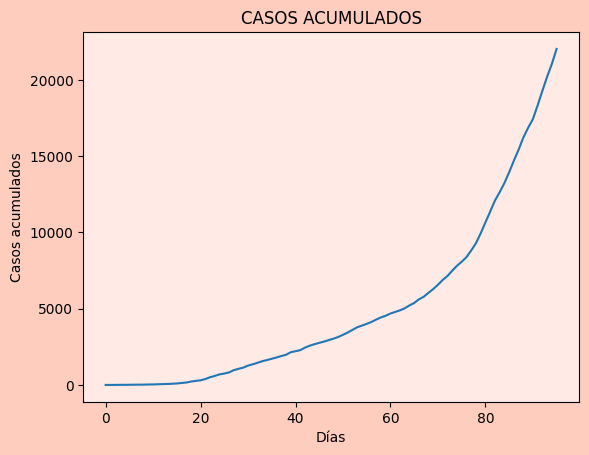

In [7]:
# Gráfico 2: cantidad de casos acumulados
casos_acumulados = casos_diarios.cumsum()  # Suma acumulada
plt.plot(casos_acumulados)
# Información
plt.title("CASOS ACUMULADOS")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('Casos acumulados')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

#### **Linealizar**
En escala logarítmica, los crecimientos **exponenciales** (o con una tendencia similar) se tranforman a una relación aproximadamente **lineal**: el comportamiento de los datos se vuelve más **predecible** al suavizar la curva. La clave es asociar la **pendiente** a la **tasa de cambio** del fenómeno: 

- Pendiente constante $\leadsto$ crecimiento exponencial constante
- Pendiente decreciente $\leadsto$ desaceleración de casos
- Pendiente creciente $\leadsto$ aceleración de casos

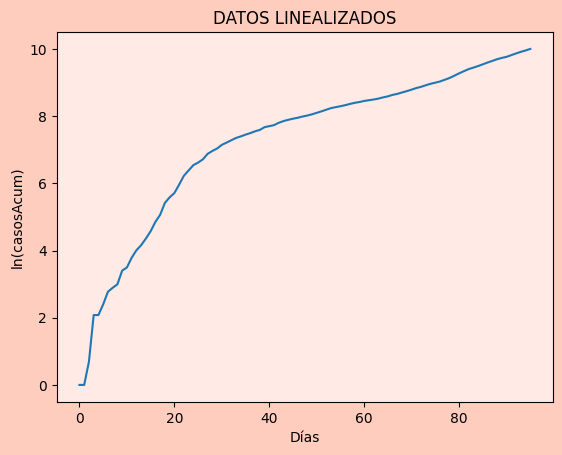

In [8]:
# Gráfico 3: datos linealizados
casos_acum_decim = np.float64(casos_acumulados)  # Enteros a punto flotante
log_casos_acum = np.log(casos_acum_decim)  # Le tomo el logaritmo natural
plt.plot(log_casos_acum)
# Información
plt.title("DATOS LINEALIZADOS")
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('ln(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

##### Linealizar (alt.)

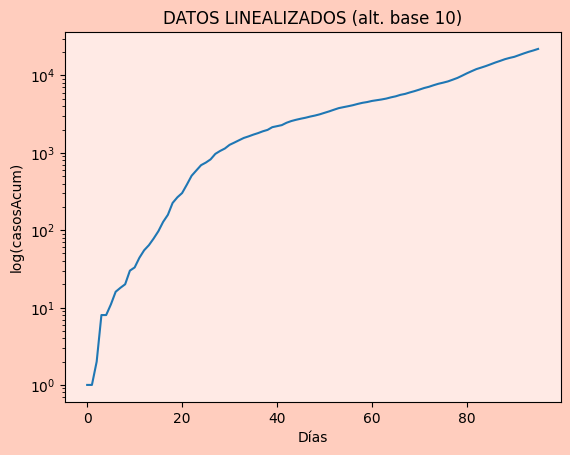

In [9]:
plt.plot(casos_acumulados)
plt.yscale('log')  # En base 10 (ln: plt.yscale('log', basey=np.e))
# Información
plt.title("DATOS LINEALIZADOS (alt. base 10)")  # Título del gráfico
plt.xlabel('Días')  # Etiqueta del eje horizontal
plt.ylabel('log(casosAcum)')  # Etiqueta del eje vertical
# Estilo
ax = plt.gca()  
ax.set_facecolor("#ffeae5")  # Color de fondo del gráfico
plt.gcf().patch.set_facecolor('#ffcdbe')  # Color de fondo del marco
plt.show()

## **EJERCICIOS GUÍA 3**: *visualización*

### Ejercicio 1

#### a) Curva de la expectativa de vida en Argentina en función del año *(datos de Gapminder)*

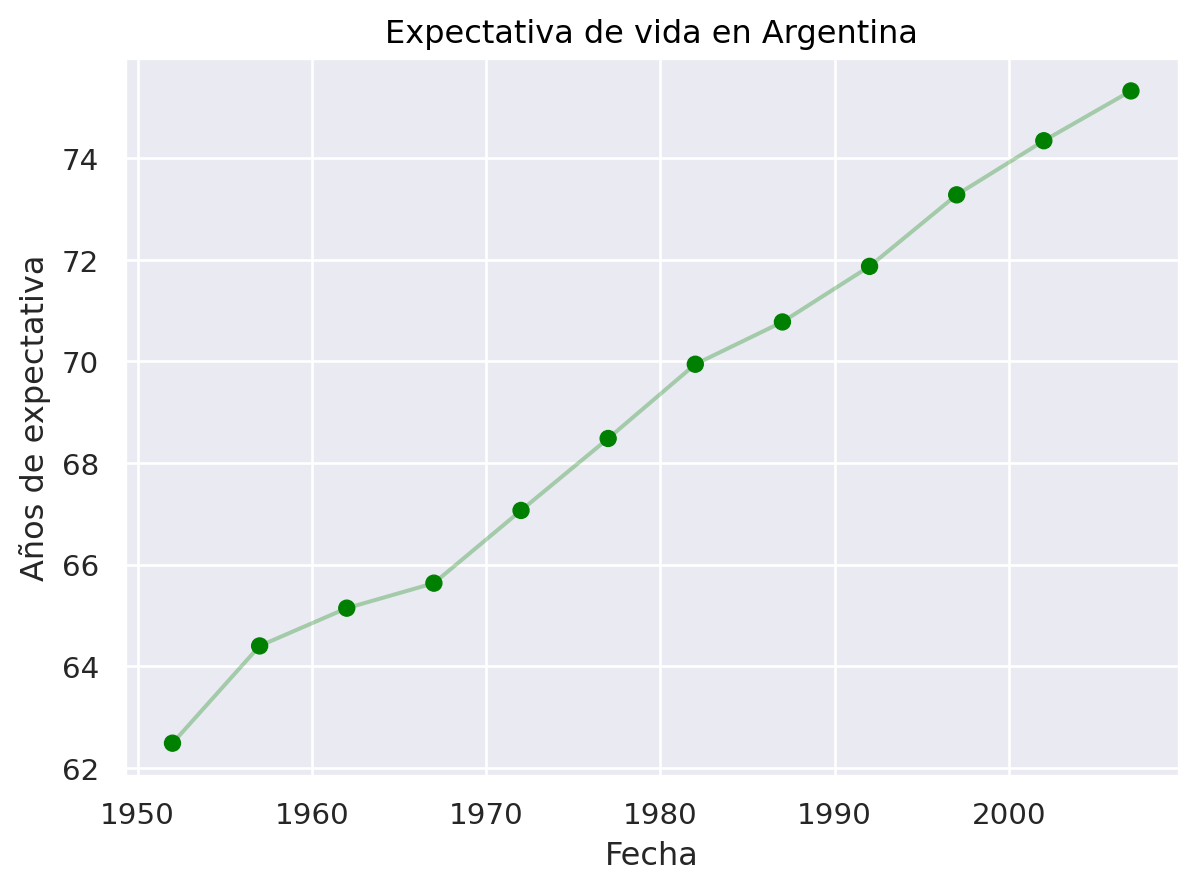

In [10]:
from gapminder import gapminder

# Obtengo los datos
datos_arg = gapminder[gapminder['country']=='Argentina'].reset_index(drop=True)

# Visualizo
(
    so.Plot(data=datos_arg, x='year', y='lifeExp')
    .add(so.Line(color='green', alpha=0.3))
    .add(so.Dot(color='green', alpha=1))
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en Argentina"
    )
)

#### b) Curvas de la expectativa de vida de los paı́ses de América en función del año

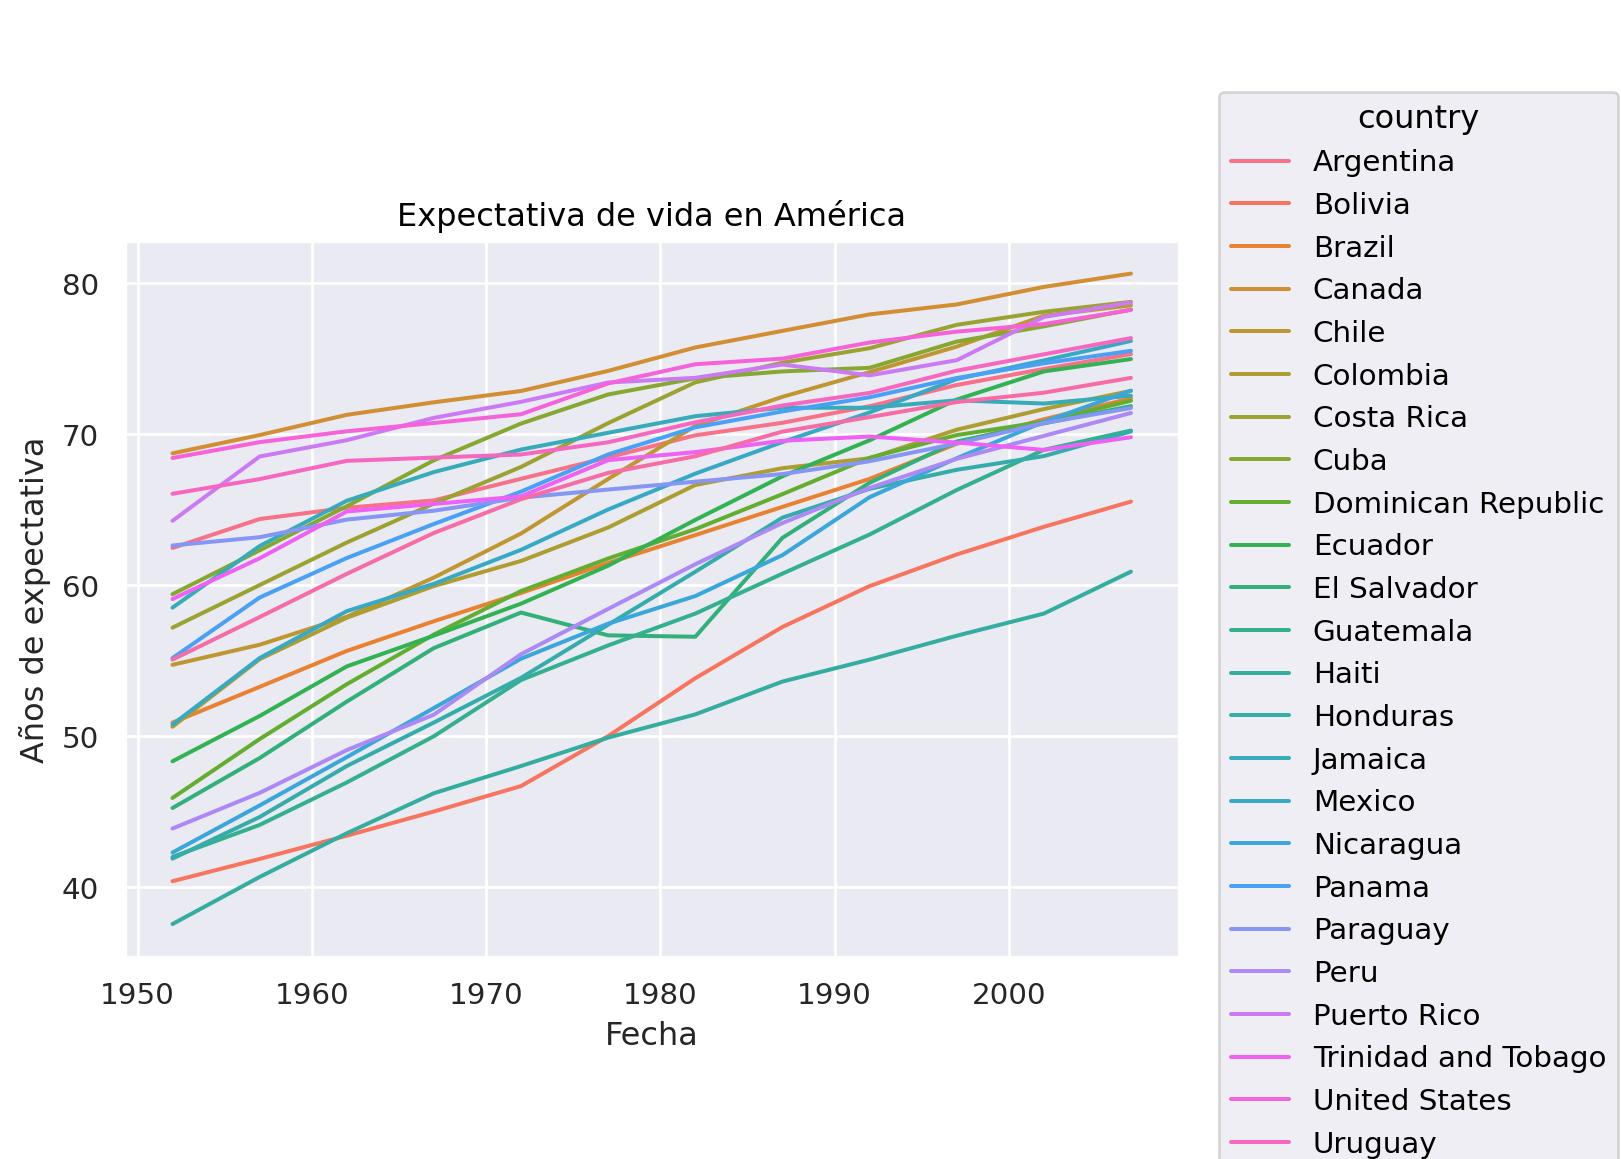

In [11]:
datos_america = gapminder[gapminder['continent'] == 'Americas']

(
    so.Plot(data=datos_america, x='year', y='lifeExp', group='country', color='country')
    .add(so.Line())
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Expectativa de vida en América"
    )
)

#### c) Curva de tendencia

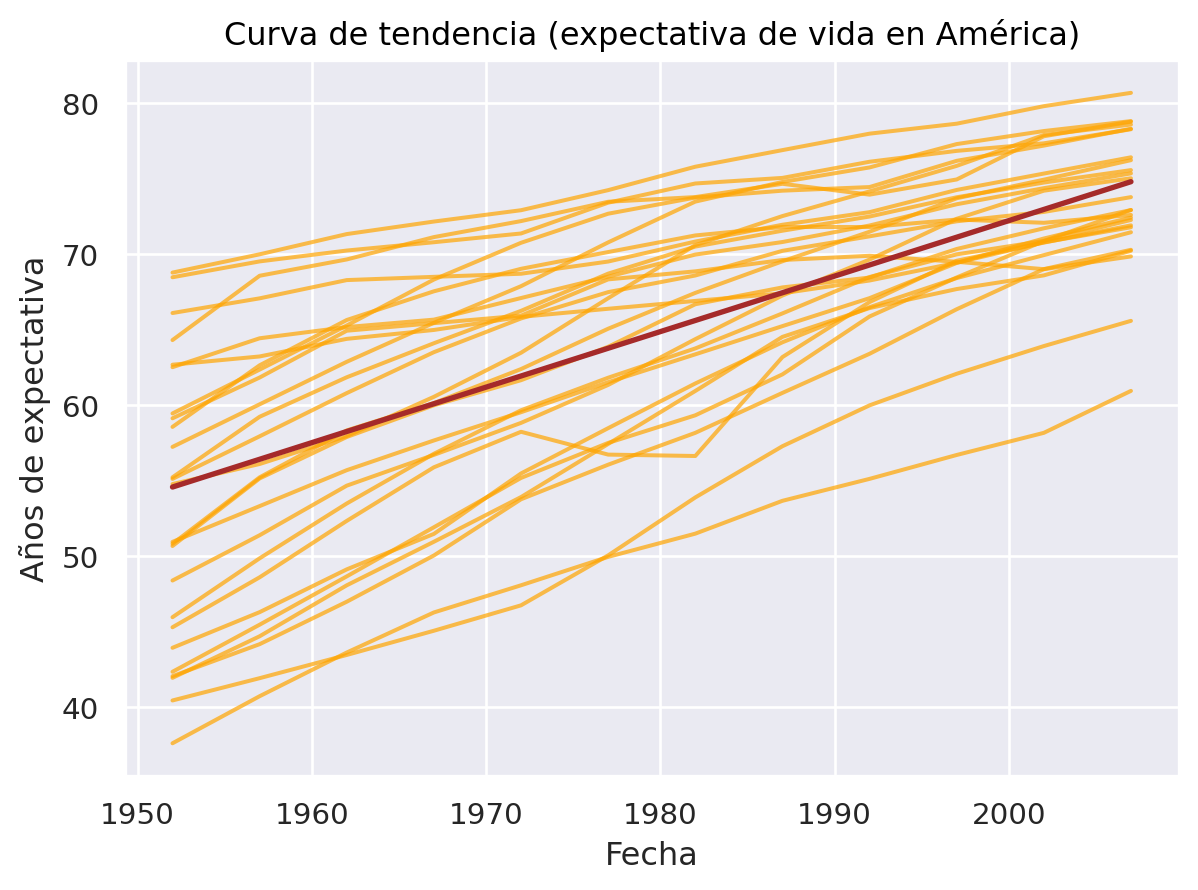

In [12]:
(
    so.Plot(data=datos_america, x='year', y='lifeExp')
    .add(so.Line(color='orange', alpha=0.7), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))  # Con '2' genero regresión cudrática en lugar de lineal
    .label(
        x="Fecha",
        y="Años de expectativa",
        title="Curva de tendencia (expectativa de vida en América)"
    )
)

#### d) Curvas de expectativa agrupadas por continente

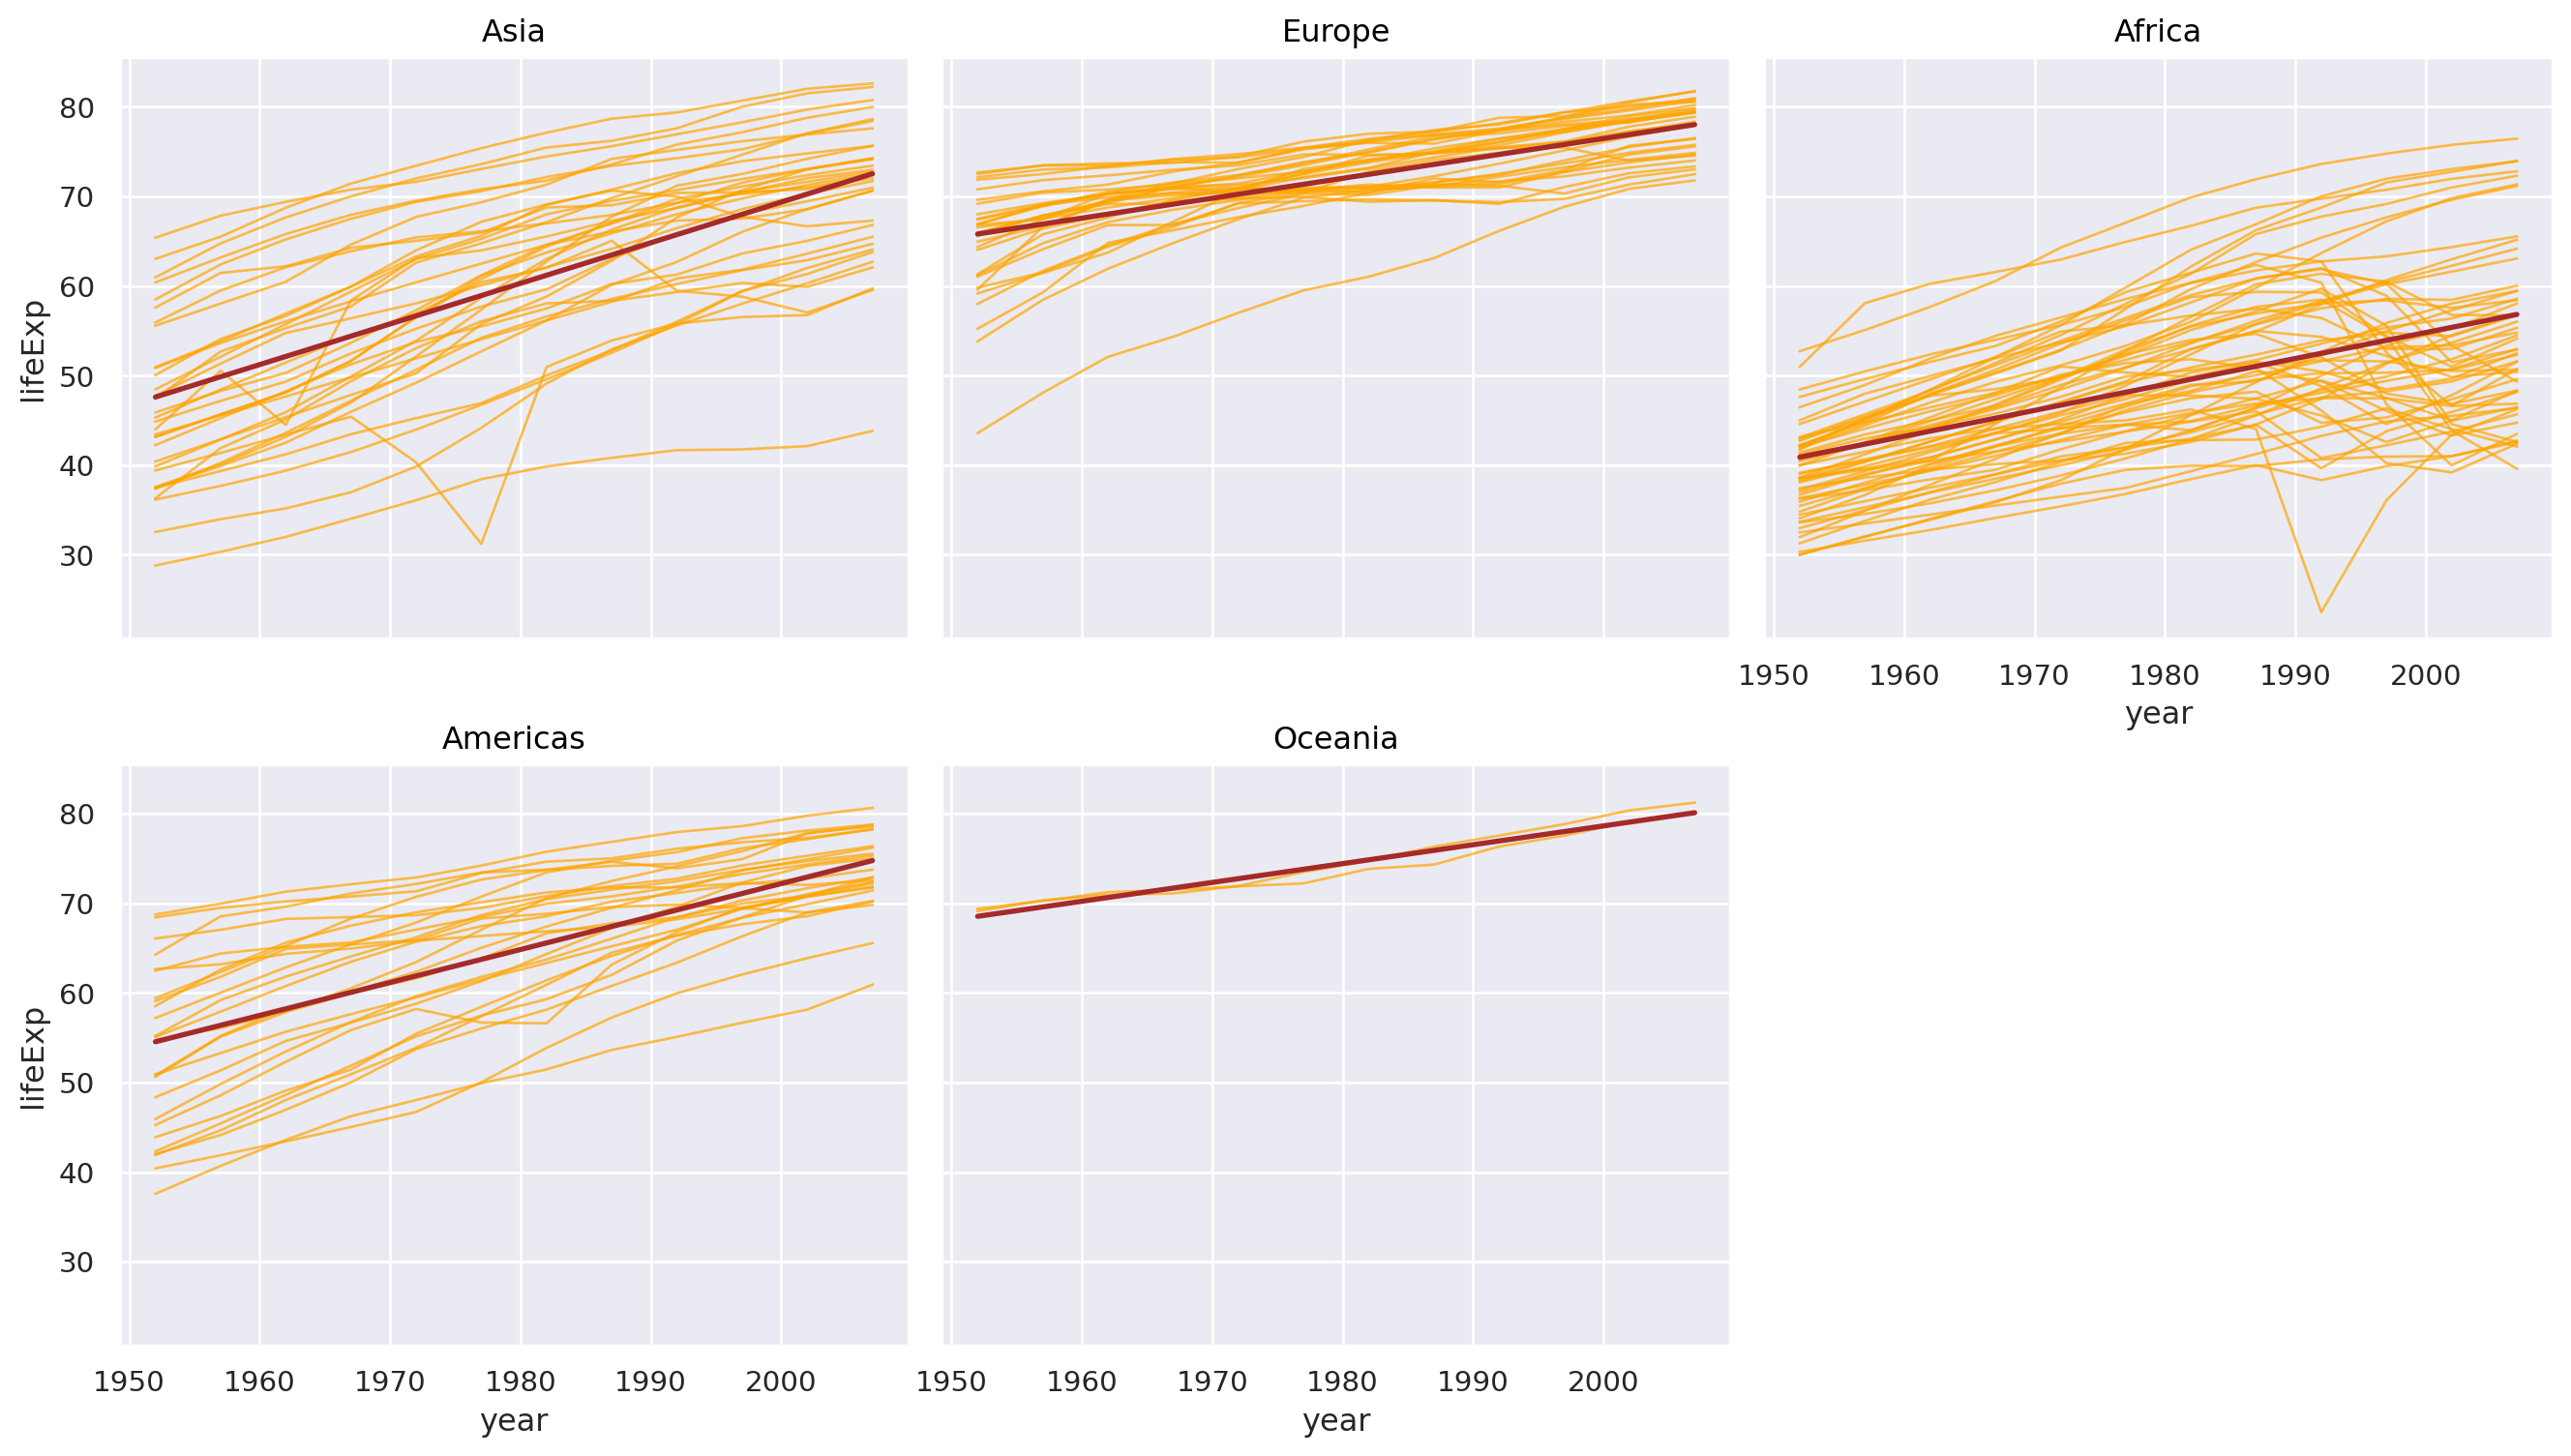

In [13]:
(
    so.Plot(data = gapminder, x='year', y='lifeExp')
    .add(so.Lines(color='orange', alpha=0.7, linewidth=1), group='country')
    .add(so.Line(color='brown', linewidth=2), so.PolyFit(1))
    .facet('continent', wrap=3)
    .layout(size=(14, 8))
)

### Ejercicio 2

In [37]:
pings = sns.load_dataset('penguins') 
print(pings)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

### Ejercicio 3

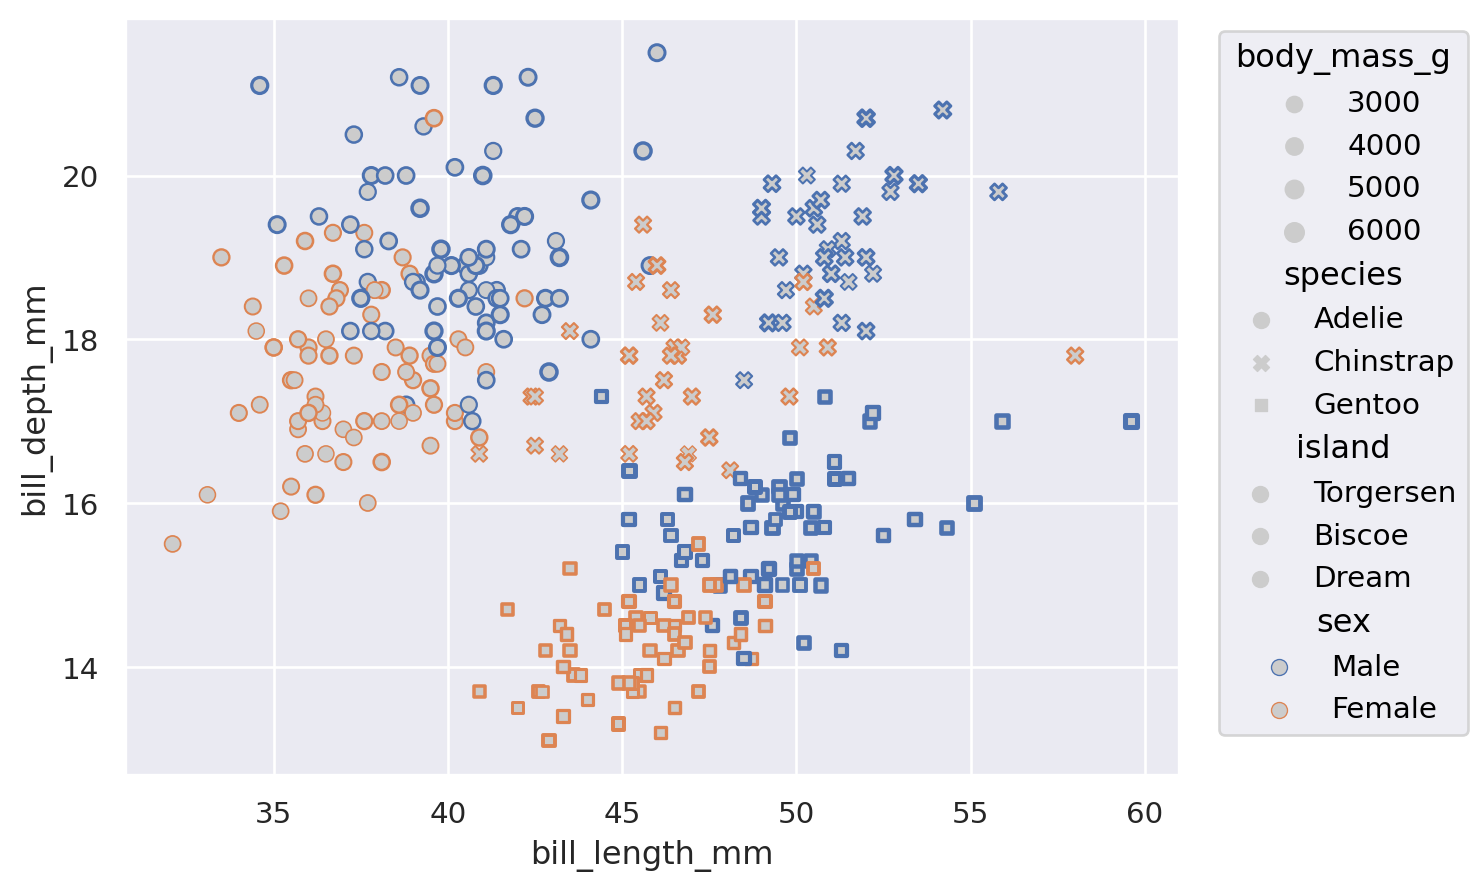

In [15]:
(
    so.Plot(
        data=pings, x='bill_length_mm', y='bill_depth_mm',
        edgewidth='body_mass_g', marker='species',
        linestyle='island', color='species'
    )
    .add(so.Dot(color='.8'), edgecolor='sex')
)

### Ejercicio 4
Al codificar la especie por medio del color de la marca, se entiende mejor la distribución de los datos en subgrupos.


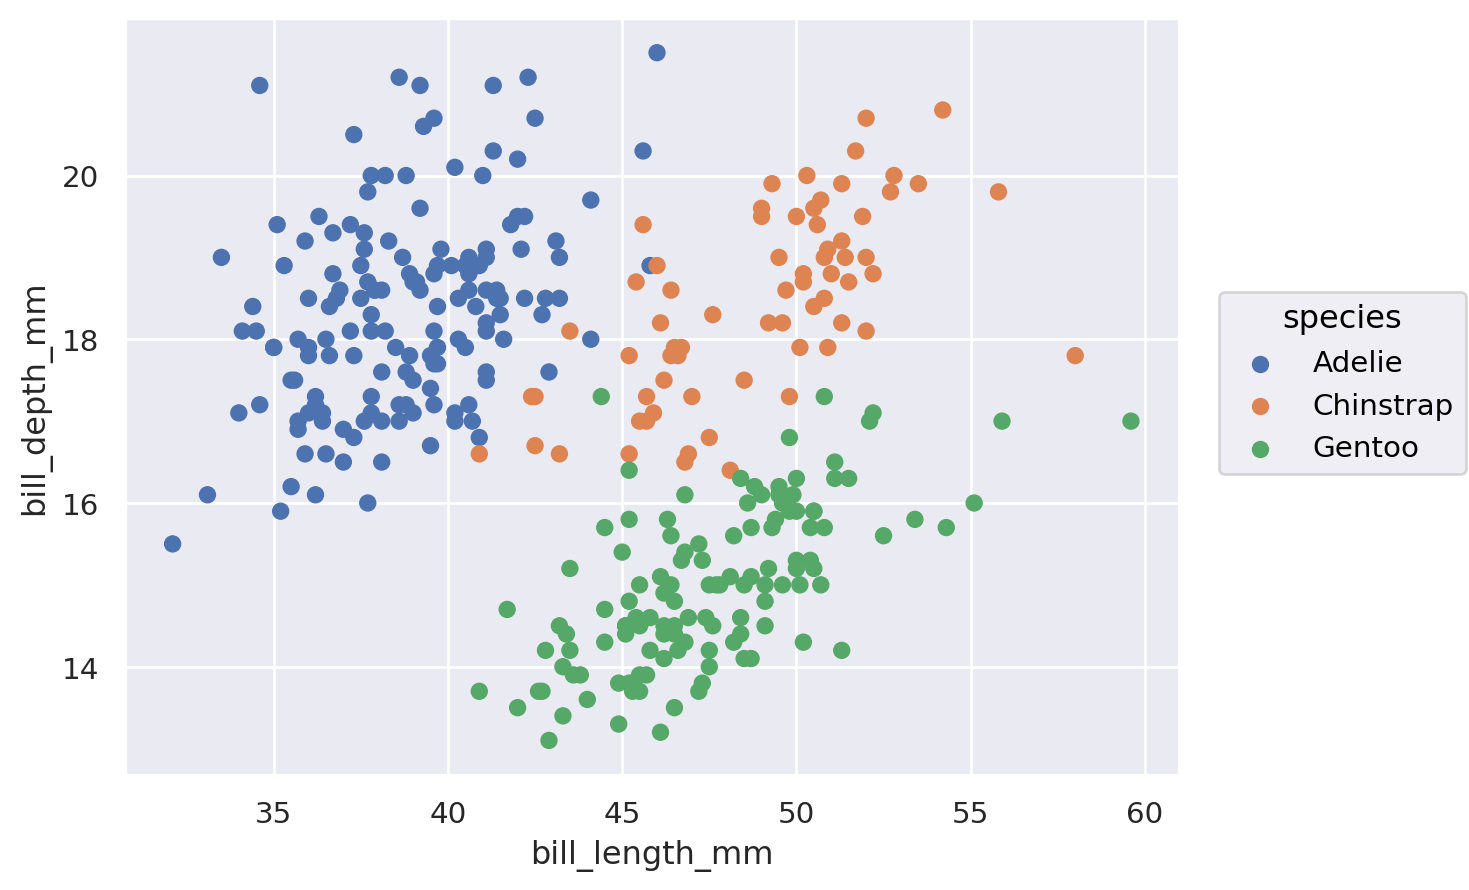

In [16]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species')
)

### Ejercicio 5

In [43]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
)

#### a)
En cada especie, los machos tienden a tener el pico más grande.

#### b)

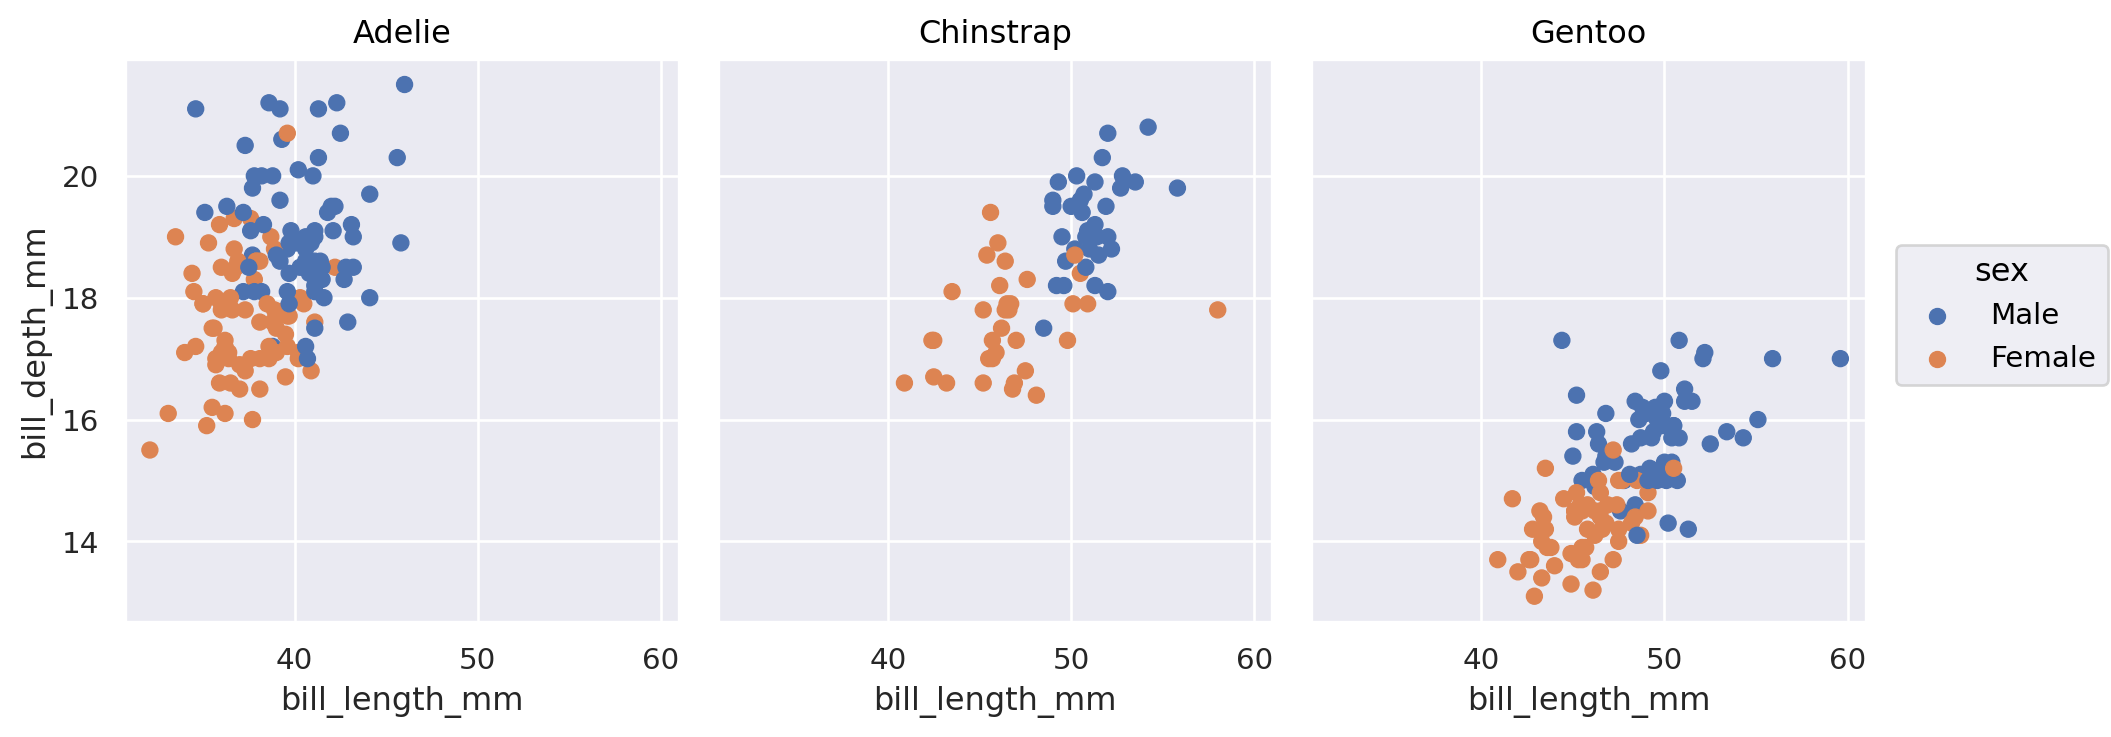

In [18]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='sex')
    .facet('species')
    .layout(size=(10, 4))
)

### Ejercicio 6
#### a)

In [19]:
pings.groupby('island').size()

island
Biscoe       168
Dream        124
Torgersen     52
dtype: int64

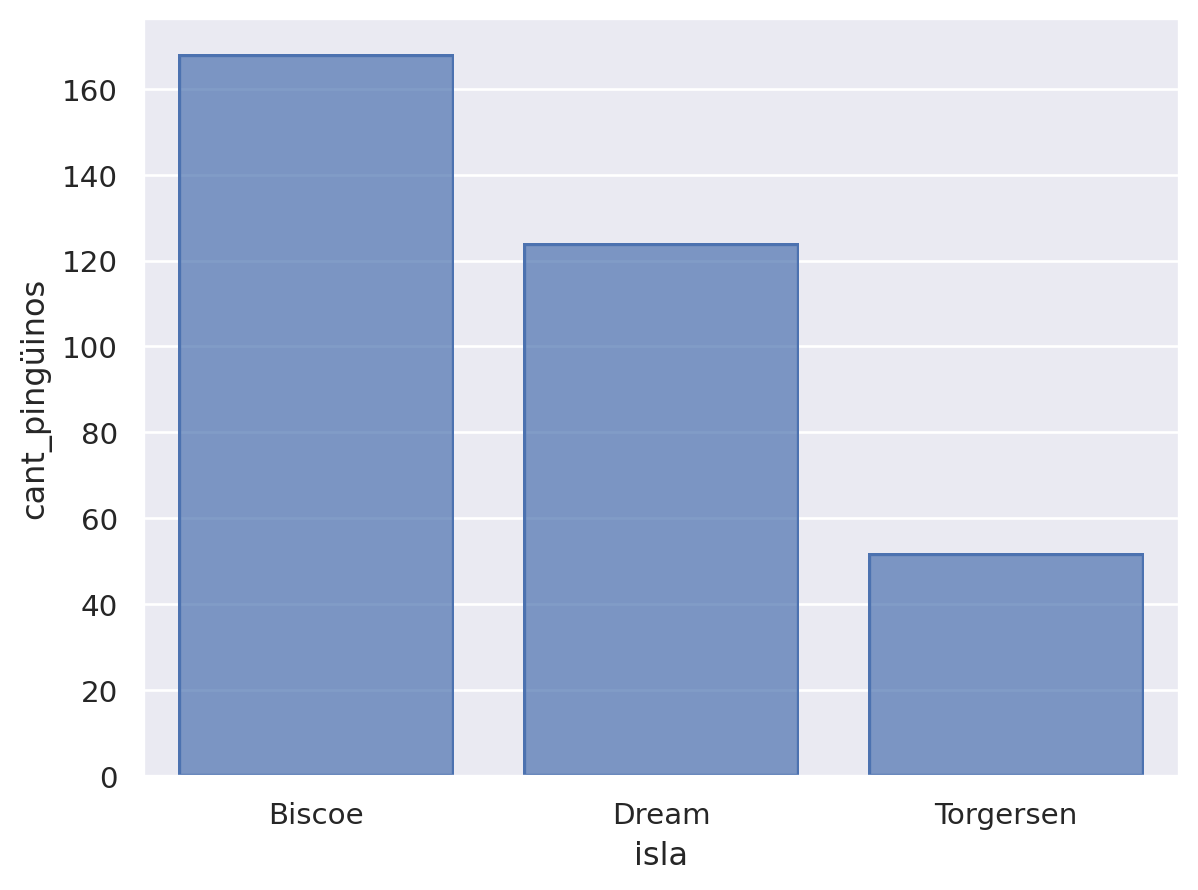

In [51]:
pings_por_isla = pings.groupby('island').size().reset_index(name='cant_pingüinos')
pings_por_isla.rename(columns={'island':'isla'}, inplace=True)
# display(pings_por_isla)

(
    so.Plot(data=pings_por_isla, x='isla', y='cant_pingüinos')
    .add(so.Bar())
)

#### c, d) 
Puedo hacer el **histograma** directamente, donde *"el tamaño de la barra representa la cantidad de veces que se repite cada valor de la variable categórica en la serie"*: el **eje y** codifica **cantidades** o **frecuencias**.

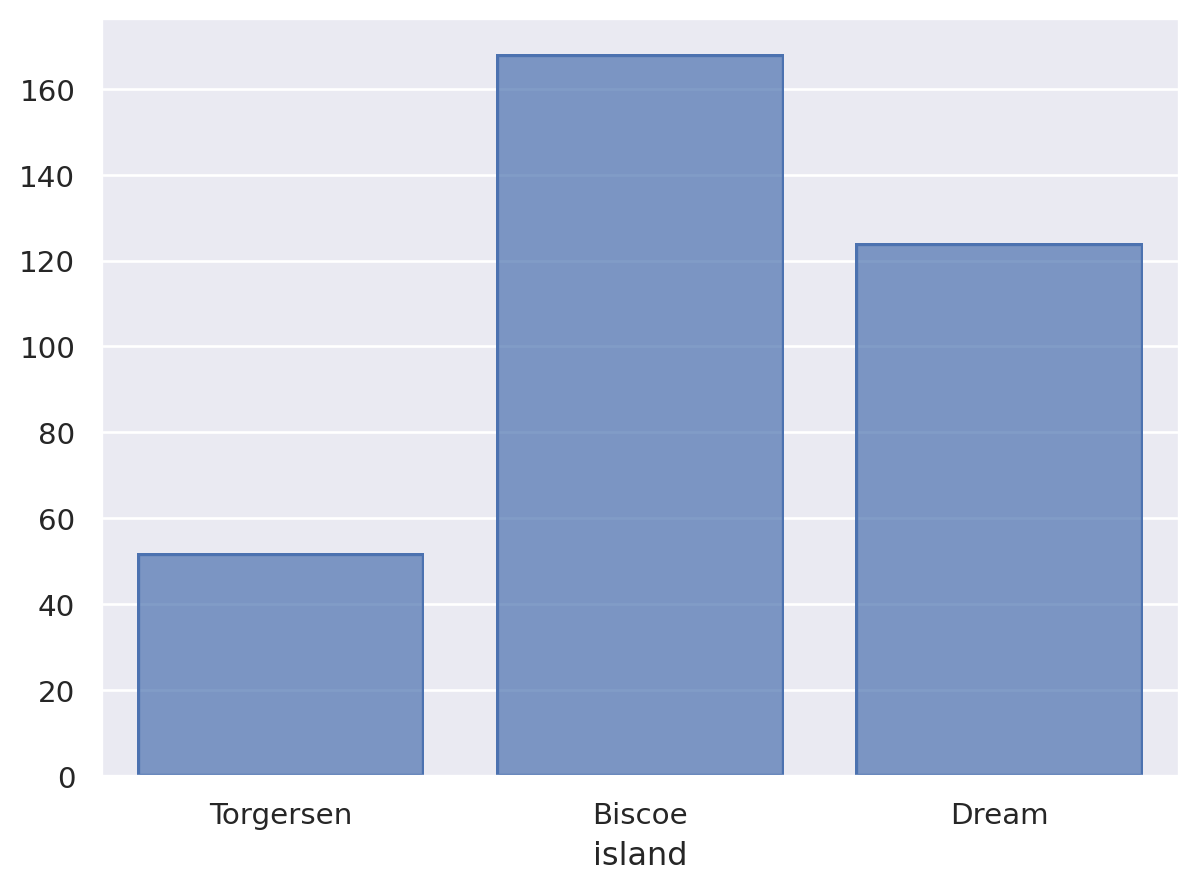

In [53]:
(
    so.Plot(data = pings, x='island')
    .add(so.Bar(), so.Hist())
)

#### e)

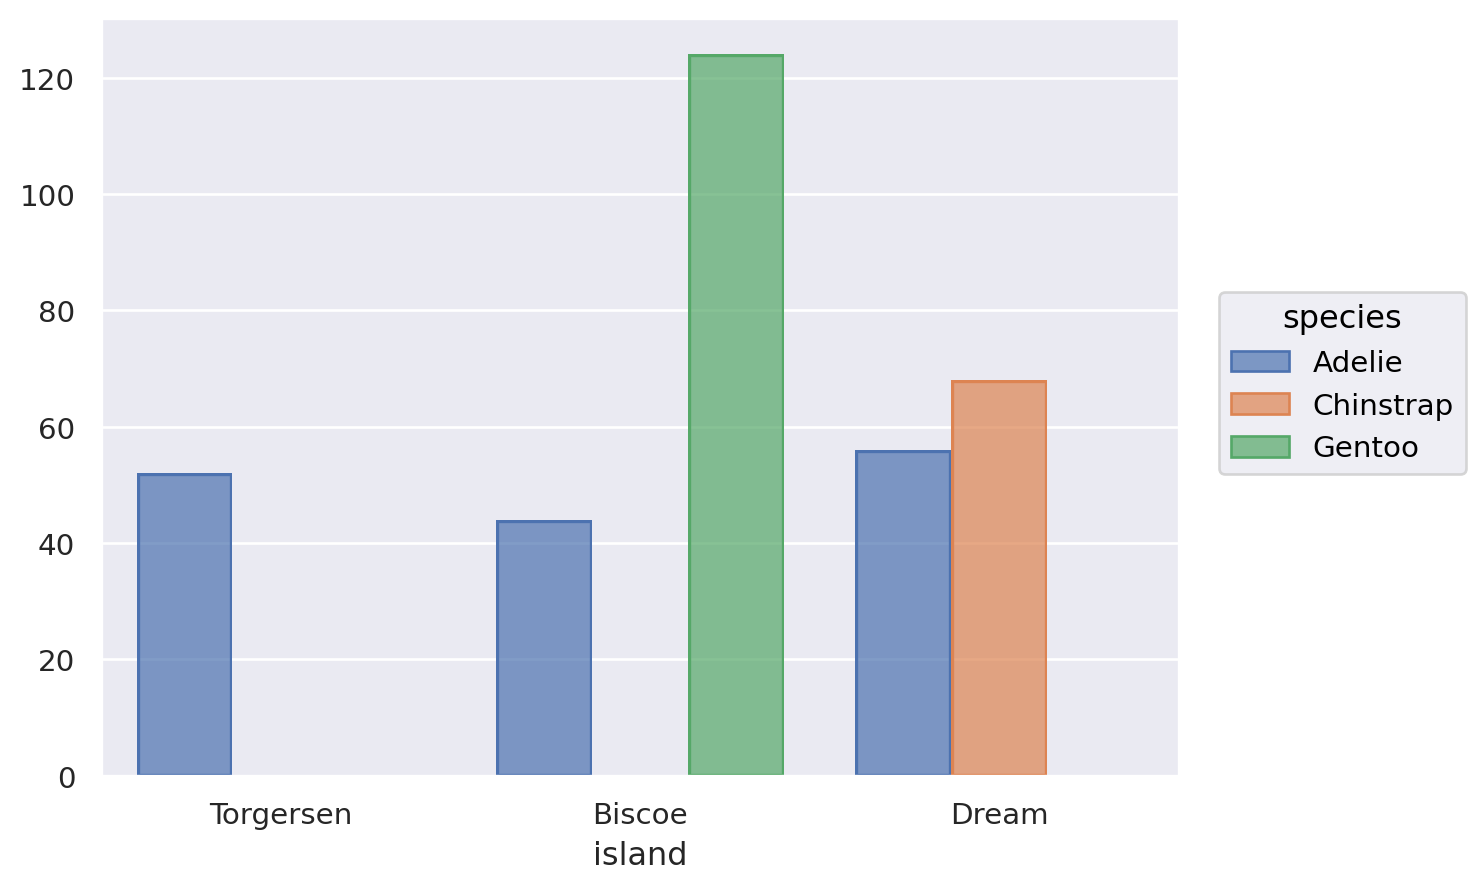

In [58]:
(
    so.Plot(data=pings, x='island')
    # Dodge crea barras distintas según las categorías
    # especifícadas en color='...'
    .add(so.Bar(), so.Hist(), so.Dodge(), color='species')  
)

#### f)
Misma visualización pero usando `facet()`

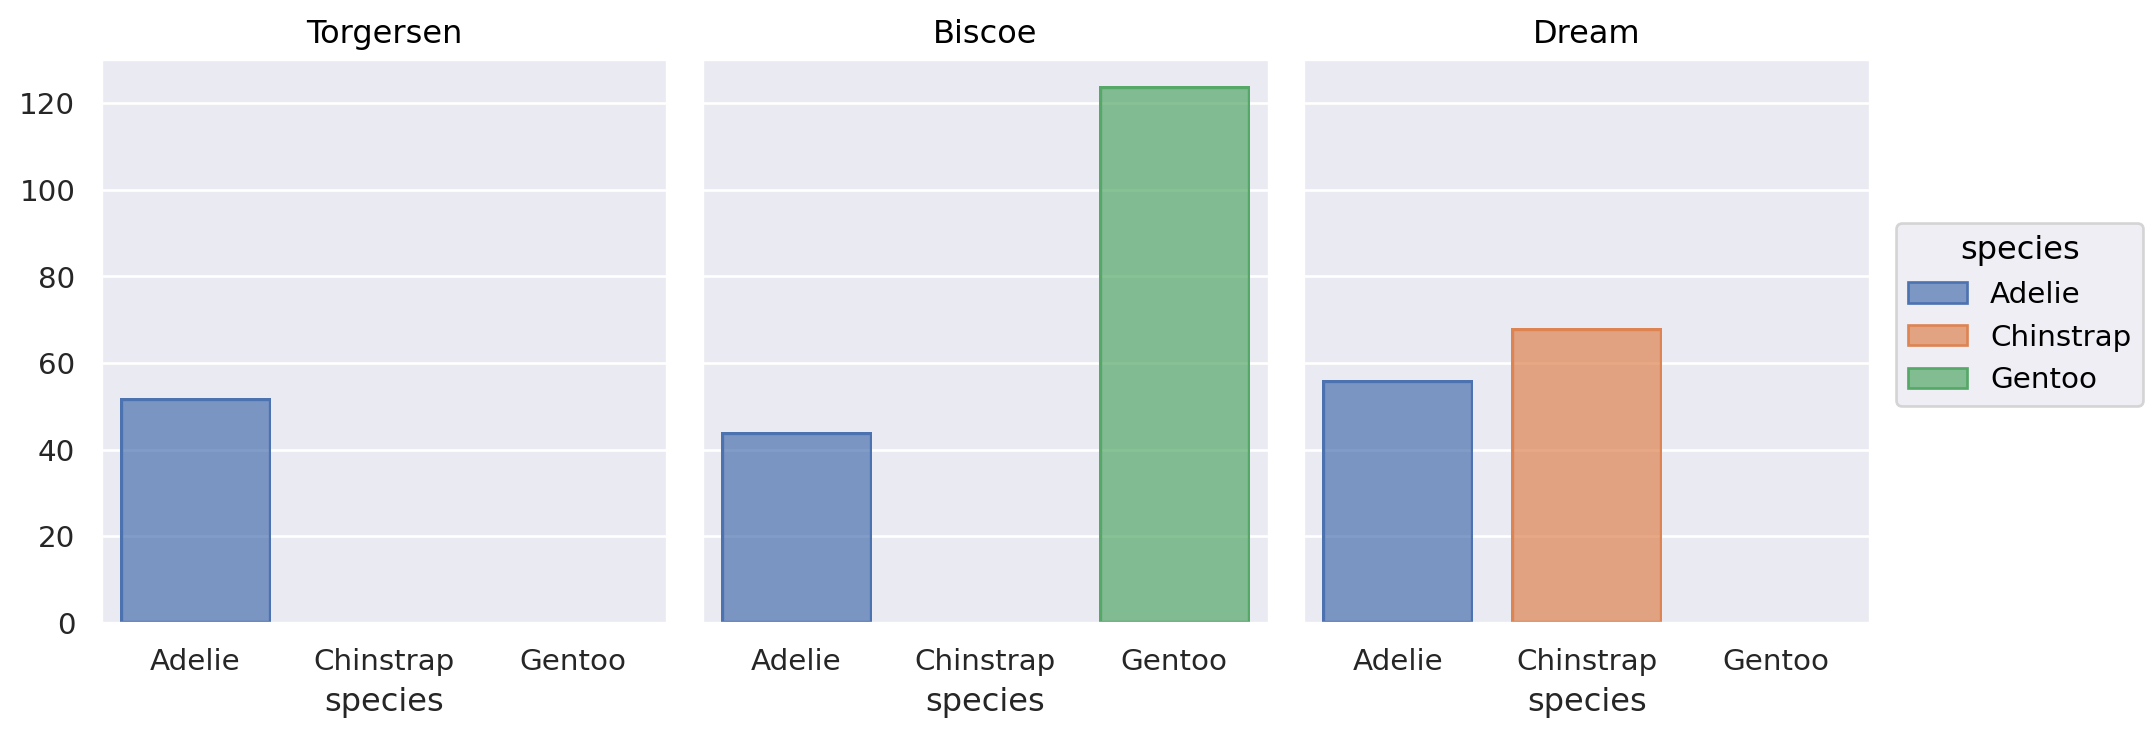

In [61]:
(
    so.Plot(data=pings, x='species', color='species')
    .add(so.Bar(), so.Hist())
    .facet('island')
    .layout(size=(10, 4))
)

### Ejercicio 7
**Histograma** de la cantidad de pingüinos en función del tamaño del ala.

In [71]:
maximo = pings['flipper_length_mm'].max()
minimo = pings['flipper_length_mm'].min()
media = pings['flipper_length_mm'].mean()
mediana = pings['flipper_length_mm'].median()

print(f'Tamaño del ala |  Máximo : {maximo}; mínimo: {minimo}; media: {media}; mediana: {mediana}')
(
    so.Plot(data=pings, x='flipper_length_mm')
    .add(so.Bar(), so.Hist())
)


Tamaño del ala |  Máximo : 231.0; mínimo: 172.0; media: 200.91520467836258; mediana: 197.0


### Ejercicio 8
#### a)

In [92]:
mtc = 'Medidas de tendencia central'
maximo = pings['bill_depth_mm'].max()
minimo = pings['bill_depth_mm'].min()
media = pings['bill_depth_mm'].mean()
mediana = pings['bill_depth_mm'].median()
moda = pings['bill_depth_mm'].mode().item()  # Funciona porque solo hay una moda

mdd = 'Medidas de dispersión'
varianza = pings['bill_depth_mm'].var()
desvio = pings['bill_depth_mm'].std()

print(f'{'-'*len(mtc)}\n{mtc}\n{'-'*len(mtc)}')
print(f'Máximo : {maximo}\nMínimo: {minimo}\nMedia: {np.round(media,3)}\nMediana: {mediana}\nModa: {moda}\n')
print(f'{'-'*len(mdd)}\n{mdd}\n{'-'*len(mdd)}')
print(f'Varianza: {np.round(varianza, 3)}\nDesvío estándar: {np.round(desvio,3)}')

----------------------------
Medidas de tendencia central
----------------------------
Máximo : 21.5
Mínimo: 13.1
Media: 17.151
Mediana: 17.3
Moda: 17.0

---------------------
Medidas de dispersión
---------------------
Varianza: 3.9
Desvío estándar: 1.975


#### b)

In [77]:
sns.boxplot(data=pings, x='species', y='bill_depth_mm')
plt.show()

### Ejercicio 9
#### a) 
En la especie Adelie la relación entre peso corporal y tamaño del pico (profundidad y longitud) resulta clara. En la especie Chinstrap los puntos parecen estar más dispersos, la relación resulta menos clara. En la especie Gentoo es donde hay menos variación en el peso, aunque puede notarse una tendencia picos más grandes en los individuos con más peso. En cada especie la relación general es que a mayor longitud mayor profundidad. 

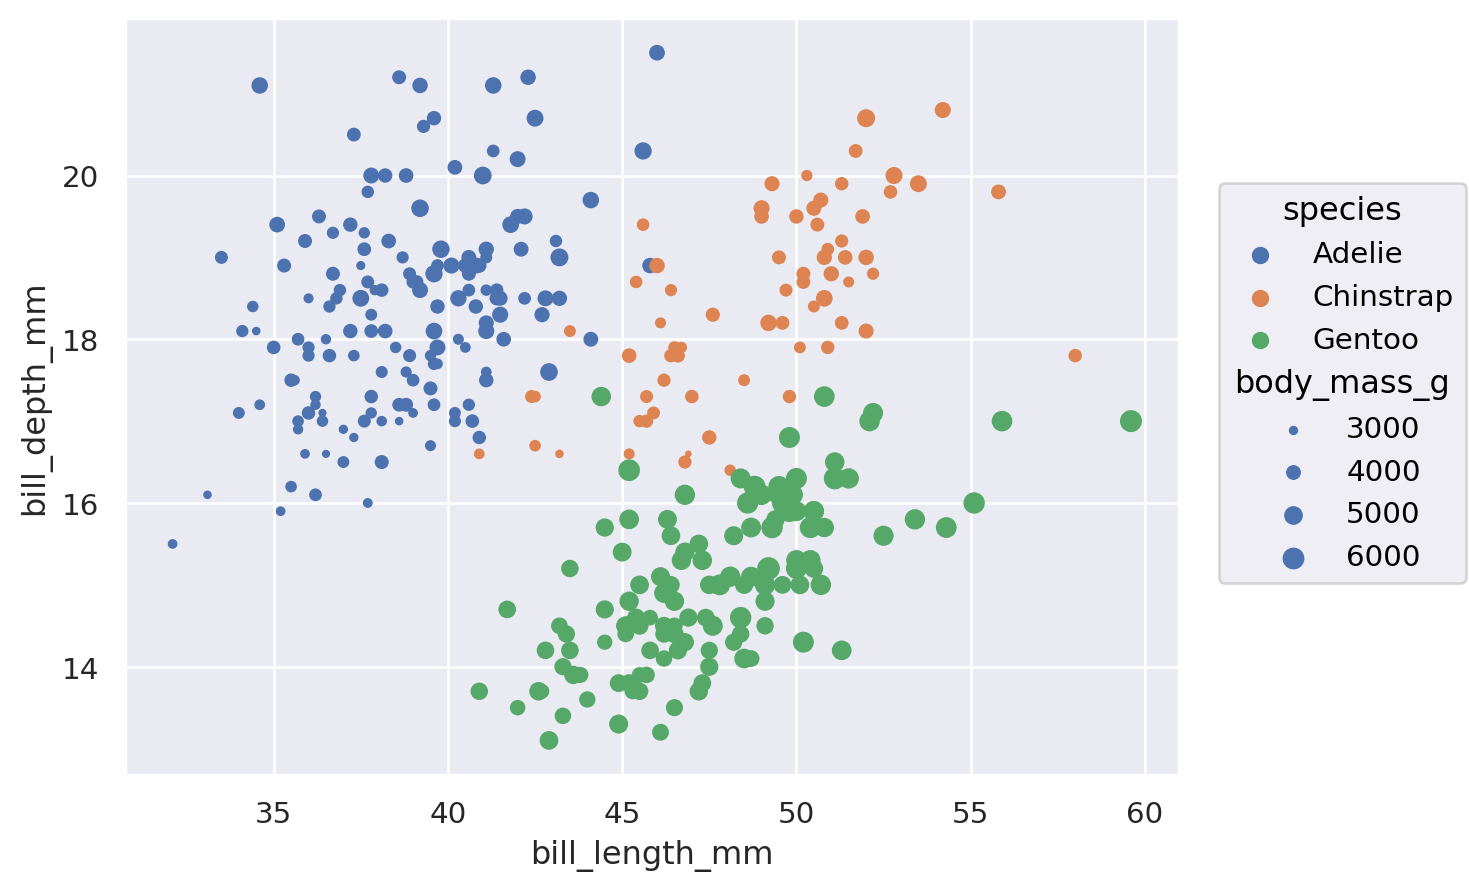

In [93]:
(
    so.Plot(data=pings, x='bill_length_mm', y='bill_depth_mm')
    .add(so.Dot(), color='species', pointsize='body_mass_g')
)

#### b)
El 50% de los individuos de la especie Gentoo pesan entre 4600 y 5500 gramos aprox, superando a buena parte de las otras dos especies.

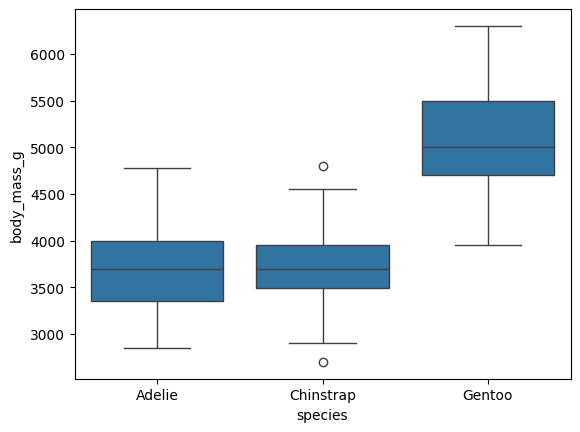

In [94]:
sns.boxplot(data=pings, x='species', y='body_mass_g')
plt.show()

### Ejercicio 12
#### a)

In [112]:
paises = gapminder.groupby('continent')['country'].nunique().reset_index(name='cant_paises')
paises.rename(columns={'continent':'continente'}, inplace=True)

(
    so.Plot(data=paises, x='continente', y='cant_paises')
    .add(so.Bar())
)

#### b)

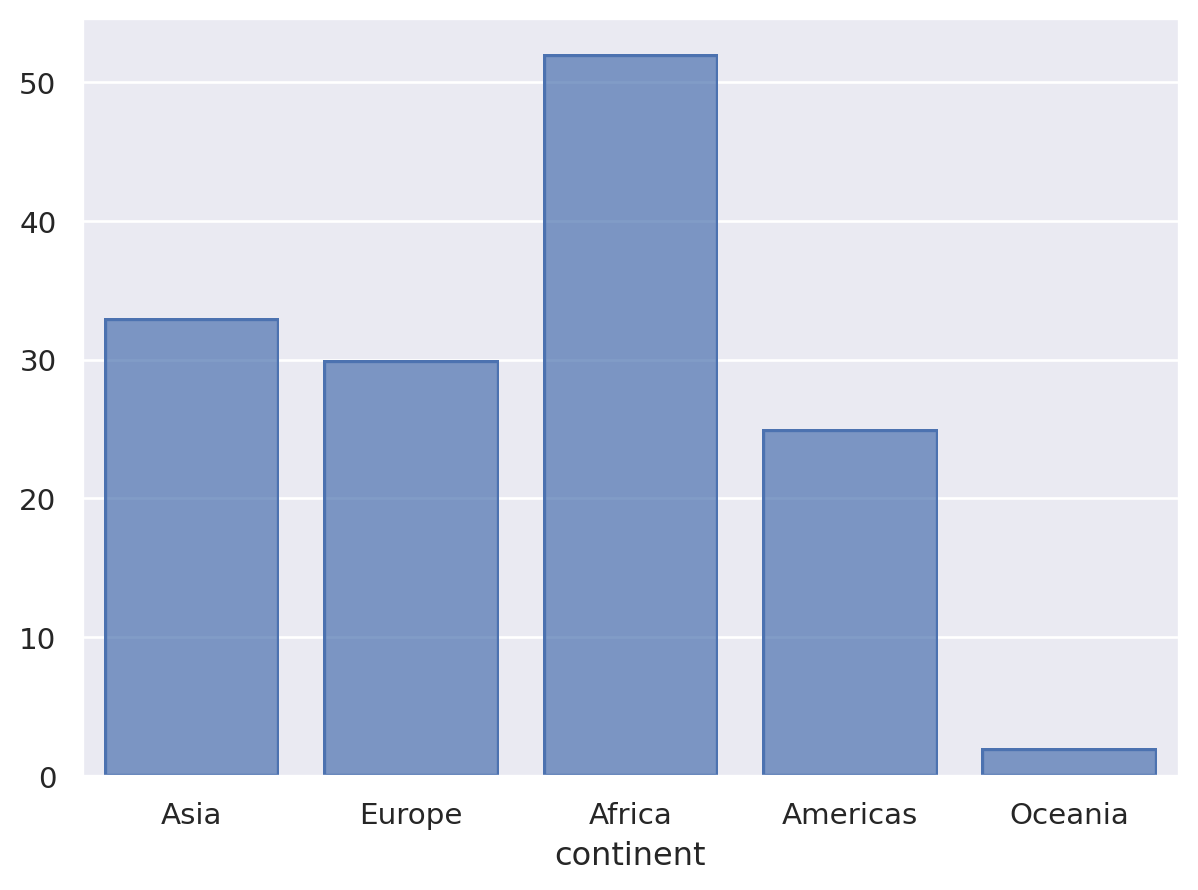

In [126]:
(
    so.Plot(data=gapminder.drop_duplicates(subset='country'), x='continent')  # Solo me quedo con la primera aparición de cada país
    .add(so.Bar(), so.Hist())
)

### Ejercicio 13

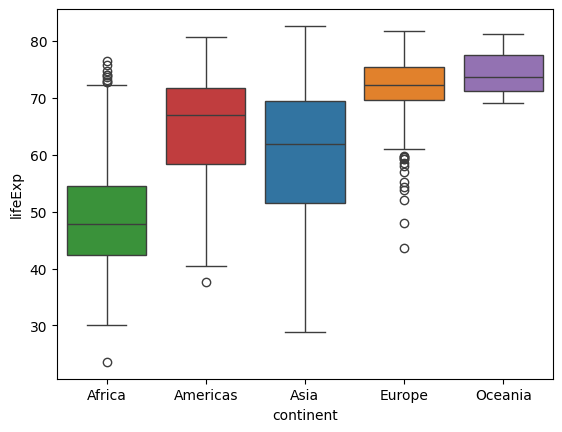

In [145]:
sns.boxplot(
    data=gapminder, 
    x='continent', 
    y='lifeExp', 
    hue='continent', 
    order= np.sort(gapminder.continent.unique())
)
plt.show()

## **EJERCICIOS GUÍA 4**: *regresión lineal y cuadrados mínimos*

### Ejercicio 1
#### a, b)

In [112]:
def coeficientes_regresion_lineal(X, y):  
    # x (predictor), y (var a predecir) pueden ser pd.Series o np.array 
    vec_x = X.to_numpy() if isinstance(X, pd.Series) else np.asarray(X)
    vec_y = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    # Obtengo los promedios
    promedio_x = np.mean(vec_x)
    promedio_y = np.mean(vec_y)
    # Calculo los coeficientes
    beta_1 = np.sum((vec_x - promedio_x) * (vec_y - promedio_y)) / np.sum((vec_x - promedio_x)**2)
    beta_0 = promedio_y - (beta_1 * promedio_x)

    return beta_0, beta_1  


# Obtengo los datos
from gapminder import gapminder
datos = gapminder[gapminder['country'] == 'Argentina'].reset_index(drop=True)

# y ~ X se lee: "X explica y")
y, X = Formula('lifeExp ~ year').get_model_matrix(datos) # Obtengo las matrices del modelo 

# Genero el modelo
modelo = linear_model.LinearRegression(fit_intercept=False)
# Hago el ajuste
modelo.fit(X, y)

beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

# Resultados
b0, b1 = coeficientes_regresion_lineal(datos.year, datos.lifeExp)
print(f'Cálculo con Formulaic y scikit-learn: beta_0 = {beta_0}, beta_1 = {beta_1}')  # Cálculo con scikit-learn
print(f'Cálculo manula: beta_0 = {b0}, beta_1 = {b1}')  # Cálculo manual
print(f'Mismos resultados: {np.isclose(beta_0, b0) and np.isclose(beta_1, b1)}')


Cálculo con Formulaic y scikit-learn: beta_0 = -389.6063445221505, beta_1 = 0.23170839160839457
Cálculo manula: beta_0 = -389.6063445221445, beta_1 = 0.2317083916083916
Mismos resultados: True


### Ejercicio 2
#### a) Relación entre superficie y precio de cada inmueble

In [98]:
ruta_a_inmuebles = (Path(os.getcwd()) / 'recs' / 'inmuebles.csv').resolve()
datos_inmuebles = pd.read_csv(ruta_a_inmuebles)
datos_inmuebles.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

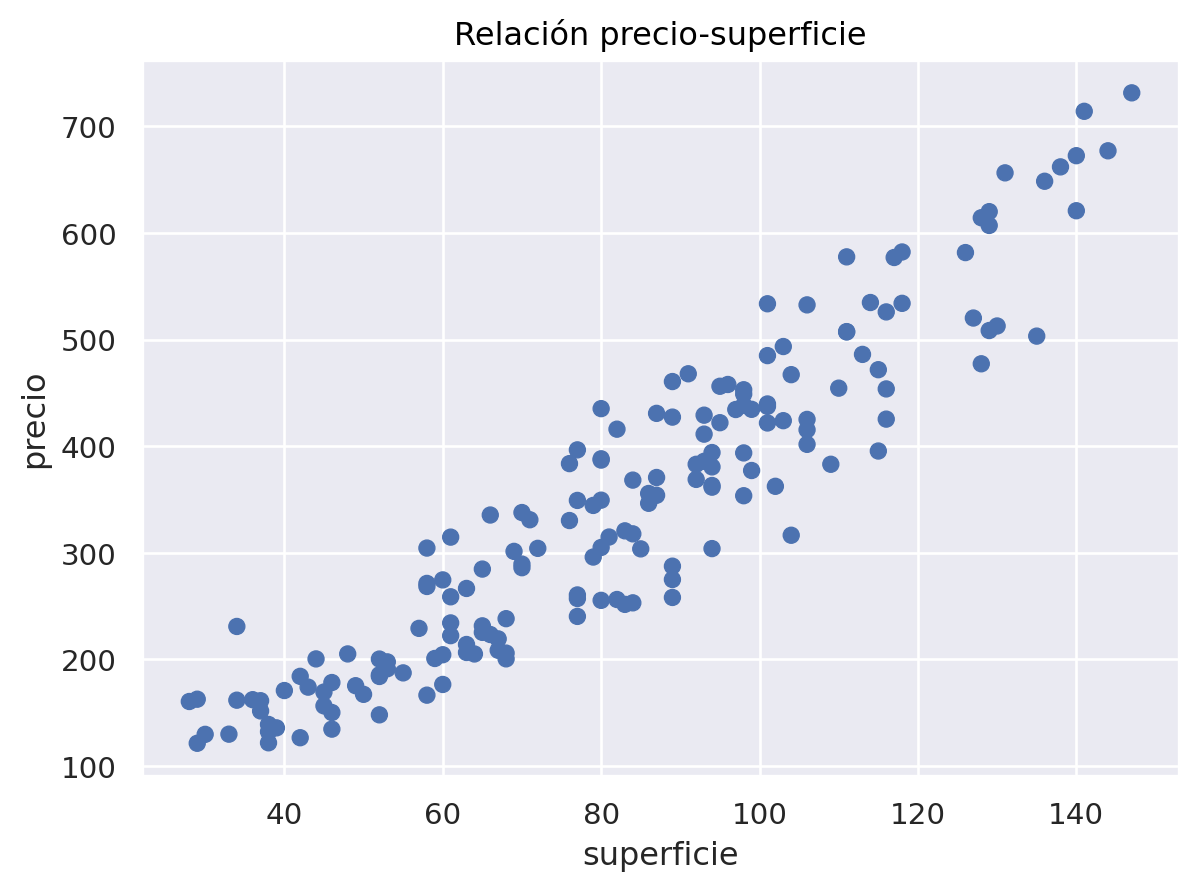

In [99]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot())
    .label(
        title="Relación precio-superficie"
    )
)

#### b)

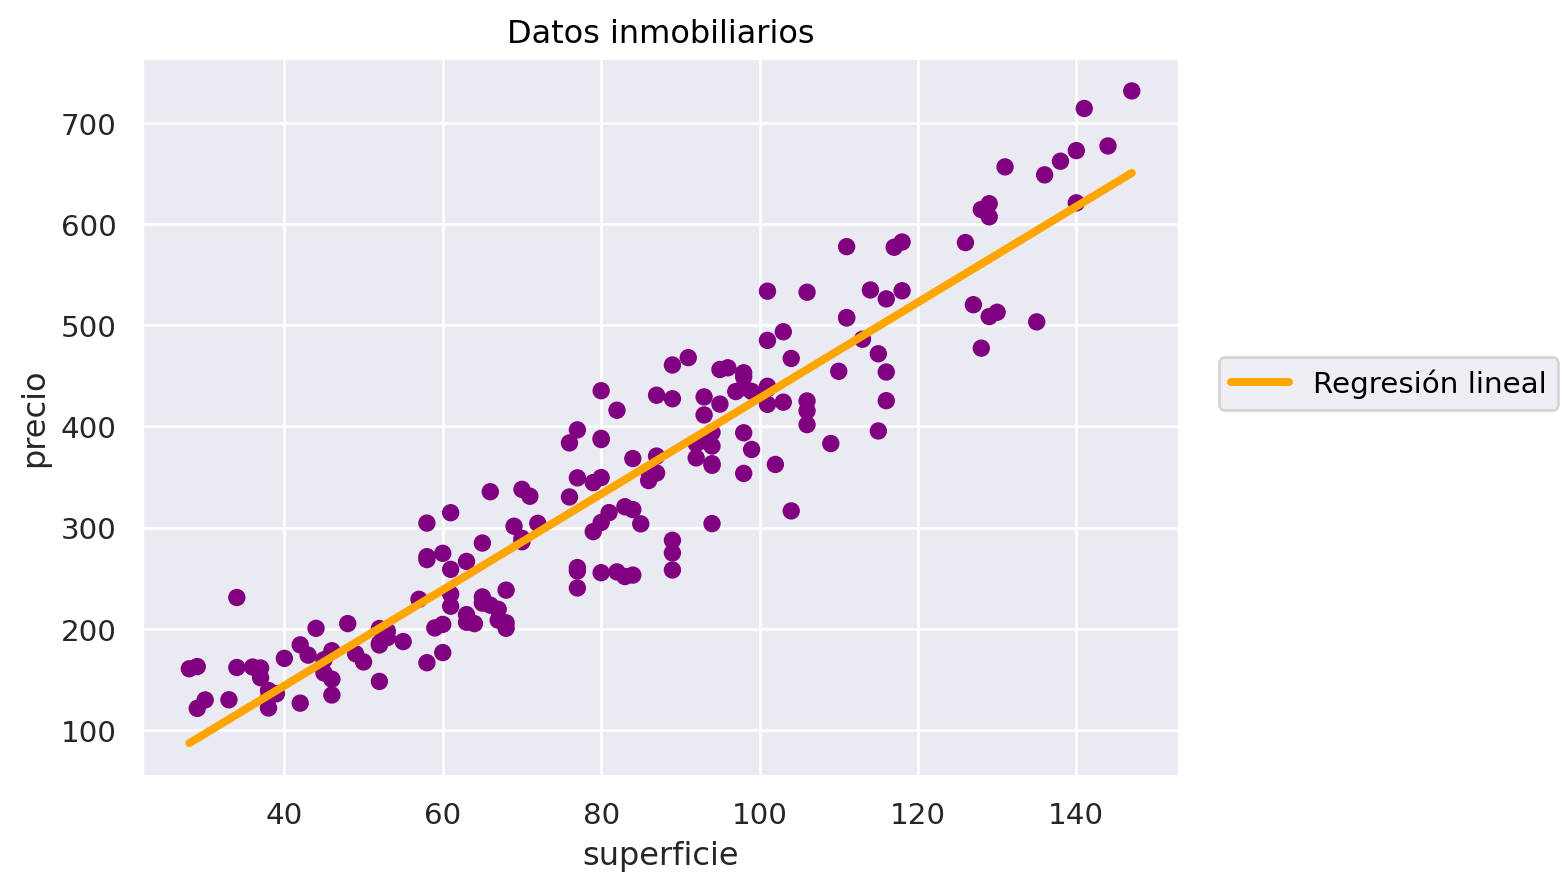

In [100]:
(
    so.Plot(datos_inmuebles, 'superficie', 'precio')
    .add(so.Dot(color='purple'))
    .add(so.Line(color='orange', linewidth=3), so.PolyFit(1), label='Regresión lineal')
    .label(
        title="Datos inmobiliarios"
    )
)

#### c)

In [109]:
# Con scikit-learn y formulaic
y, X = Formula('precio ~ superficie').get_model_matrix(datos_inmuebles)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(X, y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]

res1 = f'**Recta de ajuste**: $y = {np.round(beta_0, 3)} + {np.round(beta_1,3)}x$'
display(Markdown(res1))

**Recta de ajuste**: $y = -45.732 + 4.736x$

En este caso, la **ordenada al origen está forzada por el modelo**, los datos no pasan por ahí. Recién para inmuebles con superficie $\gtrapprox 10^2$ empezamos a obtener resultados con algún sentido: por cada metro cuadrado el precio del inmueble se incrementa en $4.736$.

#### d, e)
El **Error Cuadrático Medio** *(ECM)* mide la **magnitud del error**. Para interpretarlo correctamente le tomo **raíz cuadrada** *(RECM)*, conservando las **unidades** que heredó de $y$. El **Coeficiente de determinación** *($R^2$)* es un indicador de la **calidad** del modelo: mientras mas cerca esté de $1$, mejor será su **poder de prediccion**.

In [107]:
def ecm(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen  # Predicciones del modelo
    residuos = y.to_numpy() - y_gorrito  # Diferencia entre cada valor real y predicho
    rss = np.sum(residuos ** 2)  # Sumatoria del cuadrado de los residuos
    ecm = rss / y.count()  # Error Cuadrático Medio
    return ecm

def r_cuadrado(x, y, pendiente, o_origen):  # x,y son Series de Panda
    y_gorrito = (x.to_numpy()*pendiente) + o_origen
    y_media = y.mean()  # Promedio de los datos observados
    ve = np.sum((y_gorrito - y_media)**2)  # Variabilidad explicada por el modelo
    vt = np.sum((y.to_numpy() - y_media)**2) # Variabilidad total (varianza muestral)
    r_cuadrado = ve / vt  # Qué tan bien se ajusta el modelo: mal-->[0,..., 1]<--bien 
    return r_cuadrado  

print(f'ECM: {ecm(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}')
display(Markdown(f'$R^2$: {r_cuadrado(datos_inmuebles.superficie, datos_inmuebles.precio, beta_1, beta_0)}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357918

#### f) 
**ECM** y **$R^2$** con `scikit-learn` y `formulaic`.

In [125]:
x_originales = datos_inmuebles.superficie.to_numpy()  # Extraigo los datos originales
x_a_predecir = pd.DataFrame({  
    'Intercept': np.ones(x_originales.shape),  # Le agrego una columna de unos que corresponde al intercepto
    'superficie': x_originales
})  
y_gorrito = modelo.predict(x_a_predecir)  # Aplico el modelo generado
# display(y_gorrito)  # Todo lo anterior equivale a: modelo.predict(X), con X obtenido en Formula(...)

ecm = mean_squared_error(datos_inmuebles.precio, y_gorrito)
r2 = r2_score(datos_inmuebles.precio, y_gorrito)

print(f'ECM: {ecm}')
display(Markdown(f'$R^2$: {r2}'))

ECM: 2630.930001944696


$R^2$: 0.8762114698357936

#### g)
En la zona 3 hay **mayor variabilidad** de precios.

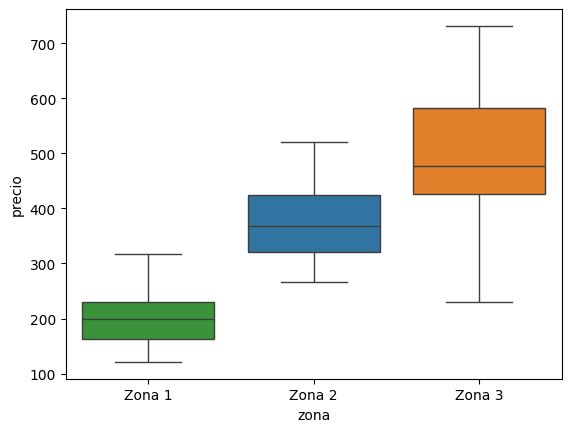

In [127]:
sns.boxplot(
    data=datos_inmuebles, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles.zona.unique())
)
plt.show()

#### h)

In [174]:
def modelo_y_metricas_regresion_lineal(df: pd.DataFrame, x:str, y:str):
    """
    Recibe un dataframe, el nombre de la variable independiente,
    el nombre de la variable dependiente y retorna beta0, beta1, ECM, R2
    """
    # Coeficientes de la recta de ajuste
    formula_regresion = f'{y} ~ {x}'  # Notación de Wilkinson
    vector_y, matriz_X = Formula(formula_regresion).get_model_matrix(df)
    modelo = linear_model.LinearRegression(fit_intercept=False) 
    modelo.fit(matriz_X, vector_y)
    beta_0 =  modelo.coef_[0][0]
    beta_1 =  modelo.coef_[0][1]    
    # ECM y R2
    y_gorrito = modelo.predict(matriz_X)
    ecm = mean_squared_error(df[y], y_gorrito)
    r2 = r2_score(df[y], y_gorrito)
    return np.array([beta_0, beta_1, ecm, r2]) 

resultados = {}
for i in range(1,4):
    resultados[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles[datos_inmuebles['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info = ''
for i in range(1,4):
    info = info + f'### **ZONA {i}** \n'
    info = info + f'\n **Recta de ajuste**: $y = {np.round(resultados[f'zona{i}'][0], 3)} + {np.round(resultados[f'zona{i}'][1],3)} x$\n'
    info = info + f'\n **ECM**: {np.round(resultados[f'zona{i}'][2], 3)} \n'
    info = info + f'\n $R^2$: {np.round(resultados[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info))   

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 80.73 + 3.206 x$

 **ECM**: 611.496 

 $R^2$: 0.866
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


#### i)
El valor del metro cuadrado en cada zona es igual al valor de la **pendiente**.

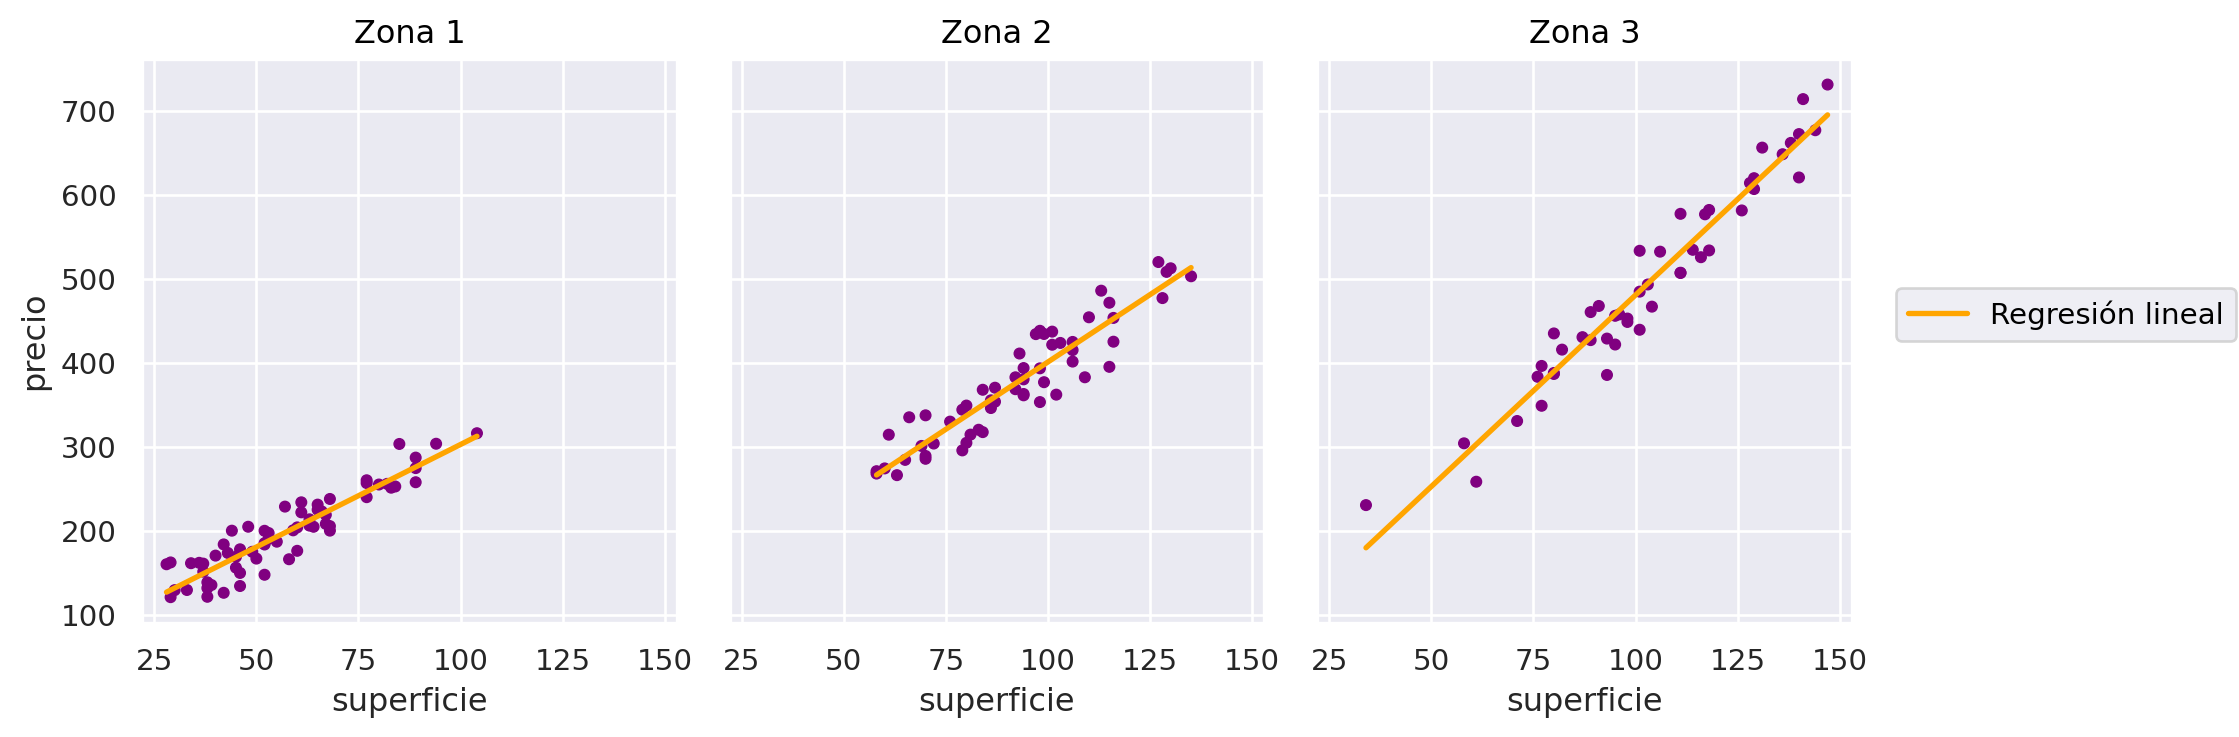

In [187]:
(
    so.Plot(data=datos_inmuebles, x='superficie', y='precio')
    .add(so.Dot(color='purple', pointsize=4))
    .add(so.Line(color='orange', linewidth=2), so.PolyFit(1), label='Regresión lineal')
    .facet('zona', order =np.sort(datos_inmuebles.zona.unique()))
    .layout(size=(10, 4))
)

#### j)

In [195]:
valor_a_predecir = np.array([105])  # Depto con 105m2 de superficie
dataframe_a_predecir = pd.DataFrame({'Intercept': np.array([1]), 'superficie': valor_a_predecir})

# Uso  el modelo creado en punto c)
precio_gral = np.round(modelo.predict(dataframe_a_predecir).item(), 3)  
# Uso directamente beta0 y beta1 obtenidos en el punto h)
precio_en_zona2 =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*valor_a_predecir.item(), 3)  

display(Markdown(f'**Precio general**: {precio_gral}\n\n**Precio en zona 2**: {precio_en_zona2}'))


**Precio general**: 451.527

**Precio en zona 2**: 417.389

#### k)

In [207]:
m2_depto = 100
precio_oferta = 300
precio_ref =  np.round(resultados['zona2'][0] + resultados['zona2'][1]*m2_depto, 3)
comparacion = f'El precio de oferta es ${abs(precio_oferta - precio_ref)} más {'caro' if precio_oferta - precio_ref >= 0 else 'barato'}'
comparacion = comparacion + ' que el precio de referencia.'
print(comparacion)

El precio de oferta es $101.358 más barato que el precio de referencia.


#### l)

In [208]:
ruta_a_inmuebles_outliers = (Path(os.getcwd()) / 'recs' / 'inmuebles_outliers.csv').resolve()
datos_inmuebles_out = pd.read_csv(ruta_a_inmuebles_outliers)
datos_inmuebles_out.head()

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

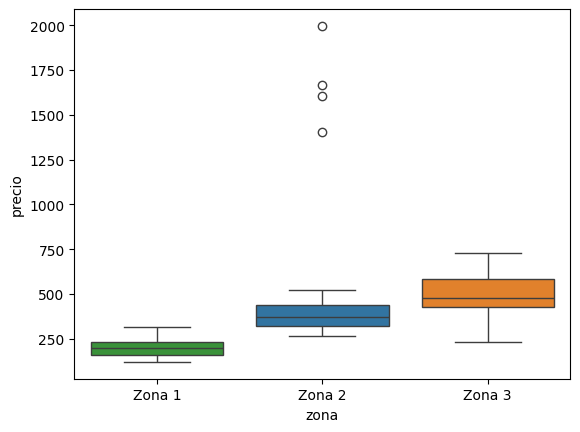

In [209]:
sns.boxplot(
    data=datos_inmuebles_out, 
    x='zona', 
    y='precio', 
    hue='zona', 
    order= np.sort(datos_inmuebles_out.zona.unique())
)
plt.show()

In [211]:
resultados_con_outliers = {}
for i in range(1,4):
    resultados_con_outliers[f'zona{i}'] = modelo_y_metricas_regresion_lineal(
        datos_inmuebles_out[datos_inmuebles_out['zona'] == f'Zona {i}'],
        'superficie',
        'precio'
    )

info_out = ''
for i in range(1,4):
    info_out = info_out + f'### **ZONA {i}** \n'
    info_out = info_out + f'\n **Recta de ajuste**: $y = {np.round(resultados_con_outliers[f'zona{i}'][0], 3)} + {np.round(resultados_con_outliers[f'zona{i}'][1],3)} x$\n'
    info_out = info_out + f'\n **ECM**: {np.round(resultados_con_outliers[f'zona{i}'][2], 3)} \n'
    info_out = info_out + f'\n $R^2$: {np.round(resultados_con_outliers[f'zona{i}'][3], 3)}\n'
    
display(Markdown(info_out))  

### **ZONA 1** 

 **Recta de ajuste**: $y = 58.852 + 2.442 x$

 **ECM**: 331.227 

 $R^2$: 0.856
### **ZONA 2** 

 **Recta de ajuste**: $y = 72.894 + 4.267 x$

 **ECM**: 109771.983 

 $R^2$: 0.06
### **ZONA 3** 

 **Recta de ajuste**: $y = 24.966 + 4.561 x$

 **ECM**: 748.88 

 $R^2$: 0.945


### Ejercicio 3
#### a)

In [250]:
datos_propinas = sns.load_dataset('tips')
datos_propinas.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [255]:
promedio_props = datos_propinas['tip'].mean()

datos_centrados = pd.DataFrame({
    'propina': datos_propinas.tip,
    'desvio_de_la_media': datos_propinas['total_bill'].to_numpy() - datos_propinas['total_bill'].mean() 
})

vector_y, matriz_X = Formula('propina ~ desvio_de_la_media').get_model_matrix(datos_centrados)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]  # Al centrar los datos resulta ser igual a la propina promedio
beta_1 =  modelo.coef_[0][1]  # Centrar la variable predictora no cambia la pendiente
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))
print(f'Propina promedio = {promedio_props}')

$\beta_0$: 2.998, $\beta_1$ 0.105

Propina promedio = 2.99827868852459


#### b)

In [254]:
vector_y, matriz_X = Formula('tip ~ total_bill').get_model_matrix(datos_propinas)
modelo = linear_model.LinearRegression(fit_intercept=False) 
modelo.fit(matriz_X, vector_y)
beta_0 =  modelo.coef_[0][0]
beta_1 =  modelo.coef_[0][1]
display(Markdown(rf'$\beta_0$: {np.round(beta_0,3)}, $\beta_1$ {np.round(beta_1,3)}'))

$\beta_0$: 0.92, $\beta_1$ 0.105

### Ejercicio 4

In [212]:
ruta_a_bitcoin = (Path(os.getcwd()) / 'recs' / 'bitcoin.csv').resolve()
df_bitcoin = pd.read_csv(ruta_a_bitcoin)  # Cotización desde el 17/09/2014 hasta el 19/02/2022 
df_bitcoin.head()

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

        Date         Close
0 2021-01-01  29374.152344
1 2021-01-02  32127.267578
2 2021-01-03  32782.023438
3 2021-01-04  31971.914063
4 2021-01-05  33992.429688


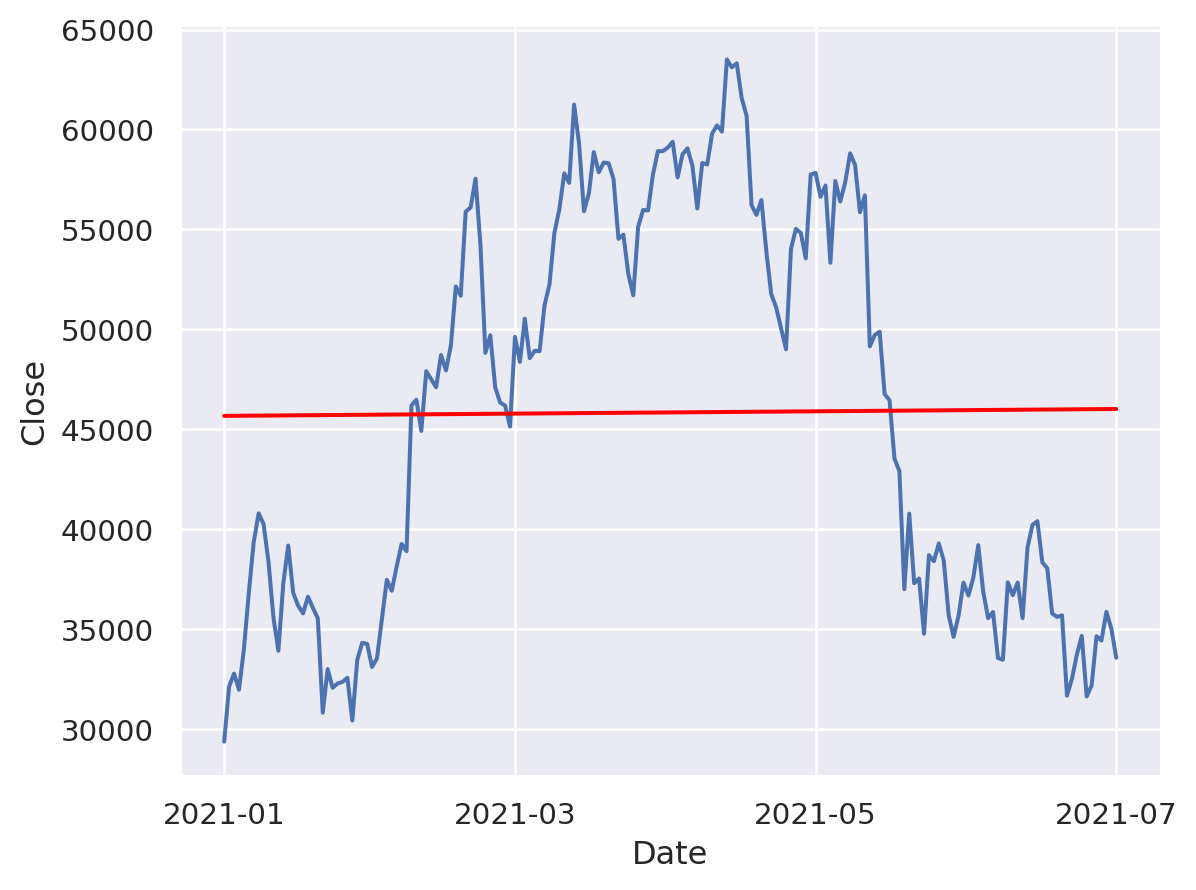

In [213]:
btc_2021 = df_bitcoin.loc[  # Recomandado para seleccionar filas y columnas por etiquetas o condiciones booleanas
    (df_bitcoin['Date'] >= "2021-01-01") &  (df_bitcoin['Date'] <= "2021-07-01"),  # Rango de fechas seleccionadas 
    ['Date', 'Close']  # El dataframe solo conserva estas columnas
].reset_index(drop=True)  # Reinicio el valor de los indices
btc_2021['Date'] = pd.to_datetime(btc_2021['Date']) # Convierte de object a datetime
#  print(btc_2021['Date'].dtype)  # Para verificar el tipo de dato de la columna 'Date'
print(btc_2021.head())

(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(1))  # La regresión lineal resulta insuficiente
)

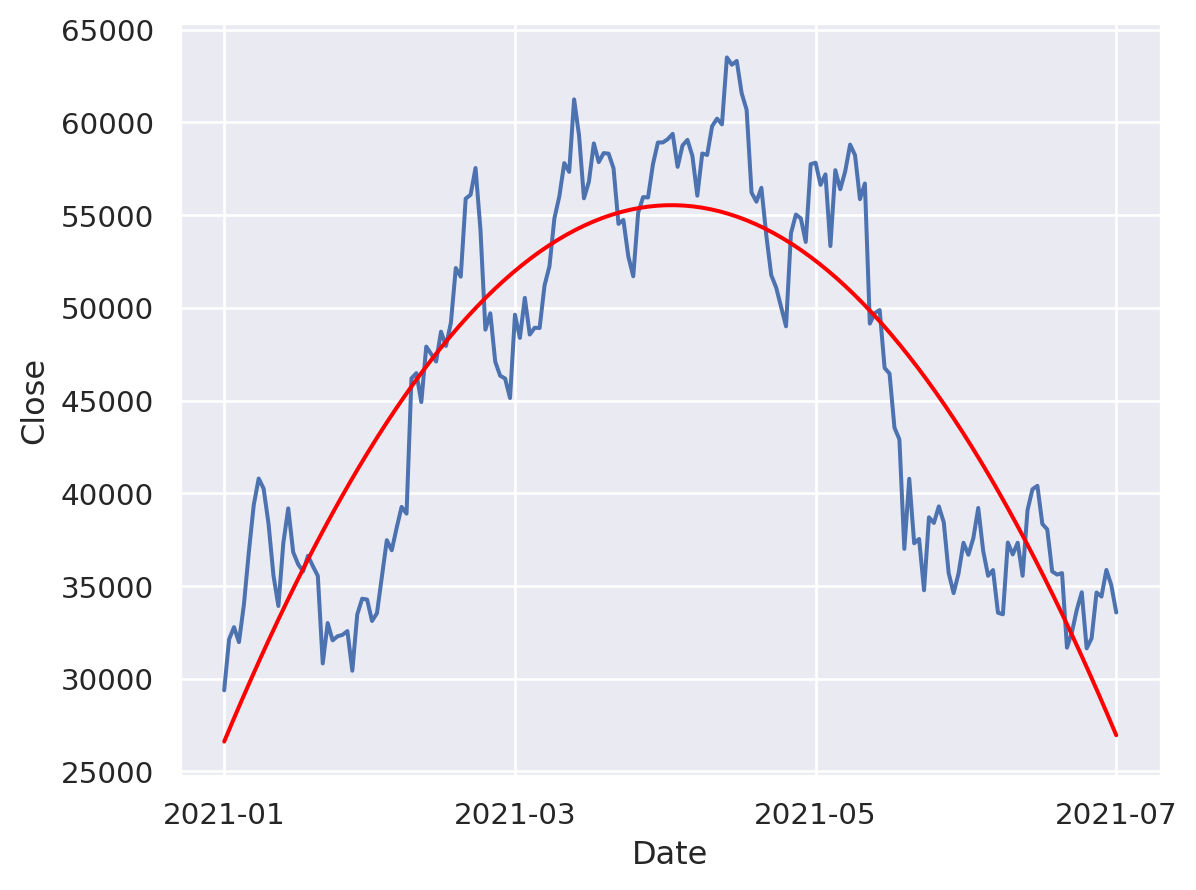

In [214]:
(
    so.Plot(btc_2021,'Date','Close')
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(2))  # Regresión con polinomio de grado 2
)

### Ejercicio 5
#### a)

In [215]:
datos_salud = sns.load_dataset('healthexp')
datos_salud.head()

Year        Country  Spending_USD  Life_Expectancy
0  1970        Germany       252.311             70.6
1  1970         France       192.143             72.2
2  1970  Great Britain       123.993             71.9
3  1970          Japan       150.437             72.0
4  1970            USA       326.961             70.9

In [216]:
# Obtengo los datos de Japón, me quedo solo con las columnas indicadas y reinicio los índices
datos_salud_jpn = datos_salud.loc[datos_salud.Country == 'Japan', ['Spending_USD', 'Life_Expectancy']].reset_index(drop=True)
datos_salud_jpn.head()

Spending_USD  Life_Expectancy
0       150.437             72.0
1       163.854             72.9
2       185.390             73.2
3       205.778             73.4
4       242.018             73.7

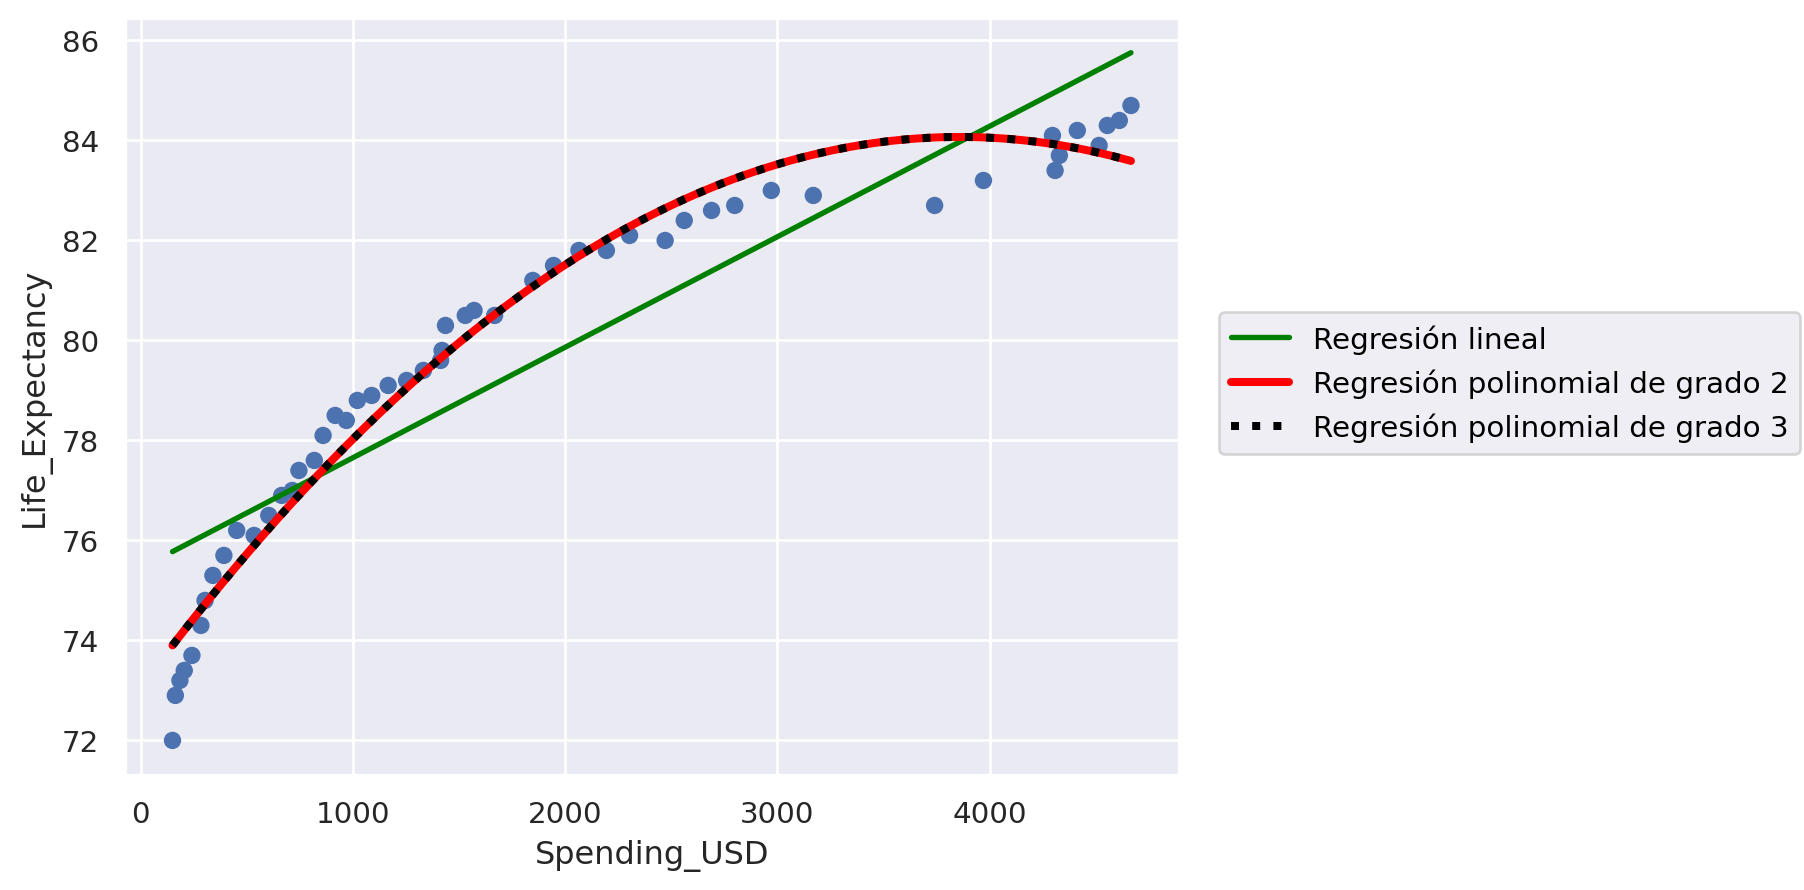

In [217]:
(
    so.Plot(datos_salud_jpn, 'Spending_USD', 'Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='green', linewidth=2), so.PolyFit(1), label='Regresión lineal')
    .add(so.Line(color='red', linewidth=3), so.PolyFit(2), label='Regresión polinomial de grado 2')
    .add(so.Line(color='black', linewidth=3, linestyle=':'), so.PolyFit(), label='Regresión polinomial de grado 3')
)

#### b)

In [218]:
# # Dos maneras de generar lo mismo: con o sin intercept:
# y, X = Formula('Life_Expectancy ~ poly(Spending_USD, 3, raw=True)-1').get_model_matrix(datos_salud_jpn)
# modelo = linear_model.LinearRegression(fit_intercept=True)  # X no tiene columna 'Intercept'
# modelo.fit(X, y)
# intercepto = modelo.intercept_[0]
# coeficientes = modelo.coef_[0][:]
# beta = np.array([intercepto, *coeficientes])
# ...

# Modelo
y, X = Formula('Life_Expectancy ~ poly(Spending_USD, 3, raw=True)').get_model_matrix(datos_salud_jpn)
modelo = linear_model.LinearRegression(fit_intercept=False)  # X tiene una columna 'Intercept' con todos sus valores iguales a 1.0
modelo.fit(X, y)
# Intercepto y coeficientes
intercepto = modelo.coef_[0][0]
coeficientes = modelo.coef_[0][1:]
beta = np.array([intercepto, *coeficientes])
# Valores
display(Markdown(rf'$\beta_0$: {np.round(beta[0],3)}'))
display(Markdown(rf'$\beta_1$: {beta[1]}'))
display(Markdown(rf'$\beta_2$: {beta[2]}'))
display(Markdown(rf'$\beta_3$: {beta[3]}'))

$\beta_0$: 71.844

$\beta_1$: 0.009097662205084109

$\beta_2$: -2.684173320369204e-06

$\beta_3$: 2.8216848475201683e-10

#### c)

In [219]:
# Error Cuadrático Medio y Coeficiente de determinación
predicciones_de_y = modelo.predict(X)
ecm = mean_squared_error(datos_salud_jpn.Life_Expectancy, predicciones_de_y)
r2 = r2_score(datos_salud_jpn.Life_Expectancy, predicciones_de_y)
display(Markdown(f'**ECM**: {ecm} \n\n $R^2$: {r2}'))

**ECM**: 0.10758286138707461 

 $R^2$: 0.9912790933475435

#### d)

In [220]:
# Predicción haciendo las cuentas
val_a_predecir = 5000
prediccion1 = beta[0] + beta[1]*val_a_predecir + beta[2]*val_a_predecir**2 + beta[3]*val_a_predecir**3
print(f'Si Japón invirtiera U$D{val_a_predecir}, la expectativa de vida sus habitantes sería de {np.round(prediccion1,2).item()} años.')

Si Japón invirtiera U$D5000, la expectativa de vida sus habitantes sería de 85.5 años.


In [221]:
# Prediccion como producto matricial
prediccion2 = beta @ val_a_predecir**np.arange(4, dtype='int64')
print(f'Si Japón invirtiera U$D{val_a_predecir}, la expectativa de vida sus habitantes sería de {np.round(prediccion2,2).item()} años.')

Si Japón invirtiera U$D5000, la expectativa de vida sus habitantes sería de 85.5 años.


#### e)
A medida que aumenta el grado del polinomo, el modelo tiende a ajustarse cada vez más a los valores exactos de entrenamiento. Este **sobreajuste** disminuye significativamente la eficacia y **capacidad de generalización** o predicción del modelo sobre nuevos datos.

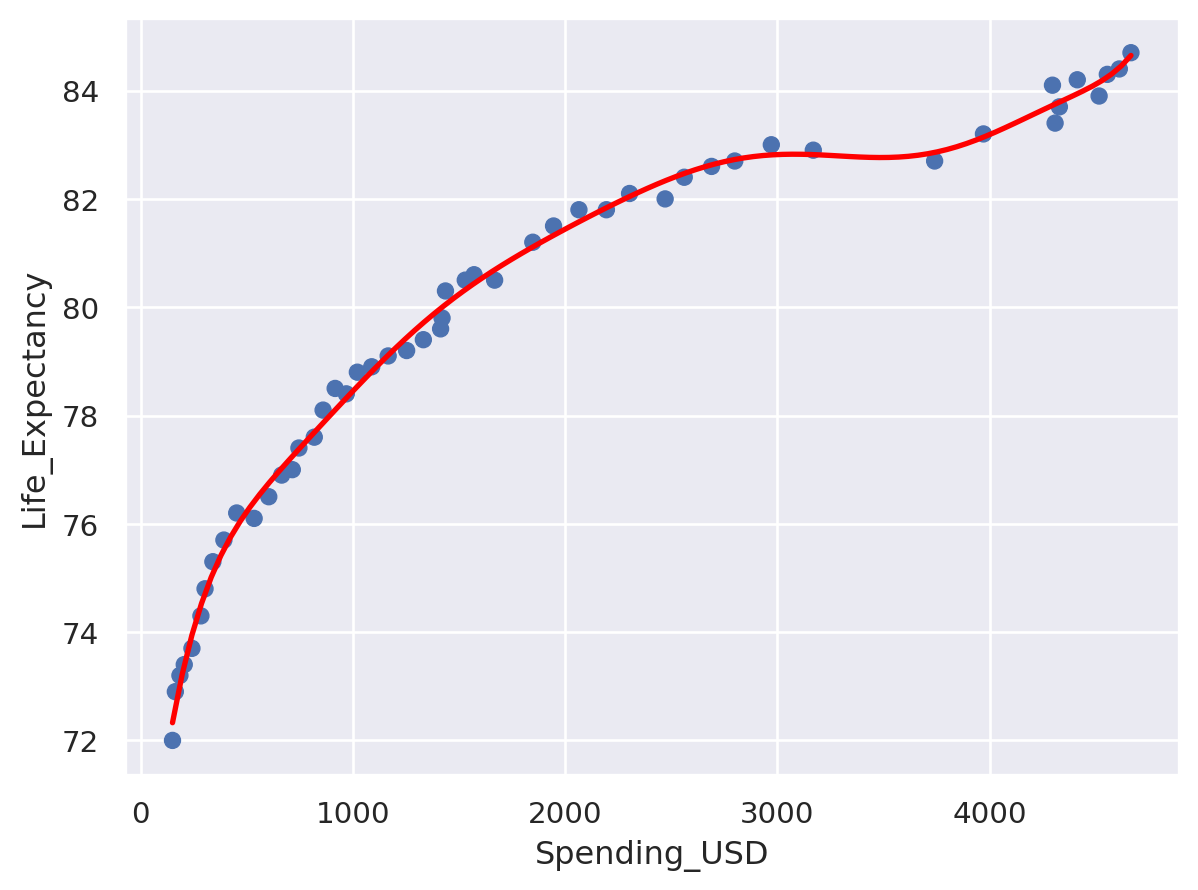

In [222]:
(
    so.Plot(datos_salud_jpn, 'Spending_USD', 'Life_Expectancy')
    .add(so.Dot())
    .add(so.Line(color='red', linewidth=2), so.PolyFit(10))
)

### Ejercicio 6: Media Móvil de Cudrados Mínimos *(LSMA)*

In [223]:
def lsma(x: pd.Series | np.ndarray, y: pd.Series | np.ndarray, k: int):    
    if k < 2:  # El período de tiempo (ventana)
        raise ValueError('k debe ser mayor o igual a 2')
        
    # Si la variable predictor es de tipo fecha
    if np.issubdtype(x.dtype, np.datetime64):
        x_min = x.min()
        if isinstance(x, pd.Series):
            x = (x - x_min).dt.days
        else:  # numpy array
            x = (x - x_min) / np.timedelta64(1, 'D')
        
    # Resuelvo el tipo de los datos 
    vec_x = x.to_numpy() if isinstance(x, pd.Series) else np.asarray(x)
    vec_y = y.to_numpy() if isinstance(y, pd.Series) else np.asarray(y)
    
    x_aprox = np.array([i for i in range(k, len(vec_x))]) # Los valores para los cuales se calculan los puntos de la curva de LSMA
    y_aprox = [] # Las coordenadas 'y' de los puntos de la curva
    for i in x_aprox:
        beta_0, beta_1 = coeficientes_regresion_lineal(vec_x[i-k: i], vec_y[i-k:i])
        y_aprox.append(beta_0 + beta_1*vec_x[i])

    return x_aprox, y_aprox          

In [224]:
df_bitcoin.head()  # Cotización desde el 17/09/2014 hasta el 19/02/2022 

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100

In [225]:
df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'], format='%Y-%m-%d')
periodo_btc = df_bitcoin.loc[
    (df_bitcoin['Date'] >= "2021-01-01") &  (df_bitcoin['Date'] <= "2021-07-01"),
    ['Date', 'Close']
].reset_index(drop=True).reset_index(names='Day')

# El mínimo (la tendencia a corto plazo) indica el umbral de ruido (semanal, quincenal, mensual, etc.) que se está dispuesto a ignorar
x_lsma_9, y_lsma_9 = lsma(periodo_btc.Date, periodo_btc.Close, 9) 
x_lsma_24, y_lsma_24 = lsma(periodo_btc.Date, periodo_btc.Close, 24)

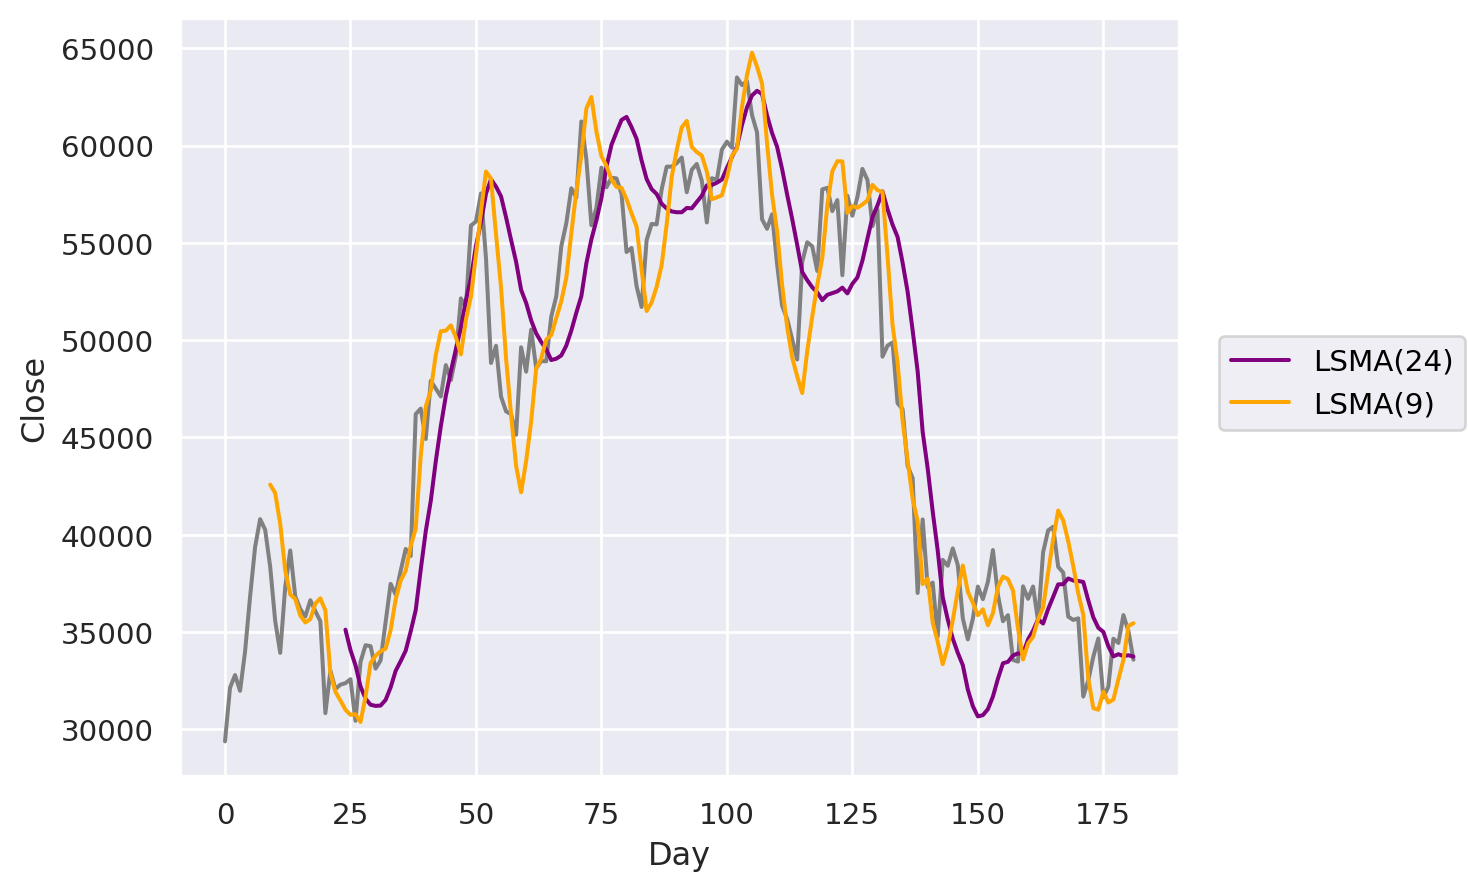

In [226]:
(
    so.Plot()
    .add(so.Line(color='grey'), x=periodo_btc.Day, y=periodo_btc.Close)
    .add(so.Line(color='purple'), x=x_lsma_24, y=y_lsma_24, label='LSMA(24)')
    .add(so.Line(color='orange'), x=x_lsma_9, y=y_lsma_9, label='LSMA(9)')
)

## **EJERCICIOS GUÍA 5**: *operaciones con DataFrames*

In [36]:
pings = sns.load_dataset('penguins') 
display(pings)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

### Ejercicio 1
A partir del dataset penguins, crear un subconjunto de datos que contenga sólo pingüinos de la isla Biscoe y que tengan un pico de 48 mm de largo o más.

In [42]:
pings_biscoe_p48mm = pings[(pings.island == 'Biscoe') & (pings.flipper_length_mm >= 48.0)]
display(pings_biscoe_p48mm)

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
20   Adelie  Biscoe            37.8           18.3              174.0   
21   Adelie  Biscoe            37.7           18.7              180.0   
22   Adelie  Biscoe            35.9           19.2              189.0   
23   Adelie  Biscoe            38.2           18.1              185.0   
24   Adelie  Biscoe            38.8           17.2              180.0   
..      ...     ...             ...            ...                ...   
338  Gentoo  Biscoe            47.2           13.7              214.0   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
20        3400.0  Female  
21        3600.0    Male  
22        3800.0  Female  
23        3950.0    Male  
24        3800.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[167 rows x 7 columns]

### Ejercicio 2 
Crear otro dataset con la información de pingüinos Adelie machos que no sean de isla Biscoe.

In [5]:
pings_m_adelie_no_biscoe = pings[(pings.sex == 'Male') & (pings.island != 'Biscoe')]
display(pings_m_adelie_no_biscoe)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
7       Adelie  Torgersen            39.2           19.6              195.0   
13      Adelie  Torgersen            38.6           21.2              191.0   
14      Adelie  Torgersen            34.6           21.1              198.0   
..         ...        ...             ...            ...                ...   
210  Chinstrap      Dream            50.2           18.8              202.0   
212  Chinstrap      Dream            51.9           19.5              206.0   
215  Chinstrap      Dream            55.8           19.8              207.0   
217  Chinstrap      Dream            49.6           18.2              193.0   
218  Chinstrap      Dream            50.8           19.0              210.0   

     body_mass_g   sex  
0         3750.0  Male  
5         3650.0  Male  
7         4675.0  Male  
13        3800.0  Male  
14        4400.0  Male  
..           ...   ...  
210       3800.0  Male  
212       3950.0  Male  
215       4000.0  Male  
217       3775.0  Male  
218       4100.0  Male  

[85 rows x 7 columns]

### Ejercicio 3
Del dataset penguins quedarse con todas las variables excepto year, sex y body_mass_g.

In [14]:
pings_subconj = pings.drop(['sex', 'body_mass_g'], axis=1)
display(pings_subconj)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm
0    Adelie  Torgersen            39.1           18.7              181.0
1    Adelie  Torgersen            39.5           17.4              186.0
2    Adelie  Torgersen            40.3           18.0              195.0
3    Adelie  Torgersen             NaN            NaN                NaN
4    Adelie  Torgersen            36.7           19.3              193.0
..      ...        ...             ...            ...                ...
339  Gentoo     Biscoe             NaN            NaN                NaN
340  Gentoo     Biscoe            46.8           14.3              215.0
341  Gentoo     Biscoe            50.4           15.7              222.0
342  Gentoo     Biscoe            45.2           14.8              212.0
343  Gentoo     Biscoe            49.9           16.1              213.0

[344 rows x 5 columns]

### Ejercicio 4

In [45]:
pings_filtrados = (
    pings[pings.island != 'Biscoe']
    .loc[:, 'species':'body_mass_g']  # Solo se queda con las variables que están entre species y body_mass_g inclusive.
    .rename(columns = {'species':'especie_pingüino'})
    .groupby('especie_pingüino')
    .agg({col : 'mean' for col in pings.columns if 'length' in col})  # agg() aplica operaciones sobre columnas (o varias sobre la misma, si es una serie)
    .rename(columns = {col : f'{col}_mean' for col in pings.columns if 'length' in col})
)
display(pings_filtrados)

bill_length_mm_mean  flipper_length_mm_mean
especie_pingüino                                             
Adelie                      38.715888              190.429907
Chinstrap                   48.833824              195.823529

### Ejercicio 5

In [65]:
pings_renombrado = (
    pings.rename(columns = {'species':'especie'})
    .rename(columns = {'flipper_length_mm':'aleta_mm', 'body_mass_g':'pego_g'})
    .rename(columns = str.upper)
    # .rename(index = {0:'cero'})
    .rename(columns = str.lower)
    .rename(index = np.sqrt)
    .rename(index = lambda indice: indice + 1)
    .rename(index = lambda indice: indice * 2)
    .rename(columns = lambda col: str.upper(col))
)
display(pings_renombrado.head())

ESPECIE     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  ALETA_MM  PEGO_G  \
2.000000  Adelie  Torgersen            39.1           18.7     181.0  3750.0   
4.000000  Adelie  Torgersen            39.5           17.4     186.0  3800.0   
4.828427  Adelie  Torgersen            40.3           18.0     195.0  3250.0   
5.464102  Adelie  Torgersen             NaN            NaN       NaN     NaN   
6.000000  Adelie  Torgersen            36.7           19.3     193.0  3450.0   

             SEX  
2.000000    Male  
4.000000  Female  
4.828427  Female  
5.464102     NaN  
6.000000  Female

### Ejercicio 6

In [136]:
ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()
macro = pd.read_csv(ruta_a_macro)
display(macro)

Unnamed: 0  Anio  FBKF.Construcciones.Priv_Publ  \
0            1  1950                    20353627362   
1            2  1951                    21739314091   
2            3  1952                    19685428171   
3            4  1953                    20237375978   
4            5  1954                    19372130307   
..         ...   ...                            ...   
61          62  2011                    66813943052   
62          63  2012                    64700327691   
63          64  2013                    64634666531   
64          65  2014                    63301703123   
65          66  2015                    64462175043   

    FBKF.Equi_Dur_Prod.Mat_Transp.Nac  FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
0                        6.685869e+08                          5.844002e+08   
1                        8.427402e+08                          2.532758e+09   
2                        1.119084e+09                          1.484422e+09   
3                        1.207891e+09                          1.459989e+09   
4                        1.173452e+09                          8.059002e+08   
..                                ...                                   ...   
61                       1.189902e+10                          7.661349e+09   
62                       1.193748e+10                          5.518154e+09   
63                       1.378317e+10                          7.239125e+09   
64                       1.030574e+10                          5.950583e+09   
65                       1.143976e+10                          5.599293e+09   

    FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  \
0                           3119383475                           8.631124e+08   
1                           3562534310                           1.292775e+09   
2                           3440750327                           1.088416e+09   
3                           3621895632                           8.869267e+08   
4                           4121320340                           7.830799e+08   
..                                 ...                                    ...   
61                         23759578339                           4.132673e+10   
62                         21650676546                           3.568329e+10   
63                         24156151830                           3.373643e+10   
64                         21378949359                           3.253840e+10   
65                         24228907045                           3.441289e+10   

    Consumo.Hogares  Consumo.Gobierno  Exportaciones  ...  \
0      1.046560e+11       21706316451   1.072959e+10  ...   
1      1.105380e+11       21767097618   8.455494e+09  ...   
2      1.051080e+11       21455589059   6.224082e+09  ...   
3      1.064030e+11       20742065172   9.619869e+09  ...   
4      1.143920e+11       21238933697   1.020162e+10  ...   
..              ...               ...            ...  ...   
61     5.014680e+11       80184420870   1.598420e+11  ...   
62     4.998770e+11       82549920556   1.531870e+11  ...   
63     5.165960e+11       86152836238   1.464500e+11  ...   
64     4.967300e+11       89033326375   1.367560e+11  ...   
65     5.098710e+11       94456349868   1.355150e+11  ...   

    PBI_a_precios_de_mercado.oferta  Vol_PIB_perCap  \
0                      1.420980e+11     8230.718755   
1                      1.474360e+11     8360.967138   
2                      1.404910e+11     7806.866125   
3                      1.473240e+11     8027.665603   
4                      1.533160e+11     8196.878491   
..                              ...             ...   
61                     7.118760e+11    17252.803350   
62                     7.064210e+11    16927.042940   
63                     7.220400e+11    17108.767060   
64                     7.056120e+11    16536.677200   
65                     7.225620e+11    16752.344150   

    Vol_Consumo_Hogares_Per

In [126]:
# a) Datos faltantes

# axis=0 por defecto
# print(macro.isna().sum(axis = 1), '\n')  # Retorna el total de Nan que hay en cada fila
# print(macro.isna().any(axis = 1))  # Retorna un booleano que indica si en la fila hay algun Nan
# print(macro.isna().sum(axis = 0), '\n')  # Retorna el total de Nan que hay en cada columna
# print(macro.isna().any(axis = 0))  # Retorna un booleano que indica si en la columna hay algun Nan
columnas_con_NaN = macro.columns[macro.isna().any()].tolist()
print(columnas_con_NaN)

['EXPO_OTAGRIC_2004', 'EXPO_PESCA_2004', 'EXPO_ALIMENT_2004', 'EXPO_TEXTIL_2004', 'EXPO_CUEROIND_2004', 'EXPO_PAPEL_2004', 'EXPO_CAUCHO_2004', 'EXPO_QUIMICO_2004', 'EXPO_COMBIUST_2004', 'EXPO_HIERRO_2004', 'EXPO_METNOFERR_2004', 'EXPO_MAQUIN_2004', 'EXPO_RESTOIND_2004', 'PIB_perCap__variPorc', 'Vol_Cons_Hogares_per_Cap__vari_Porc', 'Vol_FBKF_perCap__variPorc', 'IPI__variPorc']


In [132]:
# b) Años con datos faltantes

anios = macro.Anio[macro.isna().any(axis=1)].tolist()
print(anios)

[1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965]


In [134]:
# c) Convertir los datos faltantes a cero

macro_sin_NaN = macro.fillna(0)
macro_sin_NaN.isna().sum()


Unnamed: 0                              0
Anio                                    0
FBKF.Construcciones.Priv_Publ           0
FBKF.Equi_Dur_Prod.Mat_Transp.Nac       0
FBKF.Equi_Dur_Prod.Mat_Transp.Import    0
                                       ..
Vol_Cons_Hogares_per_Cap__vari_Porc     0
Vol_FBKF_perCap__variPorc               0
Vol_PIB_encaden_Fisher_2004             0
IPI_volumen                             0
IPI__variPorc                           0
Length: 85, dtype: int64

### Ejercicio 7

In [169]:
pings = sns.load_dataset('penguins') 
pings_sin_NaN = pings.dropna().reset_index(drop=True)  # Desecho los NaN y reinicio los índices
display(pings_sin_NaN)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
328  Gentoo     Biscoe            47.2           13.7              214.0   
329  Gentoo     Biscoe            46.8           14.3              215.0   
330  Gentoo     Biscoe            50.4           15.7              222.0   
331  Gentoo     Biscoe            45.2           14.8              212.0   
332  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3         3450.0  Female  
4         3650.0    Male  
..           ...     ...  
328       4925.0  Female  
329       4850.0  Female  
330       5750.0    Male  
331       5200.0  Female  
332       5400.0    Male  

[333 rows x 7 columns]

### Ejercicio 8

In [157]:
pings.columns = [str.upper(c) for c in pings.columns]  # Opera en sitio
display(pings.head())

SPECIES     ISLAND  BILL_LENGTH_MM  BILL_DEPTH_MM  FLIPPER_LENGTH_MM  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   BODY_MASS_G     SEX  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Ejercicio 9

In [162]:
pings = pings.rename(columns=str.lower)
pings.columns = [str.upper(c) if c.startswith('bill') else c for c in pings.columns]
display(pings.head())

species     island  BILL_LENGTH_MM  BILL_DEPTH_MM  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

### Ejercicio 10
Utilizando una función lambda, agregar una nueva columna a la base de datos llamada peso_bin
que contenga:
- “chico” si la masa corporal es menos que 4000 gramos.
- “grande” si la masa corporal es mayor que 4000 gramos.

In [166]:
pings = pings.rename(columns=str.lower)
pings['peso_bin'] = ['chico' if peso < 4000.0 else 'grande' for peso in pings.body_mass_g]

display(pings.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex peso_bin  
0       3750.0    Male    chico  
1       3800.0  Female    chico  
2       3250.0  Female    chico  
3          NaN     NaN   grande  
4       3450.0  Female    chico

### Ejercicio 11
Crear un subconjunto de los datos de `penguins` sólo con las obsevaciones de pingüinos machos con aletas *(flipper)* de más de 200 mm de largo y quedarse con todas las columnas que terminan con *_mm*.

In [172]:
pings = sns.load_dataset('penguins') 
pings_subconj = (  # Las filas que cumplen la condición,                  las columnas que me interesan
    pings.loc[(pings.sex == 'Male') & (pings.flipper_length_mm > 200.0), [c for c in pings.columns if c.endswith('_mm')]]
)
display(pings_subconj.head())

bill_length_mm  bill_depth_mm  flipper_length_mm
91             41.1           18.1              205.0
95             40.8           18.9              208.0
101            41.0           20.0              203.0
123            41.4           18.5              202.0
129            44.1           18.0              210.0

### Ejercicio 12

In [179]:
pings = sns.load_dataset('penguins')
pings_subconj = (
    pings.loc[pings.island == 'Dream', ['species'] + [c for c in pings.columns if c.startswith('bill')]]
)
display(pings_subconj.head())

species  bill_length_mm  bill_depth_mm
30  Adelie            39.5           16.7
31  Adelie            37.2           18.1
32  Adelie            39.5           17.8
33  Adelie            40.9           18.9
34  Adelie            36.4           17.0

### Ejercicio 13

In [190]:
pings = sns.load_dataset('penguins')
pings_peso = pings.copy()
pings_peso['peso'] = [peso/1000 for peso in pings.body_mass_g]
pings_peso['island'] = pings.island.str.lower()
display(pings_peso.head())

# Lo mismo pero en una operación usando assign
pings = sns.load_dataset('penguins')
pings_peso = pings.assign(
    peso = [peso/1000 for peso in pings.body_mass_g],
    island = pings.island.str.lower(),
)
display(pings_peso.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  torgersen            39.1           18.7              181.0   
1  Adelie  torgersen            39.5           17.4              186.0   
2  Adelie  torgersen            40.3           18.0              195.0   
3  Adelie  torgersen             NaN            NaN                NaN   
4  Adelie  torgersen            36.7           19.3              193.0   

   body_mass_g     sex  peso  
0       3750.0    Male  3.75  
1       3800.0  Female  3.80  
2       3250.0  Female  3.25  
3          NaN     NaN   NaN  
4       3450.0  Female  3.45

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  torgersen            39.1           18.7              181.0   
1  Adelie  torgersen            39.5           17.4              186.0   
2  Adelie  torgersen            40.3           18.0              195.0   
3  Adelie  torgersen             NaN            NaN                NaN   
4  Adelie  torgersen            36.7           19.3              193.0   

   body_mass_g     sex  peso  
0       3750.0    Male  3.75  
1       3800.0  Female  3.80  
2       3250.0  Female  3.25  
3          NaN     NaN   NaN  
4       3450.0  Female  3.45

### Ejercicio 14
Agregar una columna a `penguins` con la mediana de la masa corporal de los pingüinos de cada especie usando `group_by()` y `agg()`.

In [211]:
pings = sns.load_dataset('penguins') 
pings['mediana_peso'] = [ 
    pings.groupby('species').agg({'body_mass_g':'median'}).to_dict()['body_mass_g'][esp] 
    for esp in pings.species 
]
display(pings.head())

# Lo mismo pero más simple
medianas = pings.groupby('species')['body_mass_g'].median().to_dict()
pings['mediana_peso'] = [medianas[esp] for esp in pings['species']]
display(pings.head())

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  mediana_peso  
0       3750.0    Male        3700.0  
1       3800.0  Female        3700.0  
2       3250.0  Female        3700.0  
3          NaN     NaN        3700.0  
4       3450.0  Female        3700.0

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  mediana_peso  
0       3750.0    Male        3700.0  
1       3800.0  Female        3700.0  
2       3250.0  Female        3700.0  
3          NaN     NaN        3700.0  
4       3450.0  Female        3700.0

### Ejercicio 15

In [214]:
pings = sns.load_dataset('penguins') 
pings_subconj = (
    pings.loc[pings.island != 'Biscoe', 'species':'body_mass_g']
    .rename(columns={'species':'especie_pinguino'})
    .groupby('especie_pinguino')
    .agg({col : 'mean' for col in pings.columns if 'length' in col}) 
    .rename(columns = {col : f'{col}_mean' for col in pings.columns if 'length' in col})
)
display(pings_subconj)

bill_length_mm_mean  flipper_length_mm_mean
especie_pinguino                                             
Adelie                      38.715888              190.429907
Chinstrap                   48.833824              195.823529

### Ejercicio 16

In [226]:
ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()

macro = pd.read_csv(ruta_a_macro)
macro = (
    macro.set_index('Anio')
    .drop('Unnamed: 0', axis=1)
    .rename(columns = {c: f'{c[:-8]}vari_Porc' if c.endswith('variPorc') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-6]}per_Cap' if c.endswith('PerCap') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-6]}per_Cap' if c.endswith('perCap') else c for c in macro.columns})
    .rename(columns = {c: f'{c[:-7]}per_Cap' if c.endswith('Per_Cap') else c for c in macro.columns})
)
display(macro.head())

FBKF.Construcciones.Priv_Publ  FBKF.Equi_Dur_Prod.Mat_Transp.Nac  \
Anio                                                                     
1950                    20353627362                       6.685869e+08   
1951                    21739314091                       8.427402e+08   
1952                    19685428171                       1.119084e+09   
1953                    20237375978                       1.207891e+09   
1954                    19372130307                       1.173452e+09   

      FBKF.Equi_Dur_Prod.Mat_Transp.Import  \
Anio                                         
1950                          5.844002e+08   
1951                          2.532758e+09   
1952                          1.484422e+09   
1953                          1.459989e+09   
1954                          8.059002e+08   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Nac  \
Anio                                       
1950                          3119383475   
1951                          3562534310   
1952                          3440750327   
1953                          3621895632   
1954                          4121320340   

      FBKF.Equi_Dur_Prod.Maqui_YEqui.Import  Consumo.Hogares  \
Anio                                                           
1950                           8.631124e+08     1.046560e+11   
1951                           1.292775e+09     1.105380e+11   
1952                           1.088416e+09     1.051080e+11   
1953                           8.869267e+08     1.064030e+11   
1954                           7.830799e+08     1.143920e+11   

      Consumo.Gobierno  Exportaciones  Importaciones           GIB  ...  \
Anio                                                                ...   
1950       21706316451   1.072959e+10   1.403947e+10  1.420980e+11  ...   
1951       21767097618   8.455494e+09   1.574444e+10  1.474360e+11  ...   
1952       21455589059   6.224082e+09   1.163759e+10  1.404910e+11  ...   
1953       20742065172   9.619869e+09   9.626751e+09  1.473240e+11  ...   
1954       21238933697   1.020162e+10   1.250629e+10  1.533160e+11  ...   

      PBI_a_precios_de_mercado.oferta  Vol_PIB_per_Cap  \
Anio                                                     
1950                     1.420980e+11      8230.718755   
1951                     1.474360e+11      8360.967138   
1952                     1.404910e+11      7806.866125   
1953                     1.473240e+11      8027.665603   
1954                     1.533160e+11      8196.878491   

      Vol_Consumo_Hogares_per_Cap  Vol_FBKF_per_Cap  PIB_perCap__vari_Porc  \
Anio                                                                         
1950                  6061.927168       1265.389774                    NaN   
1951                  6268.494407       1442.153759               0.015825   
1952                  5840.680245       1293.154332              -0.066272   
1953                  5797.868309       1290.488829               0.028283   
1954                  6115.886428       1230.475866               0.021079   

      Vol_Cons_Hogares_per_Cap__vari_Porc  Vol_FBKF_perCap__vari_Porc  \
Anio                                                                    
1950                                  NaN                         NaN   
1951                             0.034076                    0.139691   
1952                            -0.068248                   -0.103317   
1953                            -0.007330                   -0.002061   
1954                             0.054851                   -0.046504   

      Vol_PIB_encaden_Fisher_2004  IPI_volumen  IPI__vari_Porc  
Anio                                                            
1950                 1.420980e+11     0.292917             NaN  
1951                 1.474360e+11     0.303920        0.037563  
1952                 1.404910e+11     0.289604       -0.047104  
1953                 1.473240e+11     0.303689        0.048637  
1954                 1.5

## **Ejericicios Práctica 6**: *Modelo lineal multivariado y transformaciones de datos*

### Ejercicio 1

In [20]:
# a)

ruta_a_macro = (Path(os.getcwd()) / 'recs' / 'macro_full_columns.csv').resolve()
macro = pd.read_csv(ruta_a_macro)
macro = (
    pd.read_csv(ruta_a_macro)
    .set_index('Anio')
    .loc[:, [col for col in macro.columns if col.endswith('.oferta')]]  # Solo me quedo con las columnas en la lista
)
display(macro.head())
print(f'\nDatos faltantes:\n\n{macro.isna().sum()}')

Agricultura_caza_silvicultura_y_pesca.oferta  \
Anio                                                 
1950                                   13696637358   
1951                                   14629457210   
1952                                   12545616104   
1953                                   16402296333   
1954                                   16308747029   

      Explotacion_de_minas_y_canteras.oferta  Industria_manufacturera.oferta  \
Anio                                                                           
1950                              1452011417                    3.230475e+10   
1951                              1686941522                    3.314928e+10   
1952                              1794762161                    3.252291e+10   
1953                              1925706862                    3.234105e+10   
1954                              2037374129                    3.490353e+10   

      Electricidad_gas_y_agua.oferta  Construccion.oferta  \
Anio                                                        
1950                     198218385.1           5918090281   
1951                     212725994.5           6060937395   
1952                     227896262.1           5571363747   
1953                     242404260.9           5546340195   
1954                     263839496.4           5308705373   

      Comercio_hoteles_y_restaurantes.oferta  Transp_Almac_y_Comunics.oferta  \
Anio                                                                           
1950                            2.528165e+10                      7262970408   
1951                            2.626086e+10                      7534071597   
1952                            2.441732e+10                      7017131008   
1953                            2.400975e+10                      7210541490   
1954                            2.549291e+10                      7558082163   

      Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta  \
Anio                                                  
1950                                   1.955076e+10   
1951                                   1.990274e+10   
1952                                   2.059880e+10   
1953                                   2.071623e+10   
1954                                   2.127848e+10   

      Servs_Socs_Comunales_Y_Personales.oferta  \
Anio                                             
1950                              2.174366e+10   
1951                              2.236844e+10   
1952                              2.257738e+10   
1953                              2.307222e+10   
1954                              2.379781e+10   

      Impuesto_Prod_Netos_De_Subsid.oferta  PBI_a_precios_de_mercado.oferta  
Anio                                                                         
1950                          1.469771e+10                     1.420980e+11  
1951                          1.539495e+10                     1.474360e+11  
1952                          1.464870e+10                     1.404910e+11  
1953                          1.525787e+10                     1.473240e+11  
1954                          1.607831e+10                     1.533160e+11


Datos faltantes:

Agricultura_caza_silvicultura_y_pesca.oferta     0
Explotacion_de_minas_y_canteras.oferta           0
Industria_manufacturera.oferta                   0
Electricidad_gas_y_agua.oferta                   0
Construccion.oferta                              0
Comercio_hoteles_y_restaurantes.oferta           0
Transp_Almac_y_Comunics.oferta                   0
Inter_Fin_Seg_Activ_Inmo_Serv_Empr_etc.oferta    0
Servs_Socs_Comunales_Y_Personales.oferta         0
Impuesto_Prod_Netos_De_Subsid.oferta             0
PBI_a_precios_de_mercado.oferta                  0
dtype: int64


R2: 0.9999659300091409
Raíz del ecm: 944504472.0341306


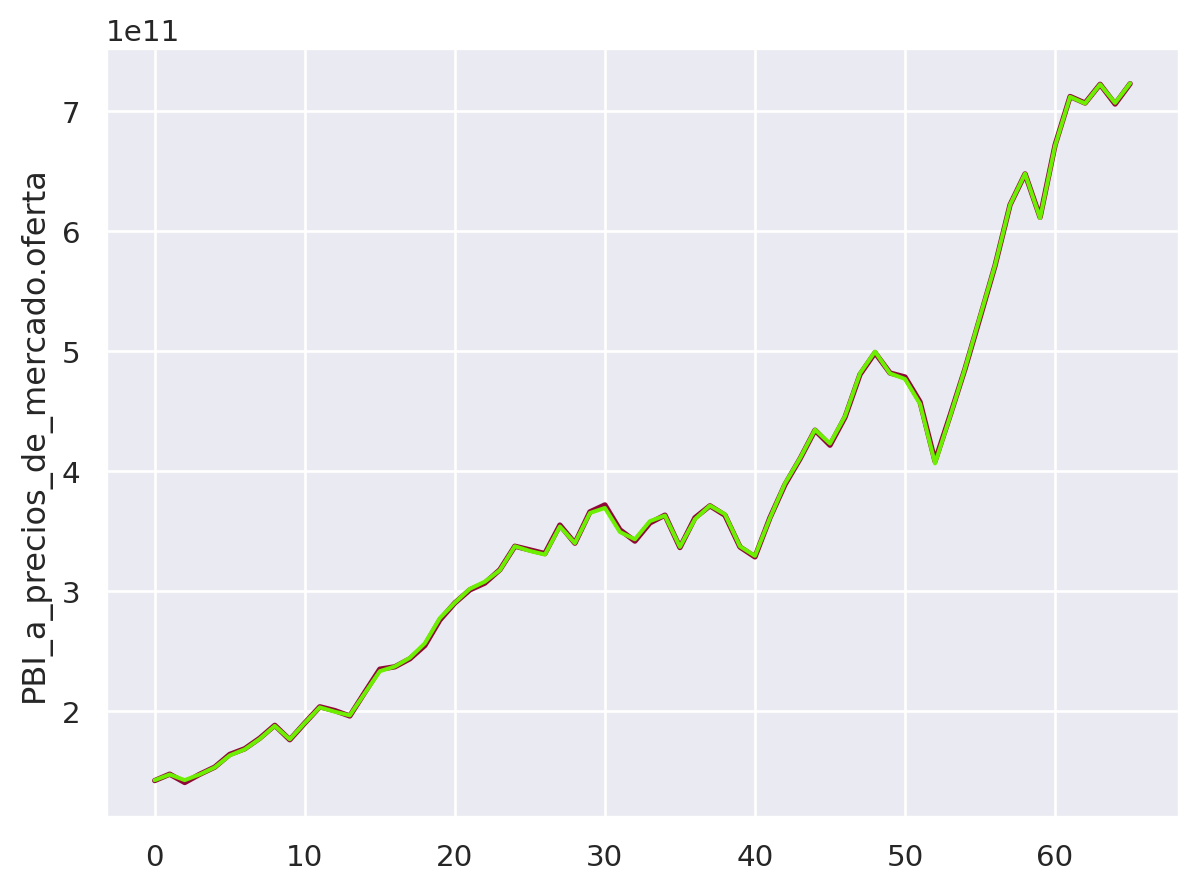

In [48]:
# b)

# datos = macro.loc[:, [col for col in macro.columns if col != 'PBI_a_precios_de_mercado.oferta']]
# # datos['PBI_a_precios_de_mercado.oferta']= macro.loc[:, 'PBI_a_precios_de_mercado.oferta']  # Forma correcta: retorna una serie
# datos['PBI_a_precios_de_mercado.oferta'] = macro['PBI_a_precios_de_mercado.oferta']  # Alternativa, retorna una serie 
# # datos['PBI_a_precios_de_mercado.oferta']= macro[['PBI_a_precios_de_mercado.oferta']] Funciona pero en realidad retorna un dataframe

# # Obtengo los nombres de la variables x que van a predecir a y
columnas_X = [col for col in macro.columns if col != 'PBI_a_precios_de_mercado.oferta']
# # Construyo la formula en notación den Wilkinson
# formula = 'PBI_a_precios_de_mercado.oferta ~ ' + ' + '.join(columnas_X)

# y, X = Formula(formula).get_model_matrix(datos)
# # # Verifico los datos
# # X.head()
# # y.head()

# Como este caso es simple, puedo obtener X,y directamente:

X = macro[columnas_X]  # Equivale a macro[['c1', 'c2', ..., 'cn']]
y = macro['PBI_a_precios_de_mercado.oferta']

modelo = linear_model.LinearRegression(fit_intercept=True)  # Inicializo el modelo de regresión lineal con intercepto porque no tiene 
modelo.fit(X, y)  # Realizo el ajuste

# Analizo la bondad del ajuste: ¿qué tan bien explica el modelo la variabilidad de los datos?
predicciones_de_y = modelo.predict(X)
r2 = r2_score(y, predicciones_de_y)
print(f'R2: {r2}')

# Calculo el error cuadrático medio y le tomo raíz
ecm = mean_squared_error(y, predicciones_de_y)
print(f'Raíz del ecm: {np.sqrt(ecm)}')
# modelo.coef_  # Para ver el vector solución

(
    so.Plot()
    .add(so.Line(color='#8f0938', linewidth=2), x=np.array(list(range(len(y)))), y=y )
    .add(so.Line(color='#6cef00'), x=np.array(list(range(len(predicciones_de_y)))), y=predicciones_de_y)
)


### Ejercicio 2

**Enunciado**: Hallar un escalamiento lineal $f(x)$ que transforme los valores en el intervalo $[2, 5]$ a valores en el intevalo $[0, 1]$.

$f(x) = ax + b \quad \leadsto \quad \begin{cases}f(2) = a2 + b = 0 \leadsto b = -2a\\ \\ f(5) = a5 + b = 1 \leadsto 5a -2a = 1  \end{cases} \quad \leadsto \quad \displaystyle a = \frac{1}{3}, \; b = \frac{-2}{3} \quad \leadsto \quad \boxed{f(x) = \frac{1}{3}x -\frac{-2}{3}}$


### Fórmula general para escalar

$[x_{min}, x_{max}] \rightarrow [y_{min}, y_{max}]$

$\boxed{\displaystyle f(x) = y_{min} + \frac{y_{max} - y_{min}}{x_max - x_{min}} \cdot (x - x_{min})}$

En este caso: $\quad\displaystyle f(x) = 0 + \frac{1-0}{5-2} \cdot (x-2) = \ldots = \frac{1}{3}x - \frac{2}{3}$


### Ejercicio 3

In [54]:
# Obtengo y preparo los datos
ruta_a_datos = Path(os.getcwd()) / 'recs' / 'CollegeBasketballPlayers2009-2021.csv'
jugadores = pd.read_csv(ruta_a_datos)
# print(jugadores.isna().sum())
# columna_27 = jugadores.iloc[:, 27] 
# print(jugadores.iloc[:, 27].unique())
# print(columna_27)


# Arreglo las columnas para que funcionen en la formula con la notación de Wilkinson
jugadores = jugadores.rename(columns={'Rec Rank': 'RecRank'})
jugadores.columns = jugadores.columns.str.replace('+', '_plus_')
jugadores.columns = jugadores.columns.str.replace('/', '_over_')
jugadores.columns = jugadores.columns.str.replace(':', '')
jugadores.columns = jugadores.columns.str.replace(' ', '_')
jugadores.columns = jugadores.columns.str.replace('(', '')
jugadores.columns = jugadores.columns.str.replace(')', '')
# print(jugadores.columns)

# Obtengo los tipos de cada columna
tipo_de_dato_en_columnas = jugadores.dtypes
columnas_numericas = [ # Me quedo solo con aquellas donde el tipo sea int o float
    col for col in jugadores.columns 
    if tipo_de_dato_en_columnas[col] in ['int64', 'float64']
]
# print(columnas_numericas)
jugadores = jugadores[columnas_numericas]

# Genero una lista con los valores problemáticos
lista_a_borrar = [e for e in jugadores.iloc[:, 27].unique() if not isinstance(e, (int, float))]
lista_a_borrar = [e for e in lista_a_borrar if not e.isdigit()]
jugadores = jugadores[~jugadores.iloc[:, 27].isin(lista_a_borrar)]  # Me quedo con las filas cuyo valor en la columna 27 no está en la lista

# jugadores.columns[27] Devuelve el nombre de la columna 27
jugadores[jugadores.columns[27]] = pd.to_numeric( # Convierto a float
    jugadores[jugadores.columns[27]],  
    errors="coerce"  # Convierte valores no-numéricos a NaN
) 
jugadores[jugadores.columns[27]] = jugadores[jugadores.columns[27]].fillna(0.0)  # Reemplazo NaN con 0.0
display(jugadores)


/tmp/ipykernel_3333/3470680935.py:3: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  jugadores = pd.read_csv(ruta_a_datos)


GP  Min_per   Ortg   usg   eFG  TS_per  ORB_per  DRB_per  AST_per  \
0      26     29.5   97.3  16.6  42.5   44.43      1.6      4.6     15.8   
1      34     60.9  108.3  14.9  52.4   54.48      3.8      6.3     13.6   
2      27     72.0   96.2  21.8  45.7   47.98      2.1      8.0     14.7   
3      30     44.5   97.7  16.0  53.6   53.69      4.1      9.4     13.7   
4      33     56.2   96.5  22.0  52.8   54.31      8.3     18.6      8.2   
...    ..      ...    ...   ...   ...     ...      ...      ...      ...   
61056   2      0.3   60.5  19.3   0.0    0.00      0.0      0.0     51.1   
61057   4      1.3   28.3   7.1   0.0    0.00      7.0      0.0      0.0   
61058   1      0.1    0.0   0.0   0.0    0.00      0.0      0.0      0.0   
61059   1      0.1    0.0   0.0   0.0    0.00      0.0      0.0      0.0   
61060   4      1.0   89.6  28.8  25.0   25.00     10.3      0.0     48.0   

       TO_per  ...     ogbpm      dgbpm    oreb    dreb    treb     ast  \
0        16.3  ... -2.781990  -1.941150  0.1923  0.6154  0.8077  1.1923   
1        19.8  ... -0.052263  -0.247934  0.6765  1.2647  1.9412  1.8235   
2        15.9  ...  1.548230  -0.883163  0.6296  2.3333  2.9630  1.9630   
3        23.8  ... -0.342775  -0.393459  0.7000  1.4333  2.1333  1.1000   
4        22.7  ... -1.684860  -0.668318  1.4242  3.3030  4.7273  0.8485   
...       ...  ...       ...        ...     ...     ...     ...     ...   
61056     0.0  ...  2.143290  16.018200  0.0000  0.0000  0.0000  0.5000   
61057    50.3  ... -7.242230  -4.993820  0.2500  0.0000  0.2500  0.0000   
61058     0.0  ... -3.524820  -1.126810  0.0000  0.0000  0.0000  0.0000   
61059     0.0  ... -1.876040  -2.380750  0.0000  0.0000  0.0000  0.0000   
61060     0.0  ...  9.220840  -3.329310  0.2500  0.0000  0.2500  0.7500   

          stl     blk      pts  Unnamed_65  
0      0.3462  0.0385   3.8846     6.22026  
1      0.4118  0.2353   5.9412     3.94375  
2      0.4815  0.0000  12.1852    10.92680  
3      0.5667  0.1333   4.9333     6.77427  
4      0.4545  0.3333   7.5758     0.00000  
...       ...     ...      ...         ...  
61056  0.5000  0.0000   0.0000     0.00000  
61057  0.0000  0.0000   0.0000     0.00000  
61058  0.0000  0.0000   0.0000     0.00000  
61059  0.0000  0.0000   0.0000     0.00000  
61060  0.0000  0.0000   0.7500    10.43920  

[61061 rows x 58 columns]

### Modelo sin escalar los datos con MinMax

In [55]:
# # Obtengo los nombres de la variables x que van a predecir a y
columnas_X = [col for col in jugadores.columns if col != 'pts']
# Construyo la formula en notación den Wilkinson
formula = 'pts ~ ' + ' + '.join(columnas_X)
# print(formula)

# Genero el modelo
y, X = Formula(formula).get_model_matrix(jugadores)

modelo = linear_model.LinearRegression(fit_intercept=False)  # Inicializo el modelo de regresión lineal sin intercepto porque ya tiene 
modelo.fit(X, y)  # Realizo el ajuste

# Analizo la bondad del ajuste: ¿qué tan bien explica el modelo la variabilidad de los datos?
predicciones_de_y = modelo.predict(X)
r2 = r2_score(y, predicciones_de_y)
print(f'R2: {r2}')

# Calculo el error cuadrático medio y le tomo raíz
ecm = mean_squared_error(y, predicciones_de_y)
print(f'Raíz del ecm: {np.sqrt(ecm)}')
# modelo.coef_  # Para ver el vector solución

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo.coef_[0].shape[0]):
    pesos_coeficientes[modelo.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

R2: 0.9906236685609148
Raíz del ecm: 0.47392633734307515


{'dbpm': 2606.3233486855675,
 'obpm': 2606.277714407432,
 'ogbpm': 1120.8071500999258,
 'dgbpm': 1120.5726715284989,
 'treb': 105.5306127923402,
 'stl': 2.2606638658166647,
 'porpag': 0.6688405287960044,
 'midmade_over_midmade_plus_midmiss': 0.3924081806913413,
 'usg': 0.3044480574056386,
 'blk': 0.27683718436917015,
 'mp': 0.21745398190770127,
 'pfr': 0.18561793263424783,
 'TS_per': 0.09982735053678679,
 'Ortg': 0.09717147132247242,
 'year': 0.05891134029681283,
 'TPM': 0.03004010313168029,
 'rimmade': 0.030015244861189505,
 'twoPA': 0.01971172749136657,
 'midmade': 0.01941102709578424,
 'FTM': 0.011877585827573235,
 'TPA': 0.010739954963883358,
 'twoPM': 0.009629886721209319,
 'dunksmiss_plus_dunksmade': 0.006993453461341614,
 'drtg': 0.004525673634337438,
 'ftr': 0.002712484679565086,
 'FTA': 0.0007253044010220172,
 'RecRank': 0.000229298357007357,
 'pick': 0.00015318387116991516,
 'pid': 1.606405507836861e-06,
 'blk_per': -0.007874701669264291,
 'dunksmade': -0.009226297251225368,


### Modelo con los datos escalados (MinMax)

In [56]:
# Escalo los datos
escalador = MinMaxScaler().set_output(transform='pandas')  # Le indico que devuelva un DataFrame

# Calculo los coeficientes y escalo las variables
X_escalada = escalador.fit_transform(X)  
# display(X_escalada)

# Vuelvo a ajustar, usando los datos escalados
modelo_lineal = linear_model.LinearRegression()
modelo_lineal.fit(X_escalada,y)
predicciones_de_y = modelo_lineal.predict(X_escalada)

# Evalúo el modelo
rmse = np.sqrt(mean_squared_error(y, predicciones_de_y))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, predicciones_de_y)
print(f"R cuadrado: {r2:.5f}")

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo_lineal.coef_[0].shape[0]):
    pesos_coeficientes[modelo_lineal.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

Raíz del Error Cuadrático Medio: 0.47393
R cuadrado: 0.99062


{'obpm': 48782.92493200002,
 'dbpm': 40274.42005218314,
 'ogbpm': 22097.92344146373,
 'dgbpm': 14016.033333167701,
 'treb': 1484.5307892264655,
 'twoPA': 10.368368660641941,
 'usg': 8.098318326956809,
 'stl': 7.786630619441729,
 'mp': 7.729662731726708,
 'rimmade': 7.3237197462361046,
 'Ortg': 7.0157802294660545,
 'porpag': 5.796205464630402,
 'TPM': 4.415895160309348,
 'TPA': 4.0811828863231066,
 'TS_per': 4.049995611361958,
 'midmade': 3.746328229622568,
 'FTM': 3.0406619718163266,
 'twoPM': 2.946745336519746,
 'pfr': 1.6891231869785281,
 'blk': 1.4556375991304176,
 'dunksmiss_plus_dunksmade': 0.9161424034495966,
 'year': 0.648024743254112,
 'midmade_over_midmade_plus_midmiss': 0.27468572648928113,
 'ftr': 0.2622972684969245,
 'FTA': 0.2386251479700099,
 'drtg': 0.1837744818427769,
 'pid': 0.11833746816485946,
 'RecRank': 0.02292983569491147,
 'pick': 0.009037848402547066,
 'Intercept': -2.1249141633924654e-07,
 'dunksmade_over_dunksmade_plus_dunksmiss': -0.0654939361033513,
 'TP_per

### Modelo con escalamiento estándar

In [57]:
# Llevo la media a cero y divido por la varianza
# X_standard = (X - X.mean()) / np.sqrt(X.var())  # Puedo calcularla "a mano"
escalador_est = StandardScaler().set_output(transform='pandas')
X_escala_est = escalador_est.fit_transform(X)

# Vuelvo a ajustar, usando los datos escalados
modelo_lineal_es = linear_model.LinearRegression()
modelo_lineal_es.fit(X_escala_est,y)
predicciones_de_y = modelo_lineal_es.predict(X_escala_est)

# Evalúo el modelo
rmse = np.sqrt(mean_squared_error(y, predicciones_de_y))
print(f"Raíz del Error Cuadrático Medio: {rmse:.5f}")
r2 = r2_score(y, predicciones_de_y)
print(f"R cuadrado: {r2:.5f}")

# Ordeno el peso de los coeficientes de mayor a menor
pesos_coeficientes = {}
for posicion in range(modelo_lineal_es.coef_[0].shape[0]):
    pesos_coeficientes[modelo_lineal_es.coef_[0][posicion].item()] = posicion      
pesos_ordenados = { c: v for c,v in sorted(pesos_coeficientes.items(), reverse=True) }
# print(pesos_ordenados)

# Obtengo un diccionario con los nombres de las variables y el peso en el modelo
peso_variables = {}
for c,v in pesos_ordenados.items():
    peso_variables[X.columns[v]] = c
display(peso_variables)
# sns.boxplot(X)

Raíz del Error Cuadrático Medio: 0.47393
R cuadrado: 0.99062


{'obpm': 6552.675650085835,
 'dbpm': 5833.43361892144,
 'ogbpm': 3067.7641579235,
 'dgbpm': 1781.475682458759,
 'treb': 250.2777992344681,
 'twoPA': 1.8620012579273362,
 'mp': 1.4728956773762478,
 'usg': 1.3422965423272557,
 'stl': 1.1529209530575413,
 'rimmade': 1.1204051234941375,
 'porpag': 1.0323049122512682,
 'Ortg': 0.9221022498680795,
 'TPM': 0.8656712443060274,
 'TPA': 0.7808201173811575,
 'FTM': 0.559159566822871,
 'TS_per': 0.5122440426878665,
 'twoPM': 0.5066491716233545,
 'midmade': 0.5031430860838122,
 'pfr': 0.20826379083655105,
 'blk': 0.2077189872088837,
 'year': 0.1950496442070575,
 'dunksmiss_plus_dunksmade': 0.13335849609586176,
 'FTA': 0.04374548000483225,
 'ftr': 0.04020066886844614,
 'pid': 0.03030152769949164,
 'midmade_over_midmade_plus_midmiss': 0.029483530399242175,
 'drtg': 0.027078507748626413,
 'RecRank': 0.007378010602059615,
 'pick': 0.002552681379213051,
 'Intercept': -2.1586985975327186e-08,
 'dunksmade_over_dunksmade_plus_dunksmiss': -0.008906389273451

## **Ejercicios Práctica 7**: *Entrenamiento, validación y testeo*

### Ejercicio 1
#### a)

In [152]:
pings = sns.load_dataset('penguins')
pings.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [153]:
# Examino los datos faltantes
pings.isnull().values.any()

np.True_

In [154]:
# Elimino las filas con datos faltantes
pings_sin_nan = pings.dropna().reset_index(drop=True)
pings_sin_nan.isnull().values.any()

np.False_

#### b) 
**Modelo con polinomio de grado 1**

In [155]:
# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X1 = pings_sin_nan[['flipper_length_mm']]
y1 = pings_sin_nan[['body_mass_g']]  # Podría utilizar Formulaic para obtener X1, y1...
X1_entrento, X1_test, y1_entrento, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
modelo1 = linear_model.LinearRegression(fit_intercept = True)
modelo1.fit(X1_entrento, y1_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_test = modelo1.predict(X1_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_test = r2_score(y1_test, y1_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_test = mean_squared_error(y1_test, y1_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_test = np.sqrt(ecm_mod1_test)

# Evalúo los resultados:
# Si R2_entrento >> R2_test hay sobreajuste
# Si ambos son muy bajos hay subajuste
# Si toman valores cercanos es aceptable
print('Modelo con polinomio de grado 1\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_test*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

Modelo con polinomio de grado 1

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 399.841mm de los valores reales.
El modelo explica el 75.415% de la variabilidad en el peso de los pingüinos.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 360.398mm de los valores reales.
El modelo explica el 79.381% de la variabilidad en el peso de los pingüinos.



**Modelo con polinomio de grado 2**

In [156]:
# Podría utilizar Formulaic para obtener X2, y2 haciendo:
# y2, X2 = Formula('body_mass_g ~ poly(flipper_length_mm, 2, raw=True)-1').get_model_matrix(pings_sin_nan)
# pero lo hago a mano:
 
# Para asegurarme que es copia y que no salte la advertencia
X2 = pings_sin_nan[['flipper_length_mm']].copy()
# La forma correcta de obtener: X2['body_mass_g_al_cuadrado'] = y2.body_mass_g ** 2, es haciendo:
X2.loc[:, 'flipper_length_mm_al_cuadrado'] = X2['flipper_length_mm'] ** 2
y2 = pings_sin_nan[['body_mass_g']].copy()  

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X2_entrento, X2_test, y2_entrento, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

modelo2 = linear_model.LinearRegression(fit_intercept = True)
modelo2.fit(X2_entrento, y2_entrento)
# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y2_predic_entrento = modelo2.predict(X2_entrento)
y2_predic_test = modelo2.predict(X2_test)
# Calculo los coeficientes de determinación (R2) 
r2_mod2_entrento = r2_score(y2_entrento, y2_predic_entrento)
r2_mod2_test = r2_score(y2_test, y2_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod2_entrento = mean_squared_error(y2_entrento, y2_predic_entrento)
ecm_mod2_test = mean_squared_error(y2_test, y2_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod2_entrento = np.sqrt(ecm_mod2_entrento)
recm_mod2_test = np.sqrt(ecm_mod2_test)

print('Modelo con polinomio de grado 2\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_test*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

Modelo con polinomio de grado 2

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 384.367mm de los valores reales.
El modelo explica el 77.281% de la variabilidad en el peso de los pingüinos.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 357.395mm de los valores reales.
El modelo explica el 79.723% de la variabilidad en el peso de los pingüinos.



**Modelo con polinomio de grado 3**

In [199]:
X3 = pings_sin_nan[['flipper_length_mm']].copy()
X3.loc[:, 'flipper_length_mm_al_cuadrado'] = X3['flipper_length_mm'] ** 2
X3.loc[:, 'flipper_length_mm_al_cubo'] = X3['flipper_length_mm'] ** 3
y3 = pings_sin_nan[['body_mass_g']].copy()  

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X3_entrento, X3_test, y3_entrento, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=42)

modelo3 = linear_model.LinearRegression(fit_intercept = True)
modelo3.fit(X3_entrento, y3_entrento)
# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y3_predic_entrento = modelo3.predict(X3_entrento)
y3_predic_test = modelo3.predict(X3_test)
# Calculo los coeficientes de determinación (R2) 
r2_mod3_entrento = r2_score(y3_entrento, y3_predic_entrento)
r2_mod3_test = r2_score(y3_test, y3_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod3_entrento = mean_squared_error(y3_entrento, y3_predic_entrento)
ecm_mod3_test = mean_squared_error(y3_test, y3_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod3_entrento = np.sqrt(ecm_mod3_entrento)
recm_mod3_test = np.sqrt(ecm_mod3_test)

print('Modelo con polinomio de grado 3\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod3_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod3_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_test*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

Modelo con polinomio de grado 3

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 379.468mm de los valores reales.
El modelo explica el 77.856% de la variabilidad en el peso de los pingüinos.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 351.66mm de los valores reales.
El modelo explica el 80.369% de la variabilidad en el peso de los pingüinos.



### Ejercicio 2
#### a)

In [200]:
ruta = Path(os.getcwd()) / 'recs' / '50_Startups.csv'
sups = pd.read_csv(ruta)
display(sups.head())
sups.isnull().values.any()# Examino los datos faltantes

Investigacion  Administracion  Marketing      Estado   Ganancia
0      165349.20       136897.80  471784.10    New York  192261.83
1      162597.70       151377.59  443898.53  California  191792.06
2      153441.51       101145.55  407934.54     Florida  191050.39
3      144372.41       118671.85  383199.62    New York  182901.99
4      142107.34        91391.77  366168.42     Florida  166187.94

np.False_

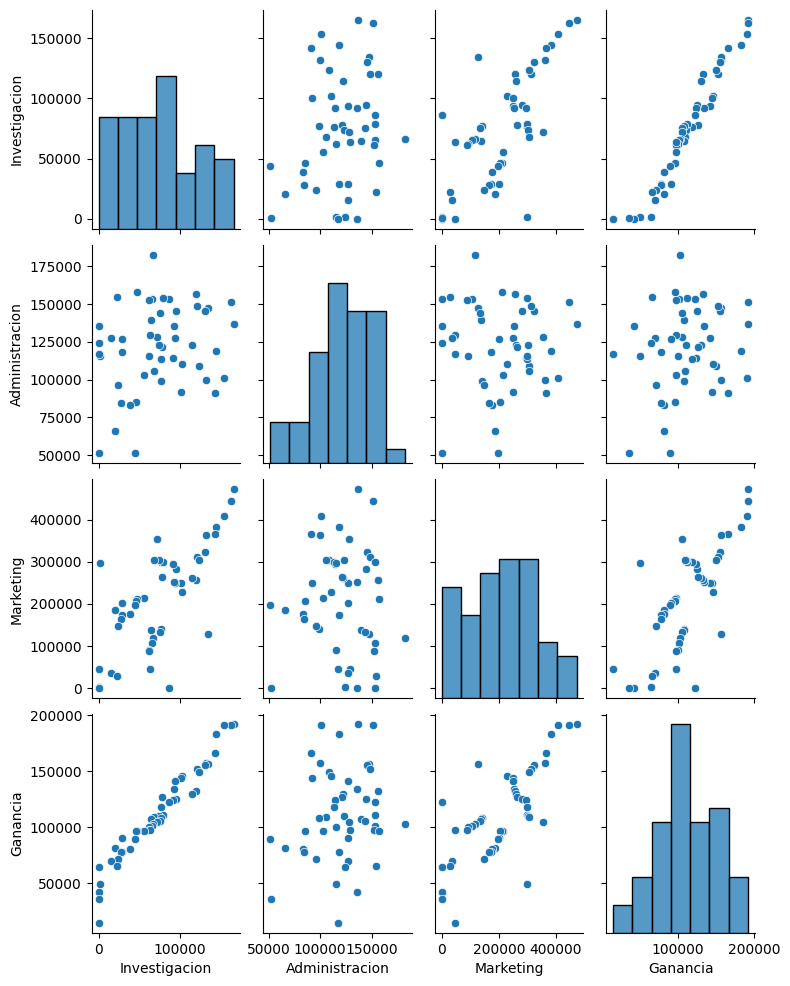

In [201]:
# Construyo un gráfico de dispersión para cada par de variables
sns.pairplot(data=sups, aspect=.8)

**Predicción de ganancia según investigación**

In [202]:
y1, X1 = (
    Formula('Ganancia ~ Investigacion')
    .get_model_matrix(sups)
)
# # Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X1_entrento, X1_test, y1_entrento, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
modelo1 = linear_model.LinearRegression(fit_intercept = True)
modelo1.fit(X1_entrento, y1_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_test = modelo1.predict(X1_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_test = r2_score(y1_test, y1_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_test = mean_squared_error(y1_test, y1_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_test = np.sqrt(ecm_mod1_test)

# Evalúo los resultados:
# Si R2_entrento >> R2_test hay sobreajuste
# Si ambos son muy bajos hay subajuste
# Si toman valores cercanos es aceptable
print('Modelo lineal univariado\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en USD${np.round(recm_mod1_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en las ganancias según la inversión en investigación y desarrollo.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en USD${np.round(recm_mod1_test, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_test*100, 3)}% de la variabilidad en las ganancias según la inversión en investigación y desarrollo.\n')

Modelo lineal univariado

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en USD$9571.047 de los valores reales.
El modelo explica el 94.679% de la variabilidad en las ganancias según la inversión en investigación y desarrollo.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en USD$7714.335 de los valores reales.
El modelo explica el 92.651% de la variabilidad en las ganancias según la inversión en investigación y desarrollo.



**Predicción de ganancia: modelo multivariado**

In [203]:
y2, X2 = (
    Formula('Ganancia ~ Investigacion + Administracion + Marketing + Estado')
    .get_model_matrix(sups)
)
# # Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X2_entrento, X2_test, y2_entrento, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
modelo2 = linear_model.LinearRegression(fit_intercept = True)
modelo2.fit(X2_entrento, y2_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y2_predic_entrento = modelo2.predict(X2_entrento)
y2_predic_test = modelo2.predict(X2_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod2_entrento = r2_score(y2_entrento, y2_predic_entrento)
r2_mod2_test = r2_score(y2_test, y2_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod2_entrento = mean_squared_error(y2_entrento, y2_predic_entrento)
ecm_mod2_test = mean_squared_error(y2_test, y2_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod2_entrento = np.sqrt(ecm_mod2_entrento)
recm_mod2_test = np.sqrt(ecm_mod2_test)

# Evalúo los resultados:
# Si R2_entrento >> R2_test hay sobreajuste
# Si ambos son muy bajos hay subajuste
# Si toman valores cercanos es aceptable
print('Modelo lineal multivariado\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en USD${np.round(recm_mod2_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_entrento*100, 3)}% de la variabilidad en las ganancias.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en USD${np.round(recm_mod2_test, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_test*100, 3)}% de la variabilidad en las ganancias.\n')

Modelo lineal multivariado

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en USD$8927.489 de los valores reales.
El modelo explica el 95.37% de la variabilidad en las ganancias.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en USD$9055.957 de los valores reales.
El modelo explica el 89.873% de la variabilidad en las ganancias.



El **modelo1** solo consideró la inversión en *Investigación y Desarrollo* y tuvo **mejores resultados**.

### Ejercicio 3

In [204]:
pings = sns.load_dataset('penguins')
pings.head()
pings_sin_nan = pings.dropna().reset_index(drop=True)
pings_sin_nan.isnull().values.any()
pings_sin_nan.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen            36.7           19.3              193.0   
4  Adelie  Torgersen            39.3           20.6              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3       3450.0  Female  
4       3650.0    Male

In [205]:
# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
# Si uso formulaic, maneja automáticamente las variables categóricas:
# para cada columna que puede tomar k valores distintos, agrega k-1 columnas de binarias 
# ya que el caso base lo captura el intercepto, es decir, maneja el que se deduce 
# cuando no es ninguno de los otrosS
y1, X1 = ( 
    Formula('body_mass_g ~ flipper_length_mm  + sex')
    .get_model_matrix(pings_sin_nan)
)
# y1, X1 son de tipo formulaic.ModelMatrix: para convertir y1 a serie hago y1.squeeze()
# Para convertir X1 a dataframe hago: X1_df = pd.DataFrame(X1, columns=X1.columns)


X1_entrento, X1_test, y1_entrento, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
# Cuando uso fit_intercept = True, accedo al mismo con: modelo1.intercept_[0]
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1_entrento, y1_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_test = modelo1.predict(X1_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_test = r2_score(y1_test, y1_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_test = mean_squared_error(y1_test, y1_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_test = np.sqrt(ecm_mod1_test)

# Evalúo los resultados:
print('Modelo lineal multivariado 1\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos en función del sexo y el largo de la aleta.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_test*100, 3)}% de la variabilidad en el peso de los pingüinos en función del sexo y el largo de la aleta.\n')

# El cero que aparece como primer coeficiente resulta de que formulaic
# agregó a X una columna de 1, pero sklearn maneja su propio intercepto
# asi que la llena de ceros y el verdadero intercepto está en modelo1.intercept_[0]
print(f'Intercepto real: {modelo1.intercept_[0]}\n\nCoeficientes del modelo: \n{modelo1.feature_names_in_} \n{modelo1.coef_}')

Modelo lineal multivariado 1

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 364.686mm de los valores reales.
El modelo explica el 79.548% de la variabilidad en el peso de los pingüinos en función del sexo y el largo de la aleta.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 309.821mm de los valores reales.
El modelo explica el 84.762% de la variabilidad en el peso de los pingüinos en función del sexo y el largo de la aleta.

Intercepto real: -5481.821971122379

Coeficientes del modelo: 
['Intercept' 'flipper_length_mm' 'sex[T.Male]'] 
[[  0.          47.36694421 338.90293776]]


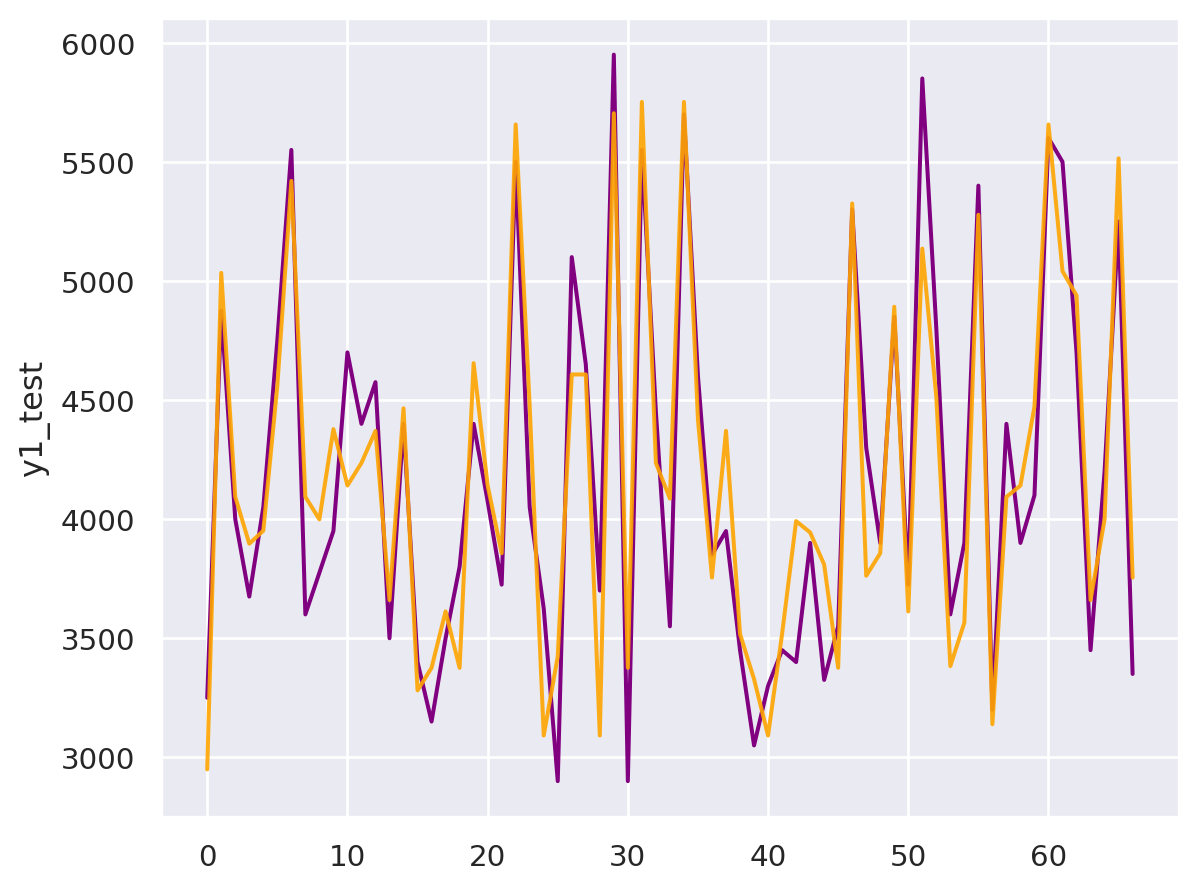

In [206]:
# Visualizo
datos = pd.DataFrame()
datos['y1_predic_test'] = pd.Series(y1_predic_test.flatten())
datos['y1_test'] = y1_test.reset_index(drop=True)
datos

(
    so.Plot(data=datos, x=list(range(datos.shape[0])), y='y1_test')
    .add(so.Line(color='purple'))
    .add(so.Line(color='orange', alpha=0.9), y='y1_predic_test') # Predicción del modelo
)

Predicción: *dos pingüinos que tienen igual largo de aleta, uno macho y otro hembra, ¿qué diferencia
de peso predice el modelo que tendrán?*

$\displaystyle peso = intercepto + coefAleta\cdot x_1 + coefSexo\cdot x_2$

In [207]:
largo_aleta = 200
intercepto = modelo1.intercept_[0]  # Recordar como accedo al intercepto real!
coef_aleta = modelo1.coef_[0][1]
coef_sexo = modelo1.coef_[0][2]

peso_macho = intercepto + largo_aleta*coef_aleta + 1*coef_sexo
peso_hembra = intercepto + largo_aleta*coef_aleta + 0*coef_sexo

print(f'Peso macho: {peso_macho}, peso hembra: {peso_hembra}')

Peso macho: 4330.469807800884, peso hembra: 3991.5668700370024


### Ejercicio 4

Modelo lineal multivariado 1

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 376.482mm de los valores reales.
El modelo explica el 78.203% de la variabilidad en el peso de los pingüinos.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 349.55mm de los valores reales.
El modelo explica el 80.604% de la variabilidad en el peso de los pingüinos.

Intercepto real: -3802.192949420847

Coeficientes del modelo: 
['Intercept' 'flipper_length_mm' 'species[T.Chinstrap]'
 'species[T.Gentoo]'] 
[[   0.           39.4945438  -196.43832899  330.17868805]]


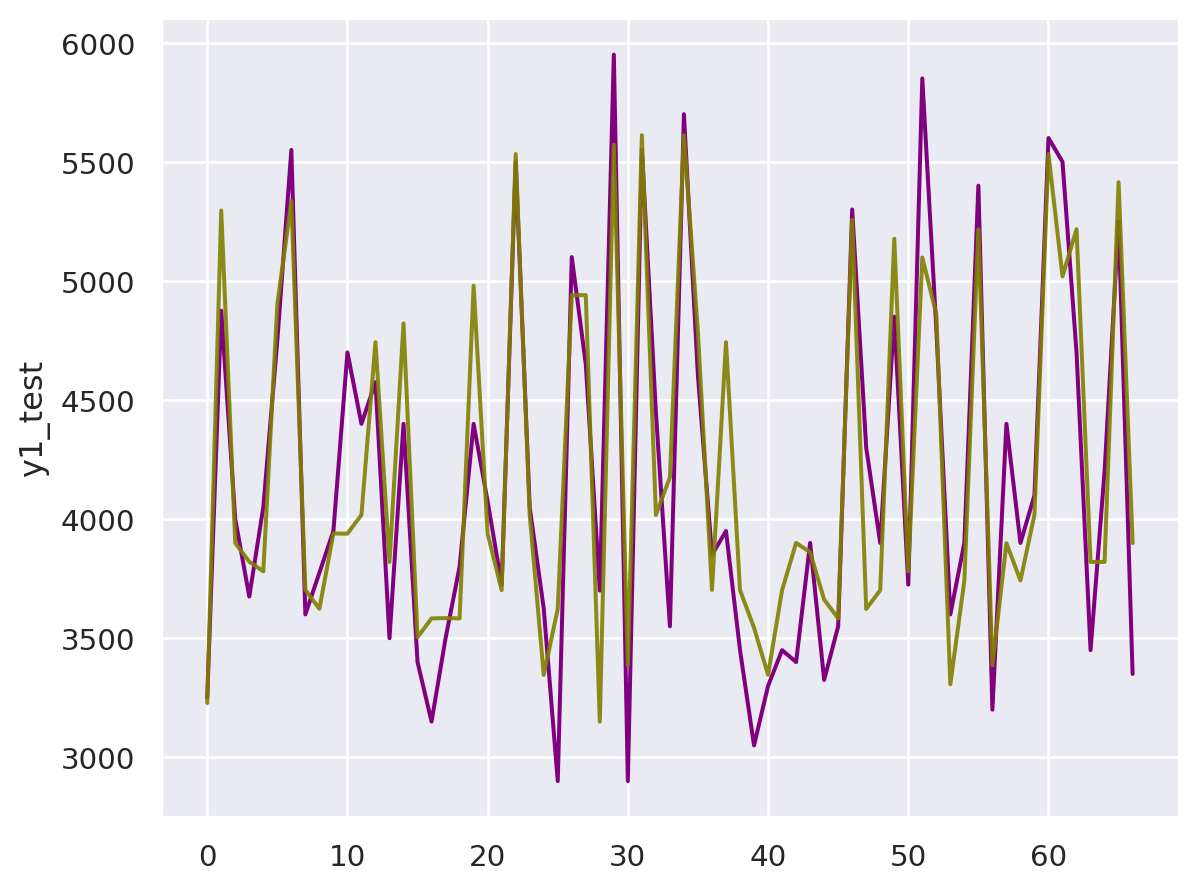

In [208]:
# Obtengo los datos y descarto los nulos
pings = sns.load_dataset('penguins')
pings_sin_nan = pings.dropna().reset_index(drop=True)
pings_sin_nan.isnull().values.any()


# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
y1, X1 = ( 
    Formula('body_mass_g ~ flipper_length_mm + species')
    .get_model_matrix(pings_sin_nan)
)

X1_entrento, X1_test, y1_entrento, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
# Cuando uso fit_intercept = True, accedo al mismo con: modelo1.intercept_[0]
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1_entrento, y1_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_test = modelo1.predict(X1_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_test = r2_score(y1_test, y1_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_test = mean_squared_error(y1_test, y1_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_test = np.sqrt(ecm_mod1_test)

# Evalúo los resultados:
print('Modelo lineal multivariado 1\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_test*100, 3)}% de la variabilidad en el peso de los pingüinos.\n')

print(f'Intercepto real: {modelo1.intercept_[0]}\n\nCoeficientes del modelo: \n{modelo1.feature_names_in_} \n{modelo1.coef_}')

# Visualizo
datos = pd.DataFrame()
datos['y1_predic_test'] = pd.Series(y1_predic_test.flatten())
datos['y1_test'] = y1_test.reset_index(drop=True)
datos

(
    so.Plot(data=datos, x=list(range(datos.shape[0])), y='y1_test')
    .add(so.Line(color='purple'))
    .add(so.Line(color='olive', alpha=0.9), y='y1_predic_test') # Predicción del modelo
)

#### Segunda parte

Modelo lineal multivariado 2, ejercicio 4.

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en 291.204mm de los valores reales.
El modelo explica el 86.96% de la variabilidad en el peso de los pingüinos en función de todas las variables.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 255.749mm de los valores reales.
El modelo explica el 89.617% de la variabilidad en el peso de los pingüinos en función de todas las variables.

Coeficientes del modelo:
[[   0.         -248.23555269 1047.11756472   12.91746759  -52.36678272
    17.14973198   66.91629434   15.30729934  391.0136631 ]]


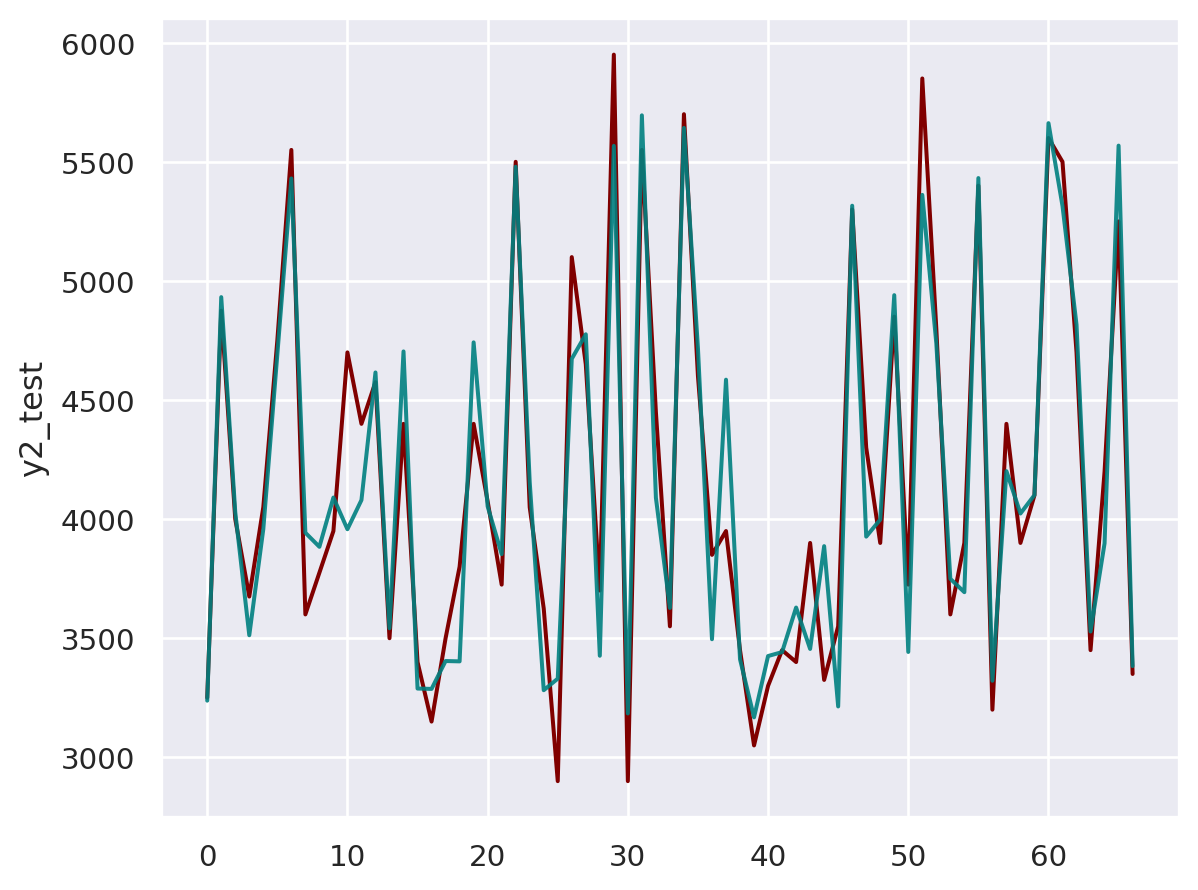

In [209]:
# Construyo la fórmula
variables_explicativas = " + ".join([c for c in pings_sin_nan.columns if c != 'body_mass_g'])
y2, X2 = (
    Formula(f'body_mass_g ~ {variables_explicativas}')
    .get_model_matrix(pings_sin_nan)
)

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X2_entrento, X2_test, y2_entrento, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

# Inicializo el modelo CON INTERCEPTO para no forzarlo a pasar por el origen
modelo2 = linear_model.LinearRegression(fit_intercept = True)
modelo2.fit(X2_entrento, y2_entrento)  # Hago el ajuste

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y2_predic_entrento = modelo2.predict(X2_entrento)
y2_predic_test = modelo2.predict(X2_test)

# Calculo los coeficientes de determinación (R2) 
r2_mod2_entrento = r2_score(y2_entrento, y2_predic_entrento)
r2_mod2_test = r2_score(y2_test, y2_predic_test)
# Calculo los errores cuadráticos medios
ecm_mod2_entrento = mean_squared_error(y2_entrento, y2_predic_entrento)
ecm_mod2_test = mean_squared_error(y2_test, y2_predic_test)
# Calculo la métrica interpretable del error de predicción
recm_mod2_entrento = np.sqrt(ecm_mod2_entrento)
recm_mod2_test = np.sqrt(ecm_mod2_test)

# Evalúo los resultados:
# Si R2_entrento >> R2_test hay sobreajuste
# Si ambos son muy bajos hay subajuste
# Si toman valores cercanos es aceptable
print('Modelo lineal multivariado 2, ejercicio 4.\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_entrento, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_entrento*100, 3)}% de la variabilidad en el peso de los pingüinos en función de todas las variables.\n')

print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_test*100, 3)}% de la variabilidad en el peso de los pingüinos en función de todas las variables.\n')

print(f'Coeficientes del modelo:\n{modelo2.coef_}')

# Visualizo
datos = pd.DataFrame()
datos['y2_predic_test'] = pd.Series(y2_predic_test.flatten())
datos['y2_test'] = y2_test.reset_index(drop=True)
datos

(
    so.Plot(data=datos, x=list(range(datos.shape[0])), y='y2_test')
    .add(so.Line(color='maroon'))
    .add(so.Line(color='teal', alpha=0.9), y='y2_predic_test') # Predicción del modelo
)

### Ejercicio 5

In [29]:
ruta = Path(os.getcwd()) / 'recs' / 'inmuebles.csv'
inmuebles = pd.read_csv(ruta)
display(inmuebles.head())
print(f'Datos faltantes: {inmuebles.isnull().values.any()}')

superficie      precio    zona
0       110.0  454.425690  Zona 2
1       109.0  383.004114  Zona 2
2       101.0  437.362638  Zona 2
3        58.0  304.392486  Zona 3
4       129.0  620.027722  Zona 3

Datos faltantes: False


### **NIVEL 1**: *Ajuste sobre la totalidad de los datos disponibles*

#### **MODELO 1**: $\quad precio \sim superficie$

In [9]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie'
y1, X1 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Hago el ajuste
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1, y1) 

# Calculo el error de predicción en todos los datos
y1_predic = modelo1.predict(X1)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod1 = r2_score(y1, y1_predic)
# ECM
ecm_mod1 = mean_squared_error(y1, y1_predic)
# RECM
recm_mod1 = np.sqrt(ecm_mod1)

# Resultados
print('Modelo 1: regresión lineal univariable\n')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod1, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo1.intercept_[0]}\nCoeficientes del modelo: \n{modelo1.feature_names_in_} \n{modelo1.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod1:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 1: regresión lineal univariable

En promedio, las predicciones se desvían en $51.293 de los valores reales.
El modelo explica el 87.621% de la variabilidad en el precio del inmueble.

Intercepto real: -45.731534030925786
Coeficientes del modelo: 
['Intercept' 'superficie'] 
[[0.         4.73579682]]




$RECM = 51.293$


#### **MODELO 2**: $\quad precio \sim superficie + zona$

In [11]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie + zona'
y2, X2 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Hago el ajuste
modelo2 = linear_model.LinearRegression(fit_intercept = True) 
modelo2.fit(X2, y2) 

# Calculo el error de predicción en todos los datos
y2_predic = modelo2.predict(X2)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod2 = r2_score(y2, y2_predic)
# ECM
ecm_mod2 = mean_squared_error(y2, y2_predic)
# RECM
recm_mod2 = np.sqrt(ecm_mod2)

# Resultados
print('Modelo 2: regresión lineal multivariable\n')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod2, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo2.intercept_[0]}\nCoeficientes del modelo: \n{modelo2.feature_names_in_} \n{modelo2.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod2:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 2: regresión lineal multivariable

En promedio, las predicciones se desvían en $29.848 de los valores reales.
El modelo explica el 95.808% de la variabilidad en el precio del inmueble.

Intercepto real: -3.43077906611461
Coeficientes del modelo: 
['Intercept' 'superficie' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[  0.           3.53386388  53.90813726 134.50896043]]




$RECM = 29.848$


#### **MODELO 3**: $\quad precio \sim superficie^2 + zona$

In [13]:
# Formulo el modelo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona'
y3, X3 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Hago el ajuste
modelo3 = linear_model.LinearRegression(fit_intercept = True) 
modelo3.fit(X3, y3) 

# Calculo el error de predicción en todos los datos
y3_predic = modelo3.predict(X3)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod3 = r2_score(y3, y3_predic)
# ECM
ecm_mod3 = mean_squared_error(y3, y3_predic)
# RECM
recm_mod3 = np.sqrt(ecm_mod3)

# Resultados
print('Modelo 3: regresión polinómica multivariable\n')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod3, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo3.intercept_[0]}\nCoeficientes del modelo: \n{modelo3.feature_names_in_} \n{modelo3.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod3:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 3: regresión polinómica multivariable

En promedio, las predicciones se desvían en $25.411 de los valores reales.
El modelo explica el 96.962% de la variabilidad en el precio del inmueble.

Intercepto real: 108.4978829004805
Coeficientes del modelo: 
['Intercept' 'poly(superficie, 2, raw=True)[0]'
 'poly(superficie, 2, raw=True)[1]' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[0.00000000e+00 4.61797665e-01 1.76668166e-02 6.82197396e+01
  1.40533775e+02]]




$RECM = 25.411$


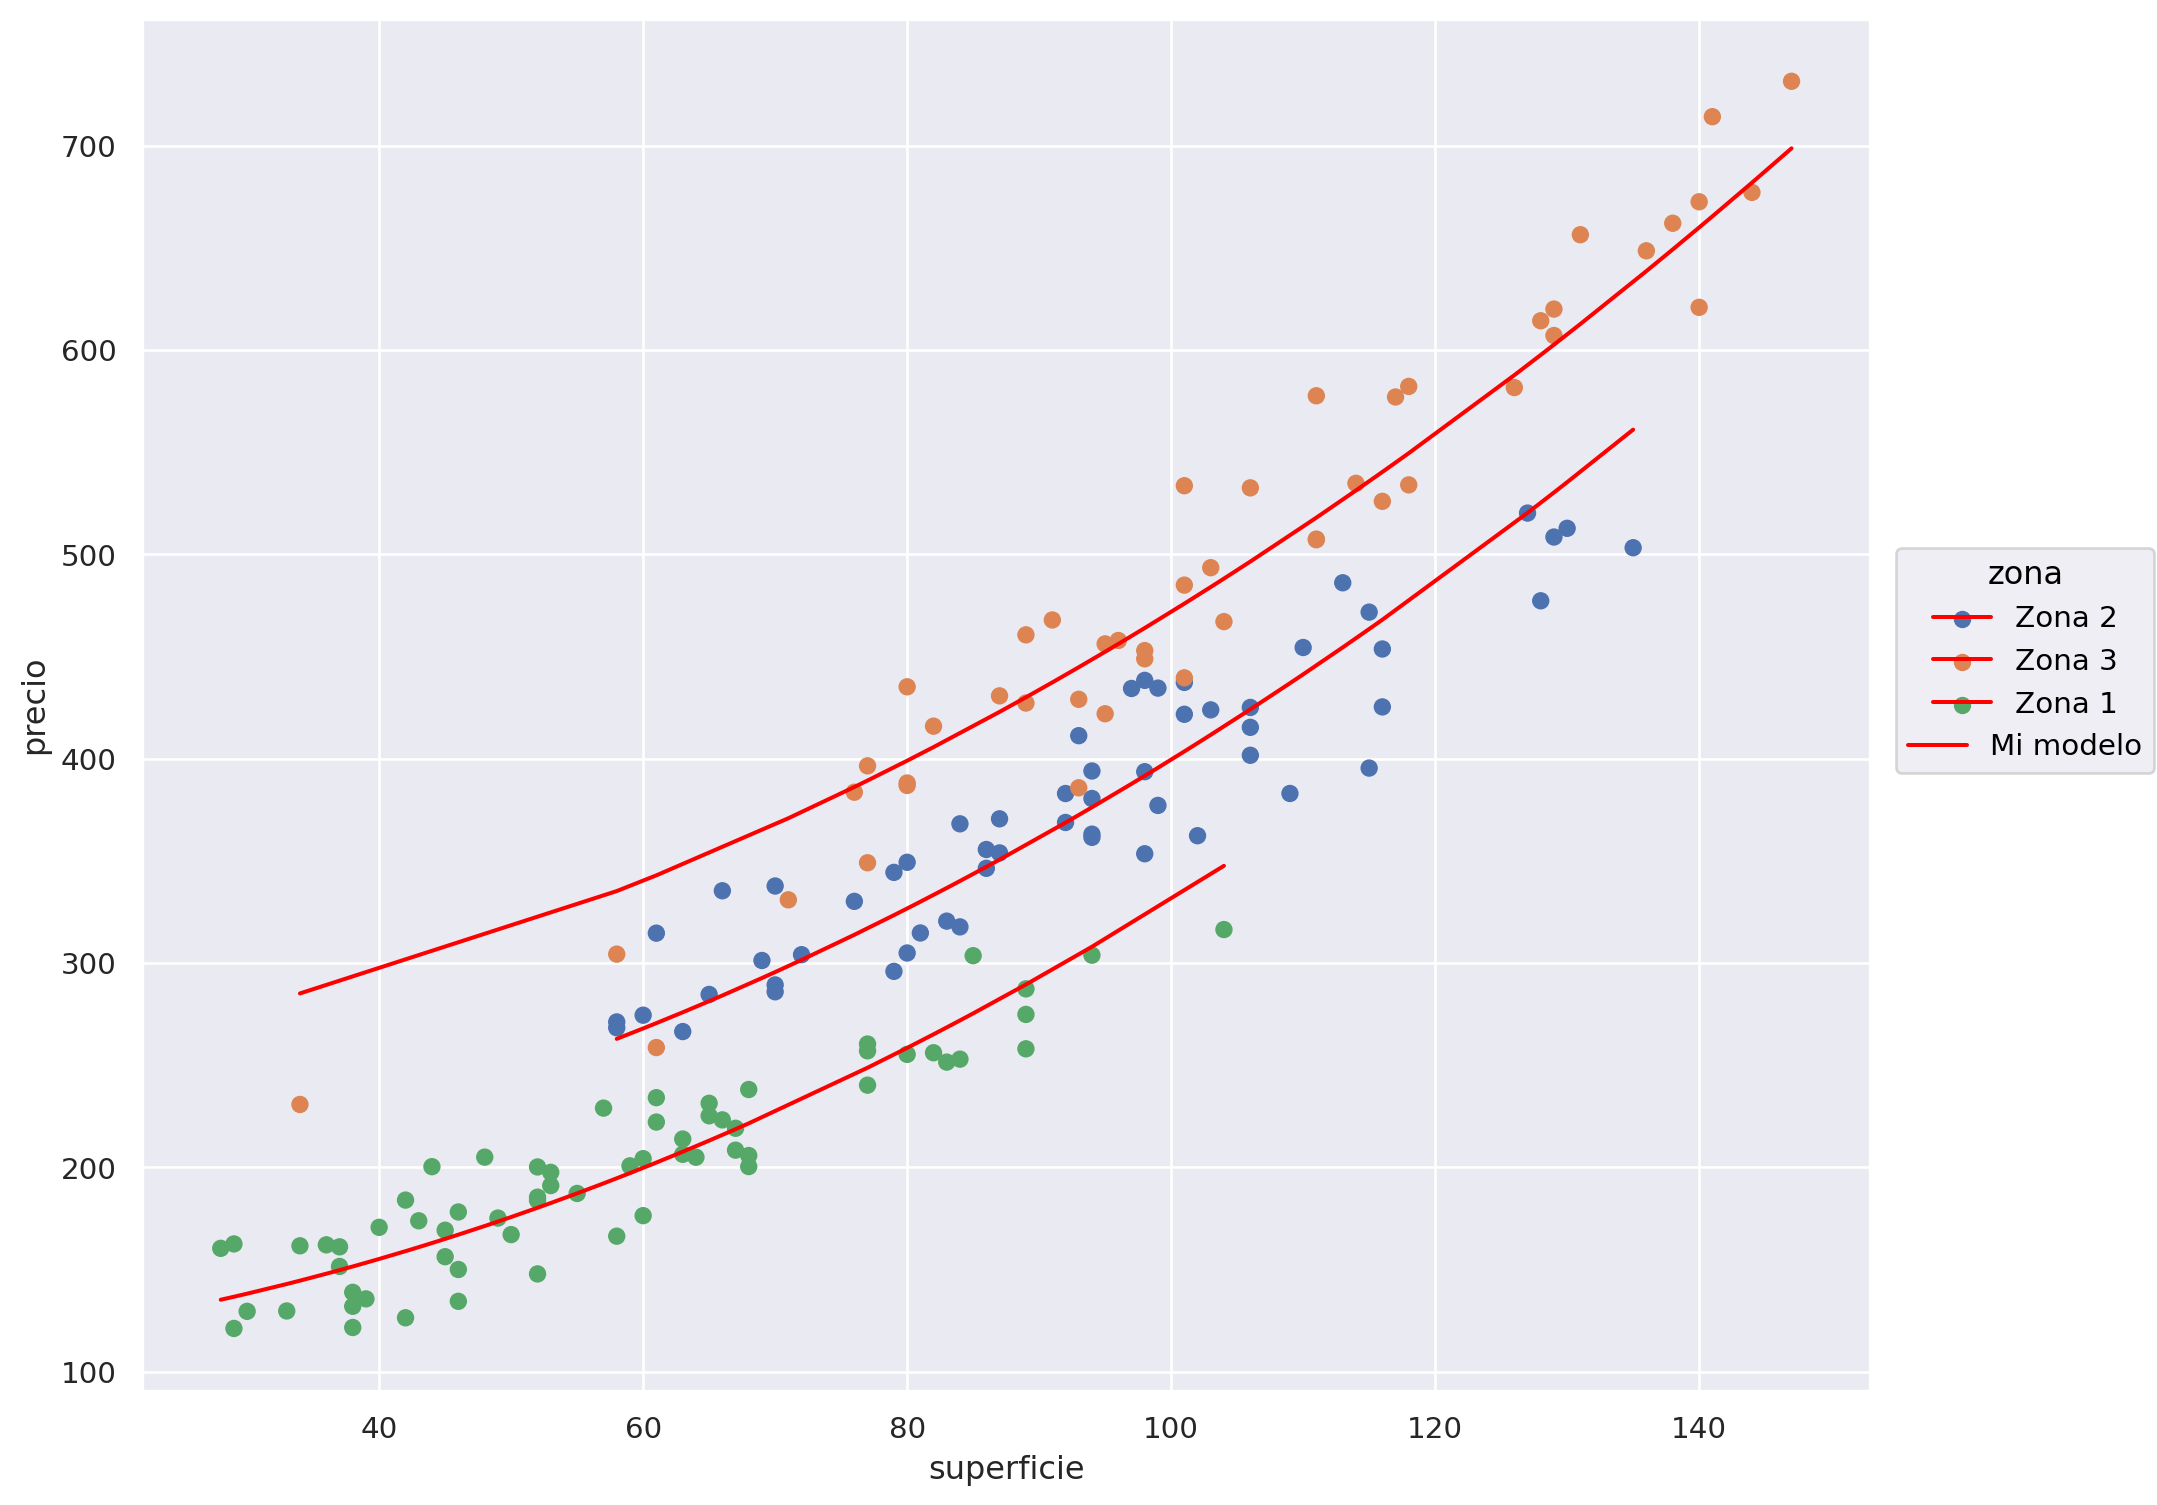

In [25]:
# Visualización de las predicciones
(
    so.Plot(data=inmuebles, x='superficie', y='precio')
    .add(so.Dot(), color='zona')
    # .add(so.Line(color='lime'), y=modelo1.predict(X1).flatten(), label='Modelo 1', color='zona')
    # .add(so.Line(color='blue'), y=modelo2.predict(X2).flatten(), label='Modelo 2', color='zona')
    .add(so.Line(color='red'), y=modelo3.predict(X3).flatten(), label='Mi modelo', color='zona')
    .layout(size=(10, 8))
)

### **NIVEL 2**: *Separación de los datos en `entrenamiento` y `testeo`*

#### **MODELO 1**: $\quad precio \sim superficie$

In [26]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie'
y1, X1 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X1_entrento, X1_test, y1_entrento, y1_test = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Hago el ajuste
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1_entrento, y1_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_test = modelo1.predict(X1_test)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_test = r2_score(y1_test, y1_predic_test)
# ECM
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_test = mean_squared_error(y1_test, y1_predic_test)
# RECM
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_test = np.sqrt(ecm_mod1_test)

# Resultados
print('Modelo 1: regresión lineal univariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod1_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_test*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo1.intercept_[0]}\nCoeficientes del modelo: \n{modelo1.feature_names_in_} \n{modelo1.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod1_test:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 1: regresión lineal univariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $50.217 de los valores reales.
El modelo explica el 88.124% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 57.025mm de los valores reales.
El modelo explica el 84.325% de la variabilidad en el precio del inmueble.

Intercepto real: -49.33503503908821
Coeficientes del modelo: 
['Intercept' 'superficie'] 
[[0.         4.70567868]]




$RECM = 57.025$


#### **MODELO 2**: $\quad precio \sim superficie + zona$

In [27]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie + zona'
y2, X2 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X2_entrento, X2_test, y2_entrento, y2_test = train_test_split(X2,y2, test_size=0.2, random_state=42)

# Hago el ajuste
modelo2 = linear_model.LinearRegression(fit_intercept = True) 
modelo2.fit(X2_entrento, y2_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y2_predic_entrento = modelo2.predict(X2_entrento)
y2_predic_test = modelo2.predict(X2_test)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod2_entrento = r2_score(y2_entrento, y2_predic_entrento)
r2_mod2_test = r2_score(y2_test, y2_predic_test)
# ECM
ecm_mod2_entrento = mean_squared_error(y2_entrento, y2_predic_entrento)
ecm_mod2_test = mean_squared_error(y2_test, y2_predic_test)
# RECM
recm_mod2_entrento = np.sqrt(ecm_mod2_entrento)
recm_mod2_test = np.sqrt(ecm_mod2_test)

# Resultados
print('Modelo 2: regresión lineal multivariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod2_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_test*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo2.intercept_[0]}\nCoeficientes del modelo: \n{modelo2.feature_names_in_} \n{modelo2.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod2_test:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 2: regresión lineal multivariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $27.066 de los valores reales.
El modelo explica el 96.55% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 40.013mm de los valores reales.
El modelo explica el 92.282% de la variabilidad en el precio del inmueble.

Intercepto real: 0.45744505788781
Coeficientes del modelo: 
['Intercept' 'superficie' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[  0.           3.42262062  58.99984427 147.5010829 ]]




$RECM = 40.013$


#### **MODELO 3**: $\quad precio \sim superficie^2 + zona$

In [30]:
# Formulo el modelo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona'
y3, X3 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles)
)

# Divido los datos en dos grupos: entrenamiento (80%) y testeo (20%)
X3_entrento, X3_test, y3_entrento, y3_test = train_test_split(X3,y3, test_size=0.2, random_state=42)

# Hago el ajuste
modelo3 = linear_model.LinearRegression(fit_intercept = True) 
modelo3.fit(X3_entrento, y3_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de testeo
y3_predic_entrento = modelo3.predict(X3_entrento)
y3_predic_test = modelo3.predict(X3_test)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod3_entrento = r2_score(y3_entrento, y3_predic_entrento)
r2_mod3_test = r2_score(y3_test, y3_predic_test)
# ECM
ecm_mod3_entrento = mean_squared_error(y3_entrento, y3_predic_entrento)
ecm_mod3_test = mean_squared_error(y3_test, y3_predic_test)
# RECM
recm_mod3_entrento = np.sqrt(ecm_mod3_entrento)
recm_mod3_test = np.sqrt(ecm_mod3_test)

# Resultados
print('Modelo 3: regresión polinómica multivariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod3_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de test)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod3_test, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_test*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo3.intercept_[0]}\nCoeficientes del modelo: \n{modelo3.feature_names_in_} \n{modelo3.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod3_test:.3f}$\n'
display(Markdown(medida_de_comparacion))

Modelo 3: regresión polinómica multivariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $23.223 de los valores reales.
El modelo explica el 97.46% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de test)
En promedio, las predicciones se desvían en 33.458mm de los valores reales.
El modelo explica el 94.604% de la variabilidad en el precio del inmueble.

Intercepto real: 105.25321210660496
Coeficientes del modelo: 
['Intercept' 'poly(superficie, 2, raw=True)[0]'
 'poly(superficie, 2, raw=True)[1]' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[0.00000000e+00 5.96619937e-01 1.61586448e-02 7.11021977e+01
  1.48327590e+02]]




$RECM = 33.458$


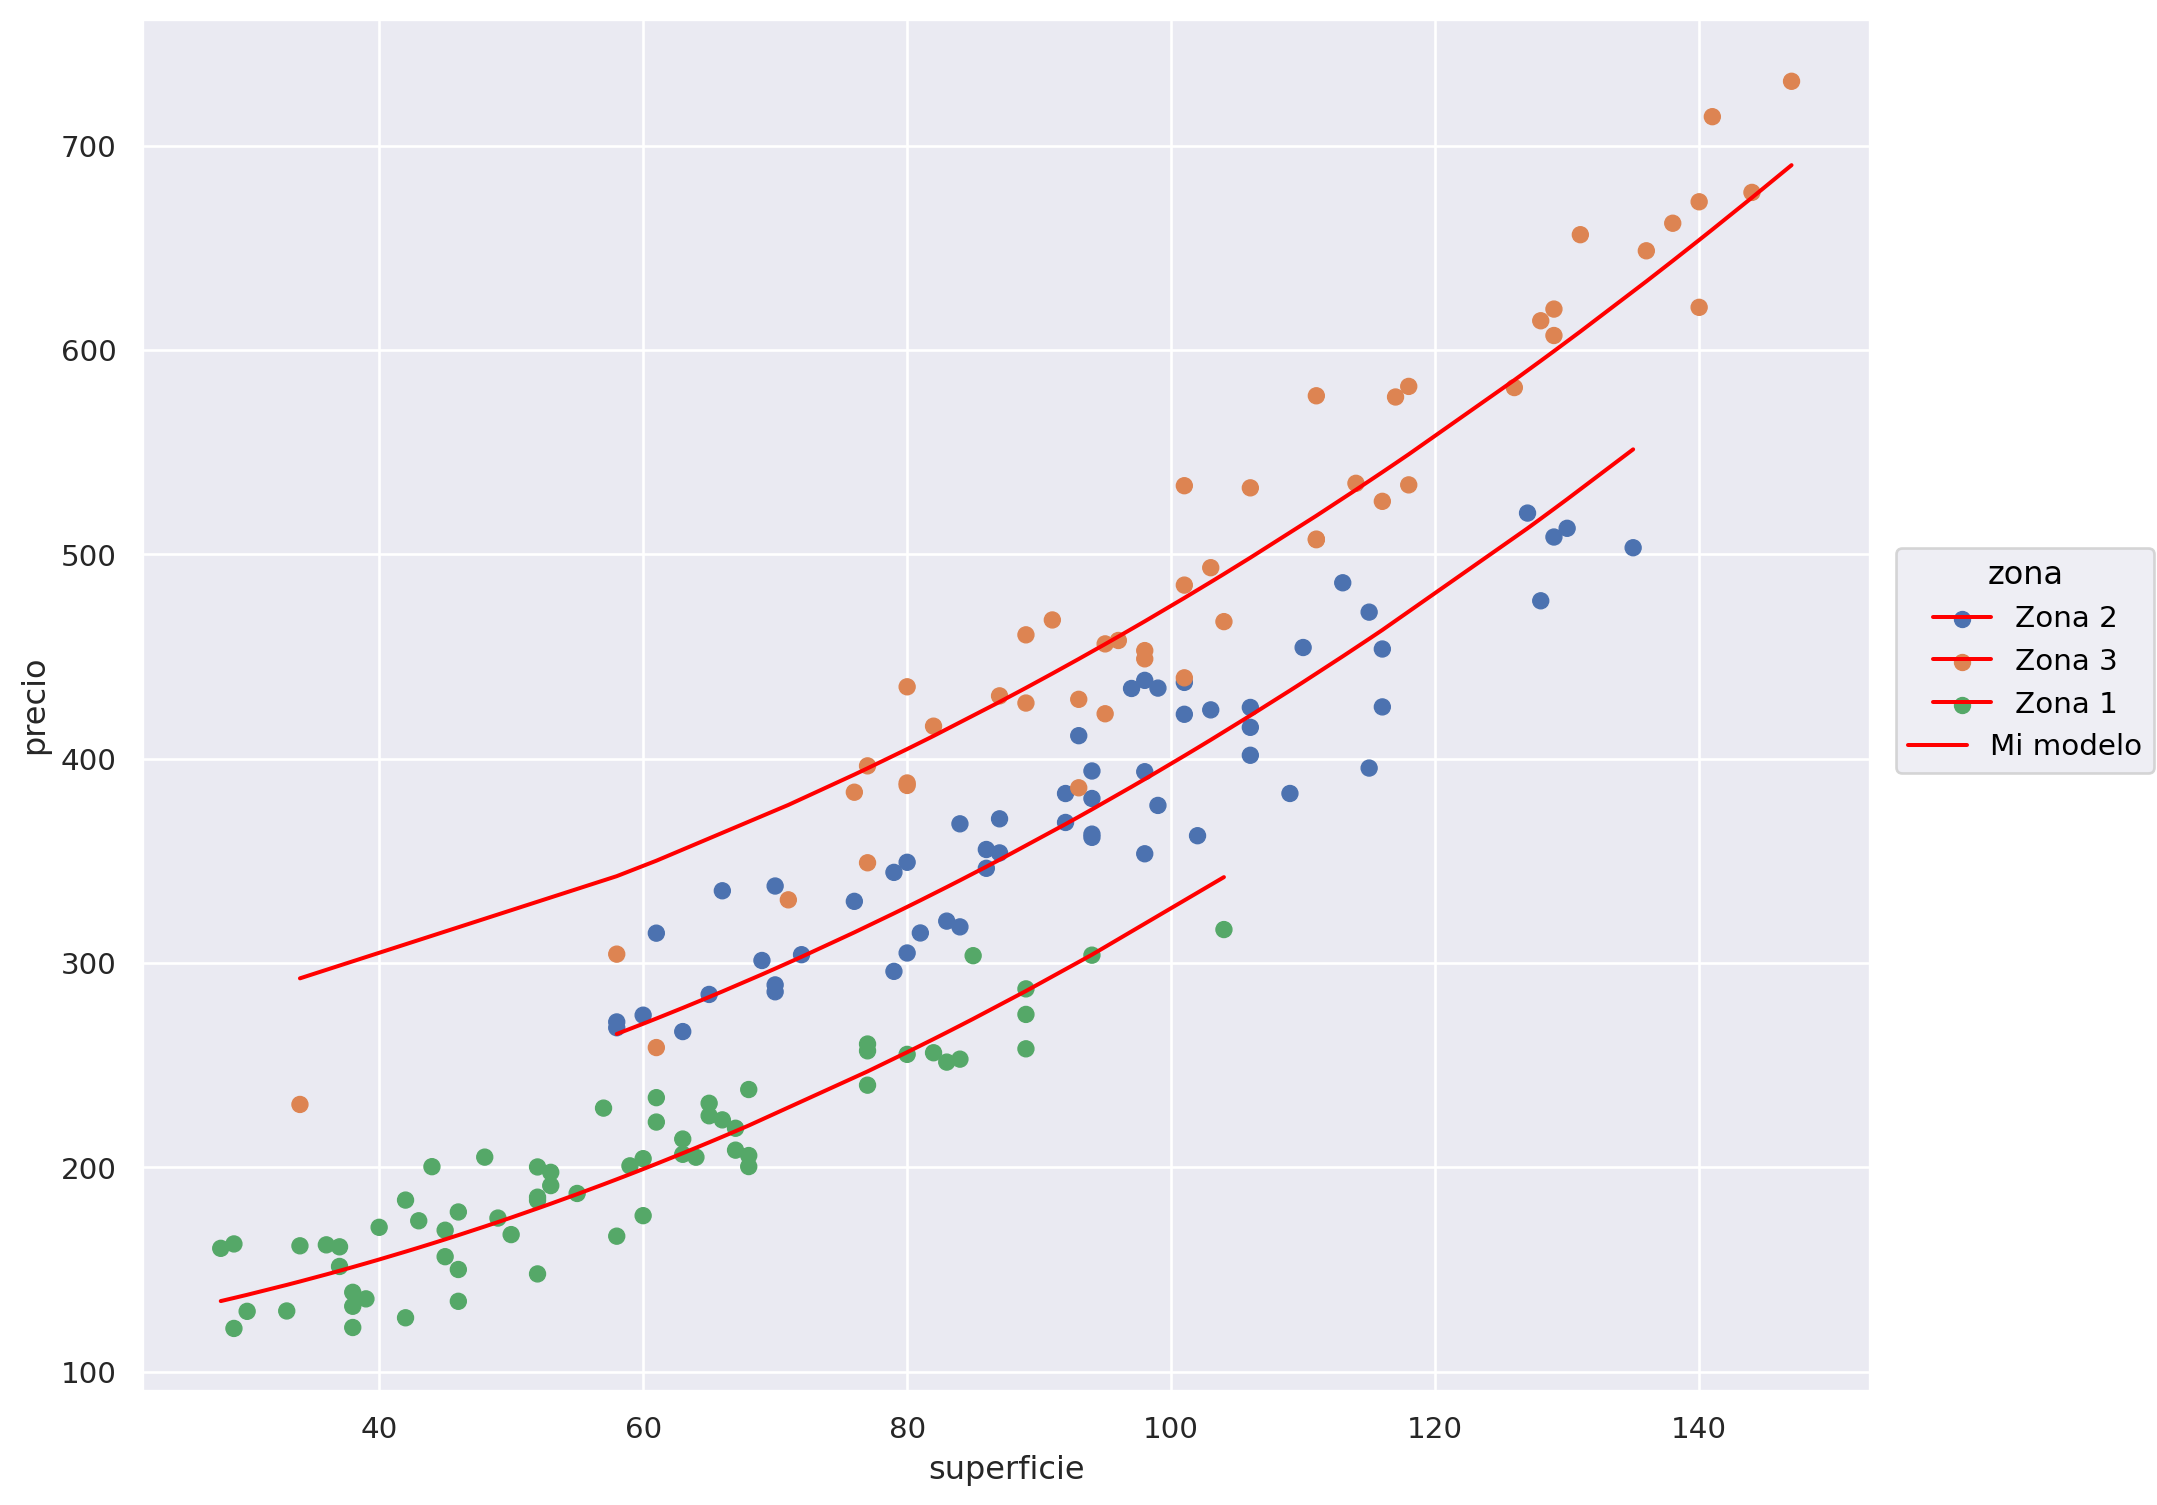

In [33]:
# Visualización de las predicciones
(
    so.Plot(data=inmuebles, x='superficie', y='precio')
    .add(so.Dot(), color='zona')
    # .add(so.Line(color='yellow'), y=modelo1.predict(X1).flatten(), label='Modelo 1', color='zona')
    # .add(so.Line(color='blue'), y=modelo2.predict(X2).flatten(), label='Modelo 2', color='zona')
    .add(so.Line(color='red'), y=modelo3.predict(X3).flatten(), label='Mi modelo', color='zona')
    .layout(size=(10, 8))
)

### **NIVEL 3**: *Separación de los datos en `entrenamiento`, `validación`, `testeo`*

In [34]:
# Separo el conjunto de los datos de inmuebles en dos: entrenamiento y testeo
# Trabajo sobre el conjunto de entrenamiento y una vez que obtenga el modelo con mejor desempeño 
# lo evalúo en el conjunto de testeo
inmuebles_entrento, inmuebles_testeo = train_test_split(inmuebles, test_size=0.2, random_state=42)
# display(inmuebles_entrento)
# display(inmuebles_testeo)

#### **MODELO 1**: $\quad precio \sim superficie$

In [35]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie'
y1, X1 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Divido los datos entrenamiento en dos grupos: entrenamiento (80%) y validación (20%)
X1_entrento, X1_val, y1_entrento, y1_val = train_test_split(X1,y1, test_size=0.2, random_state=42)

# Hago el ajuste
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1_entrento, y1_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de validación
y1_predic_entrento = modelo1.predict(X1_entrento)
y1_predic_val = modelo1.predict(X1_val)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod1_entrento = r2_score(y1_entrento, y1_predic_entrento)
r2_mod1_val = r2_score(y1_val, y1_predic_val)
# ECM
ecm_mod1_entrento = mean_squared_error(y1_entrento, y1_predic_entrento)
ecm_mod1_val = mean_squared_error(y1_val, y1_predic_val)
# RECM
recm_mod1_entrento = np.sqrt(ecm_mod1_entrento)
recm_mod1_val = np.sqrt(ecm_mod1_val)

# Resultados
print('Modelo 1: regresión lineal univariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod1_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de validación)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod1_val, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod1_val*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo1.intercept_[0]}\nCoeficientes del modelo: \n{modelo1.feature_names_in_} \n{modelo1.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod1_val:.5f}$\n\n$R^2 = {r2_mod1_val:.5f}$'
display(Markdown(medida_de_comparacion))

Modelo 1: regresión lineal univariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $49.323 de los valores reales.
El modelo explica el 88.708% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de validación)
En promedio, las predicciones se desvían en 53.825mm de los valores reales.
El modelo explica el 85.098% de la variabilidad en el precio del inmueble.

Intercepto real: -44.15900606371565
Coeficientes del modelo: 
['Intercept' 'superficie'] 
[[0.         4.66112419]]




$RECM = 53.82535$

$R^2 = 0.85098$

#### **MODELO 2**: $\quad precio \sim superficie + zona$

In [36]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie + zona'
y2, X2 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Divido los datos entrenamiento en dos grupos: entrenamiento (80%) y validación (20%)
X2_entrento, X2_val, y2_entrento, y2_val = train_test_split(X2,y2, test_size=0.2, random_state=42)

# Hago el ajuste
modelo2 = linear_model.LinearRegression(fit_intercept = True) 
modelo2.fit(X2_entrento, y2_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de validación
y2_predic_entrento = modelo2.predict(X2_entrento)
y2_predic_val = modelo2.predict(X2_val)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod2_entrento = r2_score(y2_entrento, y2_predic_entrento)
r2_mod2_val = r2_score(y2_val, y2_predic_val)
# ECM
ecm_mod2_entrento = mean_squared_error(y2_entrento, y2_predic_entrento)
ecm_mod2_val = mean_squared_error(y2_val, y2_predic_val)
# RECM
recm_mod2_entrento = np.sqrt(ecm_mod2_entrento)
recm_mod2_val = np.sqrt(ecm_mod2_val)

# Resultados
print('Modelo 2: regresión lineal multivariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod2_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de validación)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod2_val, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod2_val*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo2.intercept_[0]}\nCoeficientes del modelo: \n{modelo2.feature_names_in_} \n{modelo2.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod2_val:.5f}$\n\n$R^2 = {r2_mod2_val:.5f}$'
display(Markdown(medida_de_comparacion))

Modelo 2: regresión lineal multivariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $26.935 de los valores reales.
El modelo explica el 96.633% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de validación)
En promedio, las predicciones se desvían en 27.709mm de los valores reales.
El modelo explica el 96.051% de la variabilidad en el precio del inmueble.

Intercepto real: -1.15292944734324
Coeficientes del modelo: 
['Intercept' 'superficie' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[  0.           3.46509469  57.55340212 144.2616023 ]]




$RECM = 27.70904$

$R^2 = 0.96051$

#### **MODELO 3**: $\quad precio \sim superficie^2 + zona$

In [37]:
# Formulo el modelo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona'
y3, X3 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Divido los datos entrenamiento en dos grupos: entrenamiento (80%) y validación (20%)
X3_entrento, X3_val, y3_entrento, y3_val = train_test_split(X3,y3, test_size=0.2, random_state=42)

# Hago el ajuste
modelo3 = linear_model.LinearRegression(fit_intercept = True) 
modelo3.fit(X3_entrento, y3_entrento) 

# Calculo el error de predicción en los datos de entrenamiento y en los de validación
y3_predic_entrento = modelo3.predict(X3_entrento)
y3_predic_val = modelo3.predict(X3_val)

# Métricas del modelo
# Coeficientes de determinación (R2) 
r2_mod3_entrento = r2_score(y3_entrento, y3_predic_entrento)
r2_mod3_val = r2_score(y3_val, y3_predic_val)
# ECM
ecm_mod3_entrento = mean_squared_error(y3_entrento, y3_predic_entrento)
ecm_mod3_val = mean_squared_error(y3_val, y3_predic_val)
# RECM
recm_mod3_entrento = np.sqrt(ecm_mod3_entrento)
recm_mod3_val = np.sqrt(ecm_mod3_val)

# Resultados
print('Modelo 3: regresión polinómica multivariable\n')
print('AJUSTE (en el conjunto de entrenamiento)')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod3_entrento, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_entrento*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print('PREDICCIÓN (en el conjunto de validación)')
print(f'En promedio, las predicciones se desvían en {np.round(recm_mod3_val, 3)}mm de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_val*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo3.intercept_[0]}\nCoeficientes del modelo: \n{modelo3.feature_names_in_} \n{modelo3.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod3_val:.5f}$\n\n$R^2 = {r2_mod3_val:.5f}$'
display(Markdown(medida_de_comparacion))

Modelo 3: regresión polinómica multivariable

AJUSTE (en el conjunto de entrenamiento)
En promedio, las predicciones se desvían en $23.491 de los valores reales.
El modelo explica el 97.439% de la variabilidad en el precio del inmueble.

PREDICCIÓN (en el conjunto de validación)
En promedio, las predicciones se desvían en 22.286mm de los valores reales.
El modelo explica el 97.445% de la variabilidad en el precio del inmueble.

Intercepto real: 100.50480294515233
Coeficientes del modelo: 
['Intercept' 'poly(superficie, 2, raw=True)[0]'
 'poly(superficie, 2, raw=True)[1]' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[0.00000000e+00 7.30920277e-01 1.54283242e-02 7.04073865e+01
  1.45602648e+02]]




$RECM = 22.28602$

$R^2 = 0.97445$

In [38]:
# El modelo 3 es el que tuvo mejor desempeño, lo entreno sobre la unión de los datos
# de entrenamiento y validación, y lo evalúo sobre los datos de prueba
modelo3.fit(X3, y3) 

# Transformo el conjunto de testeo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona'  # El modelo es la fórmula, no los coeficientes
y_testeo, X_testeo = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_testeo)
)

# Hago la predicción
y_pred_testeo = modelo3.predict(X_testeo)

# Obtengo las métricas
r2_mod3_testeo = r2_score(y_testeo, y_pred_testeo)  # Coeficiente de determinación (R2) 
ecm_mod3_testeo = mean_squared_error(y_testeo, y_pred_testeo)  # ECM
recm_mod3_testeo = np.sqrt(ecm_mod3_testeo)  # RECM

# Resultados
print('Modelo 3: evaluación final sobre los datos de prueba\n')
print(f'En promedio, las predicciones se desvían en ${np.round(recm_mod3_testeo, 3)} de los valores reales.')
print(f'El modelo explica el {np.round(r2_mod3_testeo*100, 3)}% de la variabilidad en el precio del inmueble.\n')
print(f'Intercepto real: {modelo3.intercept_[0]}\nCoeficientes del modelo: \n{modelo3.feature_names_in_} \n{modelo3.coef_}\n')
medida_de_comparacion = f'\n$RECM = {recm_mod3_testeo:.5f}$\n\n$R^2 = {r2_mod3_testeo:.5f}$'
display(Markdown(medida_de_comparacion))

Modelo 3: evaluación final sobre los datos de prueba

En promedio, las predicciones se desvían en $33.458 de los valores reales.
El modelo explica el 94.604% de la variabilidad en el precio del inmueble.

Intercepto real: 105.25321210660496
Coeficientes del modelo: 
['Intercept' 'poly(superficie, 2, raw=True)[0]'
 'poly(superficie, 2, raw=True)[1]' 'zona[T.Zona 2]' 'zona[T.Zona 3]'] 
[[0.00000000e+00 5.96619937e-01 1.61586448e-02 7.11021977e+01
  1.48327590e+02]]




$RECM = 33.45762$

$R^2 = 0.94604$

### **NIVEL 4**: *Validación cruzada*

In [39]:
# Separo el total de los datos en dos conjuntos
inmuebles_entrento, inmuebles_testeo = train_test_split(inmuebles, test_size=0.2, random_state=42)
# Primero ajusto los modelos a los datos de entrenamiento con el método de validación cruzada de k-particiones
# Al modelo con mejor desempeño lo evalúo en los datos de testeo

#### **MODELO 1**: $\quad precio \sim superficie$

In [40]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie'
y1, X1 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Genero las particiones
validacion_cruzada = KFold(n_splits=6, random_state=42, shuffle=True)  # k = 6
subconjuntos = validacion_cruzada.split(X1)

# Inicializo el modelo
modelo1 = linear_model.LinearRegression(fit_intercept = False) 
# Aca voy a guardar los errores obtenidos en este arreglo de ceros de longitud k = 6 
recm_m1 = np.zeros(validacion_cruzada.get_n_splits()) 
pos = 0 # Contador que me permite ir almacenando los errores
# Al iterar sobre los subconjuntos (generadores) devuelven arreglos de enteros
# con los índices de los subconjuntos necesarios para la validación cruzada
for arr_indices_entrento, arr_indices_val in subconjuntos:
    # Obtengo los datos de cada subconjunto (dataframes)
    X1_entrento = X1.iloc[arr_indices_entrento]    
    y1_entrento = y1.iloc[arr_indices_entrento]
    X1_val = X1.iloc[arr_indices_val]
    y1_val = y1.iloc[arr_indices_val]
    # Hago el ajuste (calculo los coeficientes)
    modelo1.fit(X1_entrento, y1_entrento)
    # Hago la predicción
    y_pred = modelo1.predict(X1_val)
    recm_m1[pos] = np.sqrt(mean_squared_error(y1_val, y_pred))
    pos += 1

medida_de_comparacion = f'\n$RECM$ promedio del $modelo_1$ = ${recm_m1.mean():.5f}$'
display(Markdown(medida_de_comparacion))


$RECM$ promedio del $modelo_1$ = $50.13127$

#### **MODELO 2**: $\quad precio \sim superficie + zona$

In [41]:
# Formulo el modelo
formula_modelo = 'precio ~ superficie + zona'
y2, X2 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Genero las particiones
validacion_cruzada = KFold(n_splits=6, random_state=42, shuffle=True)  # k = 6
subconjuntos = validacion_cruzada.split(X2)

# Inicializo el modelo
modelo2 = linear_model.LinearRegression(fit_intercept = False) 
# Aca voy a guardar los errores obtenidos en este arreglo de ceros de longitud k = 6 
recm_m2 = np.zeros(validacion_cruzada.get_n_splits()) 
pos = 0 # Contador que me permite ir almacenando los errores
# Al iterar sobre los subconjuntos (generadores) devuelven arreglos de enteros
# con los índices de los subconjuntos necesarios para la validación cruzada
for arr_indices_entrento, arr_indices_val in subconjuntos:
    # Obtengo los datos de cada subconjunto (dataframes)
    X2_entrento = X2.iloc[arr_indices_entrento]    
    y2_entrento = y2.iloc[arr_indices_entrento]
    X2_val = X2.iloc[arr_indices_val]
    y2_val = y2.iloc[arr_indices_val]
    # Hago el ajuste (calculo los coeficientes)
    modelo2.fit(X2_entrento, y2_entrento)
    # Hago la predicción
    y_pred = modelo2.predict(X2_val)
    recm_m2[pos] = np.sqrt(mean_squared_error(y2_val, y_pred))
    pos += 1

medida_de_comparacion = f'\n$RECM$ promedio del $modelo_2$ = ${recm_m2.mean():.5f}$'
display(Markdown(medida_de_comparacion))


$RECM$ promedio del $modelo_2$ = $27.85039$

#### **MODELO 3**: $\quad precio \sim superficie^2 + zona$

In [42]:
# Formulo el modelo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona' 
y3, X3 = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_entrento)
)

# Genero las particiones
validacion_cruzada = KFold(n_splits=6, random_state=42, shuffle=True)  # k = 6
subconjuntos = validacion_cruzada.split(X3)

# Inicializo el modelo
modelo3 = linear_model.LinearRegression(fit_intercept = False) 
# Aca voy a guardar los errores obtenidos en este arreglo de ceros de longitud k = 6 
recm_m3 = np.zeros(validacion_cruzada.get_n_splits()) 
pos = 0 # Contador que me permite ir almacenando los errores
# Al iterar sobre los subconjuntos (generadores) devuelven arreglos de enteros
# con los índices de los subconjuntos necesarios para la validación cruzada
for arr_indices_entrento, arr_indices_val in subconjuntos:
    # Obtengo los datos de cada subconjunto (dataframes)
    X3_entrento = X3.iloc[arr_indices_entrento]    
    y3_entrento = y3.iloc[arr_indices_entrento]
    X3_val = X3.iloc[arr_indices_val]
    y3_val = y3.iloc[arr_indices_val]
    # Hago el ajuste (calculo los coeficientes)
    modelo3.fit(X3_entrento, y3_entrento)
    # Hago la predicción
    y_pred = modelo3.predict(X3_val)
    recm_m3[pos] = np.sqrt(mean_squared_error(y3_val, y_pred))
    pos += 1

medida_de_comparacion = f'\n$RECM$ promedio del $modelo_3$ = ${recm_m3.mean():.5f}$'
display(Markdown(medida_de_comparacion))


$RECM$ promedio del $modelo_3$ = $24.34344$

In [43]:
# El modelo3 mostró nuevamente tener el mejor desempeño (menor RECM en validación cruzada)

# Calculo los coeficientes sobre todo el conjunto de entrenamiento 
modelo3.fit(X3, y3)

# Evalúo como funciona sobre el conjunto de testeo
formula_modelo = 'precio ~ poly(superficie, 2, raw=True) + zona' 
y3_testeo, X3_testeo = ( 
    Formula(formula_modelo)
    .get_model_matrix(inmuebles_testeo)
)

# Hago la predicción
y_pred_testeo = modelo3.predict(X3_testeo)

# Bondad del ajuste (medidas del modelo)
r2_mod3 = r2_score(y3_testeo, y_pred_testeo)  # Coeficiente de determinación (R2) 
ecm_mod3 = mean_squared_error(y3_testeo, y_pred_testeo)  # ECM
recm_mod3 = np.sqrt(ecm_mod2)  # RECM
medida_de_comparacion = f'\n El $RECM$ del $modelo_3$ sobre los datos de prueba es ${recm_mod3:.5f}$ y el $R^2$ es ${r2_mod3}$'
display(Markdown(medida_de_comparacion))


 El $RECM$ del $modelo_3$ sobre los datos de prueba es $29.84818$ y el $R^2$ es $0.9460399390875764$

### Ejercicio 6: **Regresión Ridge**

In [44]:
ruta = Path(os.getcwd()) / 'recs' / 'credit.csv'
tdc = pd.read_csv(ruta)
print(f'Datos faltantes: {tdc.isnull().values.any()}')
tdc.head()

Datos faltantes: False


Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

**Regresión lineal**

In [45]:
# Formulo el modelo
variables_explicativas = " + ".join([c for c in tdc.columns if c != 'Balance'])
formula_modelo = f'Balance ~ {variables_explicativas}'
y1, X1 = Formula(formula_modelo).get_model_matrix(tdc)

# Separo los datos en entrenamiento y testeo
X1_entrento, X1_testeo, y1_entrento, y1_testeo = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Hago el ajuste
modelo1 = linear_model.LinearRegression(fit_intercept = True) 
modelo1.fit(X1_entrento, y1_entrento) 

# Calculo el error de predicción en los datos de testeo
y1_predic_testeo = modelo1.predict(X1_testeo)

# Métricas del modelo
r2_mod1_testeo = r2_score(y1_testeo, y1_predic_testeo)
ecm_mod1_testeo = mean_squared_error(y1_testeo, y1_predic_testeo)
recm_mod1_testeo = np.sqrt(ecm_mod1_testeo)
medida_de_comparacion = f'\n El $RECM$ del $modelo_1$ sobre los datos de testeo es ${recm_mod1_testeo:.5f}$ y el $R^2$ es ${r2_mod1_testeo}$'
display(Markdown(medida_de_comparacion))


 El $RECM$ del $modelo_1$ sobre los datos de testeo es $89.30205$ y el $R^2$ es $0.9522674050276403$

### **Regresión Ridge**

In [46]:
# Escalo las variables para que la penalización de los coeficientes más grandes sea equitativa y no afecte al modelo
# Extraigo las columnas numéricas, llevo a cero todas las medias y divido cada una por su varianza 
tdc_numericas = tdc.select_dtypes(include='number')
# display(tdc_numericas.head())
tdc_num_estandar = (tdc_numericas - tdc_numericas.mean()) / np.sqrt(tdc_numericas.var())  # Escalamiento estándar
# display(tdc_num_estandar.head())
tdc_categoricas = tdc.select_dtypes(include='object')
# display(tdc_categoricas.head())
tdc_estandar = pd.concat([tdc_num_estandar, tdc_categoricas], axis=1)
# display(tdc_estandar.head())
# sns.boxplot(tdc_estandar)  # Para chequear como quedaron

In [47]:
# Separo los datos en entrenamiento y testeo
tdc_est_entrento, tdc_est_testeo = train_test_split(tdc_estandar, test_size=0.2, random_state=42)

In [48]:
# Formulo el modelo
variables_explicativas = " + ".join([c for c in tdc_estandar.columns if c != 'Balance'])
formula_modelo = f'Balance ~ {variables_explicativas} - 1'  # Excluyo el intercepto de la penalización

# Construyo las matrices X2, y2 de entrenamiento
y2_entrento, X2_entrento = Formula(formula_modelo).get_model_matrix(tdc_est_entrento)

# Defino el vector de hiperparámetros alfa
alfas = np.array([0.001, 0.005, 0.01, 0.02, 0.1, 0.5, 1, 10, 100, 1000])
# Creo unas variables que se vayan actualizando en cada iteración
# para poder obtener automáticamente el alfa óptimo
alfa_optimo = alfas.max()
menor_recm = 1e3  # Tengo que adaptarlo según el caso 

# Para cada alfa, calculo por validación cruzada el RECM para obtener el valor óptimo
for contador, alfa in enumerate(alfas):
    # Genero las particiones
    validacion_cruzada = KFold(n_splits=6, random_state=42, shuffle=True)  # k = 6
    subconjuntos = validacion_cruzada.split(X2_entrento)
    
    # Inicializo el modelo de regresión lineal Ridge sin intercepto
    modelo_ridge = linear_model.Ridge(alpha=alfa, fit_intercept = False)
    recms = np.zeros(validacion_cruzada.get_n_splits())  # Guarda el error en cada partición
    pos = 0

    for arr_indices_entrento, arr_indices_val in subconjuntos:        
        # Obtengo los datos de cada subconjunto (dataframes)
        X_entrento = X2_entrento.iloc[arr_indices_entrento]    
        y_entrento = y2_entrento.iloc[arr_indices_entrento]
        X_val = X2_entrento.iloc[arr_indices_val]
        y_val = y2_entrento.iloc[arr_indices_val]
        # Hago el ajuste (calculo los coeficientes)
        modelo_ridge.fit(X_entrento, y_entrento)
        # Hago la predicción
        y_pred = modelo_ridge.predict(X_val)
        recms[pos] = np.sqrt(mean_squared_error(y_val, y_pred))
        pos += 1
    # Obtengo automáticamente el alfa óptimo    
    error_promedio = recms.mean()
    if error_promedio <= menor_recm:
        menor_recm = error_promedio
        alfa_optimo = alfa
    # print(f"Para alfa = {alfa:.5f} el Error Cuadrático Medio es : {recms.mean():.5f}")
print(f'Alfa óptimo = {alfa_optimo}, menor RECM = {menor_recm}')

Alfa óptimo = 0.02, menor RECM = 0.22667759848509503


In [49]:
# Pruebo en algunos valores cercanos al alfa óptimo a ver si mejora un poco

# Defino el vector de hiperparámetros alfa
alfas = np.array([0.0095, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, ])
# Creo unas variables que se vayan actualizando en cada iteración
# para poder obtener automáticamente el alfa óptimo
alfa_optimo = alfas.max()
menor_recm = 1e3  # Tengo que adaptarlo según el caso 

# Para cada alfa, calculo por validación cruzada el RECM para obtener el valor óptimo
for contador, alfa in enumerate(alfas):
    # Genero las particiones
    validacion_cruzada = KFold(n_splits=6, random_state=42, shuffle=True)  # k = 6
    subconjuntos = validacion_cruzada.split(X2_entrento)
    
    # Inicializo el modelo de regresión lineal Ridge sin intercepto
    modelo_ridge = linear_model.Ridge(alpha=alfa, fit_intercept = False)
    recms = np.zeros(validacion_cruzada.get_n_splits())  # Guarda el error en cada partición
    pos = 0

    for arr_indices_entrento, arr_indices_val in subconjuntos:        
        # Obtengo los datos de cada subconjunto (dataframes)
        X_entrento = X2_entrento.iloc[arr_indices_entrento]    
        y_entrento = y2_entrento.iloc[arr_indices_entrento]
        X_val = X2_entrento.iloc[arr_indices_val]
        y_val = y2_entrento.iloc[arr_indices_val]
        # Hago el ajuste (calculo los coeficientes)
        modelo_ridge.fit(X_entrento, y_entrento)
        # Hago la predicción
        y_pred = modelo_ridge.predict(X_val)
        recms[pos] = np.sqrt(mean_squared_error(y_val, y_pred))
        pos += 1
    # Obtengo automáticamente el alfa óptimo    
    error_promedio = recms.mean()
    if error_promedio <= menor_recm:
        menor_recm = error_promedio
        alfa_optimo = alfa
    # print(f"Para alfa = {alfa:.5f} el Error Cuadrático Medio es : {recms.mean():.5f}")
print(f'Alfa óptimo definitivo = {alfa_optimo}, menor RECM = {menor_recm}')

Alfa óptimo definitivo = 0.02, menor RECM = 0.22667759848509503


In [50]:
# Una vez que mejoré el alfa óptimo, recalculo los coeficientes de la regresión sobre los datos de entrenamiento
alfa_optimo = 0.65
modelo_ridge = linear_model.Ridge(alpha=alfa_optimo, fit_intercept = False)
modelo_ridge.fit(X2_entrento, y2_entrento)  # El total de los datos de entrenamiento (instanciados dos celdas más arriba a partir de tdc_est_entrento)

# Formulo el modelo y construyo las matrices para los datos de testeo
variables_explicativas = " + ".join([c for c in tdc_estandar.columns if c != 'Balance'])
formula_modelo = f'Balance ~ {variables_explicativas} - 1'
y2_testeo, X2_testeo = Formula(formula_modelo).get_model_matrix(tdc_est_testeo)

# Hago la predicción
y2_predic_testeo = modelo_ridge.predict(X2_testeo)

# Métricas del modelo
r2_mod2_alfa_optimo = r2_score(y2_testeo, y2_predic_testeo)
ecm_mod2_alfa_optimo = mean_squared_error(y2_testeo, y2_predic_testeo)
recm_alfa_optimo = np.sqrt(ecm_mod2_alfa_optimo)
medida_de_comparacion = f'\n El $RECM$ del modelo $Ridge$ sobre los datos de testeo es ${recm_alfa_optimo:.5f}$ y el $R^2$ es ${r2_mod2_alfa_optimo}$'
display(Markdown(medida_de_comparacion))


 El $RECM$ del modelo $Ridge$ sobre los datos de testeo es $0.19565$ y el $R^2$ es $0.951568271020488$

In [51]:
# Comparo los resultados
print(f'R2 modelo1: {r2_mod1_testeo} \nR2 modelo Ridge: {r2_mod2_alfa_optimo}')
print(f'Mejoró el R2 con la regresión Ridge: {r2_mod1_testeo > r2_mod2_alfa_optimo}')

R2 modelo1: 0.9522674050276403 
R2 modelo Ridge: 0.951568271020488
Mejoró el R2 con la regresión Ridge: True


## **Ejercicios Práctica 8**: *Clustering y clasificación*

### **Algoritmo *k-medias*** 

(1)  **Definir la cantidad de grupos que existen en los datos y asignar un centro inicial para cada grupo:** esto puede hacerse arbitrariamente, a partir de conocimiento previo o tomando $k$ puntos aleatorios dentro del conjunto y considerándolos un posible centro.

(2) **Calcular la distancia de cada punto a cada centro:** usar la norma de la diferencia entre el punto de dato y cada centroide.


(3) **Identificar con una etiqueta el grupo de pertenencia de cada punto:** comparar las distancias de cada punto a cada uno de los centroides y asignarle la etiqueta del más cercano.

(4) **Calcular los centroides de cada grupo:** los nuevos centros se obtienen calculando el promedio de los valores en cada uno de los grupos.

Es una **técnica de aprendizaje no supervisado**. La idea es minimizar, en cada iteración, la distancia de cada punto al centroide asignado. Se puede utilizar como **criterio de parada** que la etiqueta de los puntos no cambie. 


In [111]:
def impl_kmedias(k:int, datos:np.ndarray, iter_max=1000) -> tuple[np.ndarray, np.ndarray]: 
    """
    Recibe un entero indicando la cantidad de etiquetas a asignar,
    una matriz de nx2 dimensiones y una cantidad de iteraciones máxima
    opcional. Retorna una matriz de nx3 con la etiqueta correspondiente 
    al grupo de pertenencia de cada dato y los centros calculados.
    """
    # Defino como centros iniciales k puntos aleatorios
    centros = datos[np.random.choice(datos.shape[0], k, replace=False)]
    # Variable y contador necesarios para el criterio de parada
    etiquetas_anteriores = np.zeros(len(datos))
    
    j=0
    
    for i in range(iter_max):
        # Con broadcasting, newaxis crea una dimensión intermedia que actúa como un "puente" 
        # para que la resta con centros se calcule elemento a elemento 
        # (para todas las combinaciones de puntos y centros)
        dist_centros = np.linalg.norm(datos[:, np.newaxis] - centros, axis=2)
        
        # Asigno las etiquetas
        etiquetas = np.argmin(dist_centros, axis = 1)

        # Corto cuando no se actulizan mas las etiquetas
        if np.array_equal(etiquetas, etiquetas_anteriores):
            break

        # Calculo los nuevos centros
        centros = np.array([datos[etiquetas == i].mean(axis=0) for i in range(k)])
        etiquetas_anteriores
        j = i

    # Agrego la columna con la etiqueta correspondiente a cada dato
    res = np.column_stack((datos, etiquetas))
    
    return res, centros, j

Convergió en 99 iteraciones


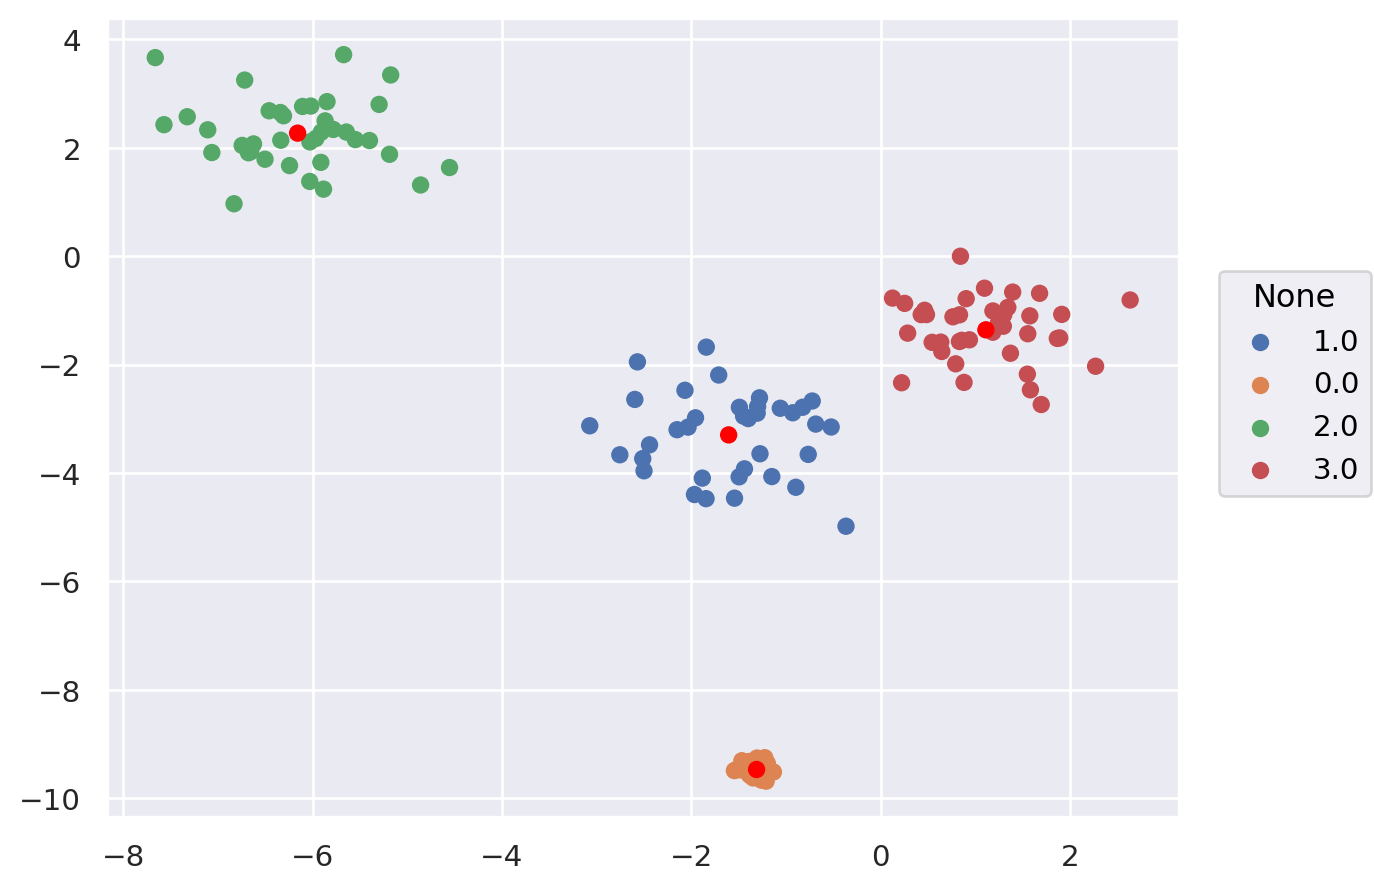

In [98]:
# Pruebas
import random

grupos = 4

# matriz = np.random.rand(50, 2)
matriz, etqs = make_blobs(
    n_samples=150, 
    centers=grupos, 
    cluster_std=np.round(np.random.random(grupos),1), 
    random_state=random.randint(0, len(matriz))
)

res = impl_kmedias(grupos, matriz)

print(f'Convergió en {res[2]} iteraciones')

(
    so.Plot(x=res[0][:,0], y=res[0][:,1])
    .add(so.Dot(), color=pd.Series(res[0][:,2].astype("str")) )
    .add(so.Dot(color='red'), x=res[1][:,0], y=res[1][:,1])
)

### Implementacion con `sklearn`

In [110]:
# Datos de prueba
nro_grupos = 5
datos, grupos = make_blobs(
    n_samples=150, 
    centers=nro_grupos, 
    cluster_std=np.round(np.random.random(nro_grupos),1), 
    random_state=random.randint(0, len(matriz))
)

# Efectúa en dos líneas toda la implementación anterior
kmedias = KMeans(n_clusters=nro_grupos)
etiquetas = kmedias.fit_predict(datos)

# Visualizo
(
    so.Plot(x = datos[:,0], y =  datos[:,1], color = etiquetas.astype(str), marker = grupos)
    .add(so.Dot(pointsize = 8))
    #.add(so.Dots(color = "red", pointsize= 10), x = centros[:,0], y = centros[:,1])
)


### Ejercicio 1

#### a), b)

In [123]:
datos = np.array([[-1,2],[0,1],[1,2],[8/5,2],[2,1],[3,2],[4,1]])

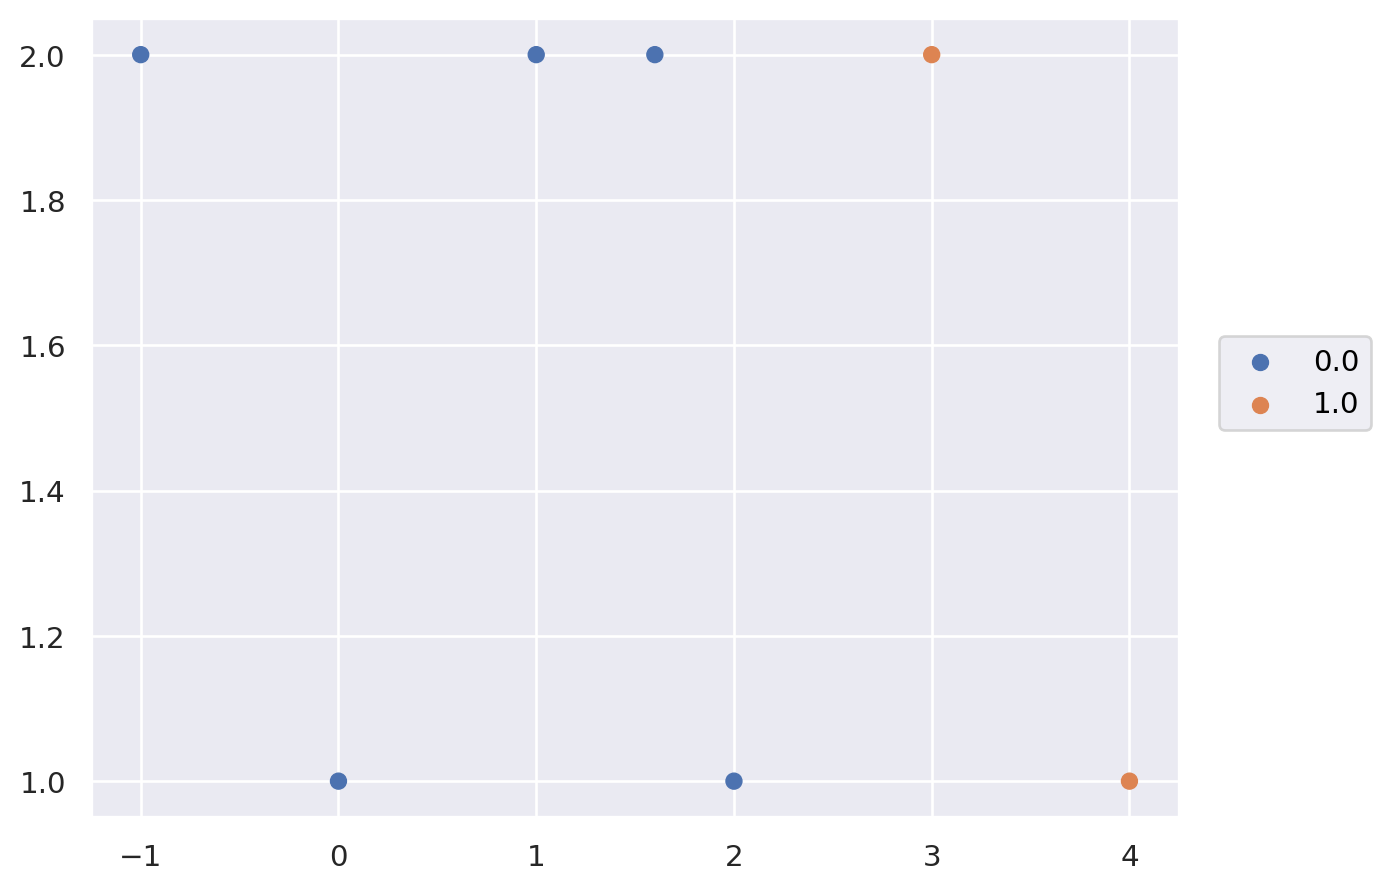

In [122]:
# centros  b1 = (1, 2) y b2 = (3, 2)
distancias = np.zeros((len(datos), 2))
distancias[:,0] = np.linalg.norm(datos - np.array([[1,2]]), axis=1)
distancias[:,1] = np.linalg.norm(datos - np.array([[3,2]]), axis=1)

etiquetas = np.argmin(distancias, axis = 1)
datos1 = np.column_stack((datos, etiquetas))
(
    so.Plot(x=datos1[:,0], y=datos[:,1])
    .add(so.Dot(), color=datos1[:,2].astype('str'))     
)

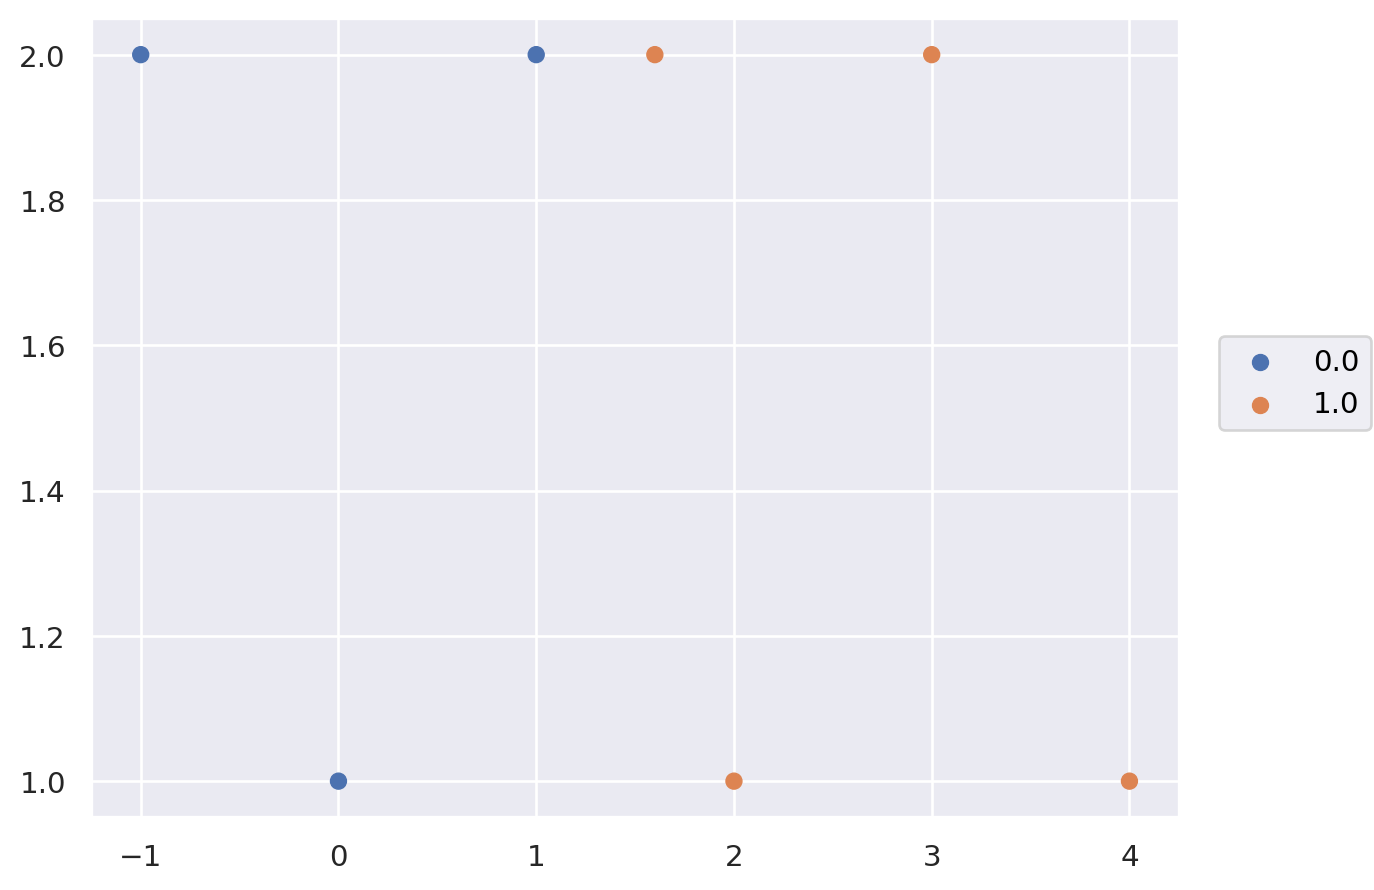

In [124]:
# centros  b1 = (0,1) y b2 = (3, 2)
distancias = np.zeros((len(datos), 2))
distancias[:,0] = np.linalg.norm(datos - np.array([[0,1]]), axis=1)
distancias[:,1] = np.linalg.norm(datos - np.array([[3,2]]), axis=1)

etiquetas = np.argmin(distancias, axis = 1)
datos1 = np.column_stack((datos, etiquetas))
(
    so.Plot(x=datos1[:,0], y=datos[:,1])
    .add(so.Dot(), color=datos1[:,2].astype('str'))     
)

### Ejercicio 2

#### a), b)

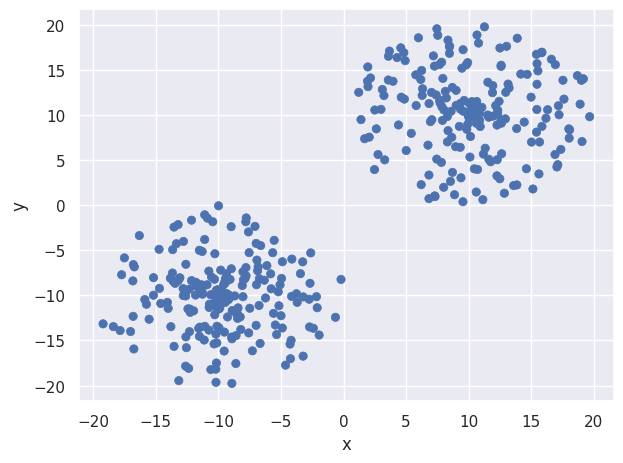

In [132]:
import os
from pathlib import Path

# Cargo los datos
ruta1 = Path(os.getcwd()) / 'recs' / 'p7-data1.csv' 
ruta2 = Path(os.getcwd()) / 'recs' / 'p7-data2.csv'
d1 = pd.read_csv(ruta1)
d2 = pd.read_csv(ruta2)
# Creo los gráficos
d1_vis = so.Plot(data=d1, x=d1.x, y=d1.y).add(so.Dot())
d2_vis = so.Plot(data=d2, x=d2.x, y=d2.y).add(so.Dot())
# Visualizo
d1_vis.show()
d2_vis.show()

#### c)

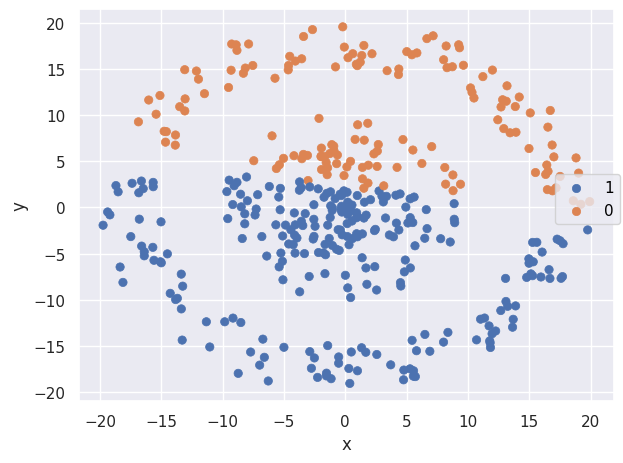

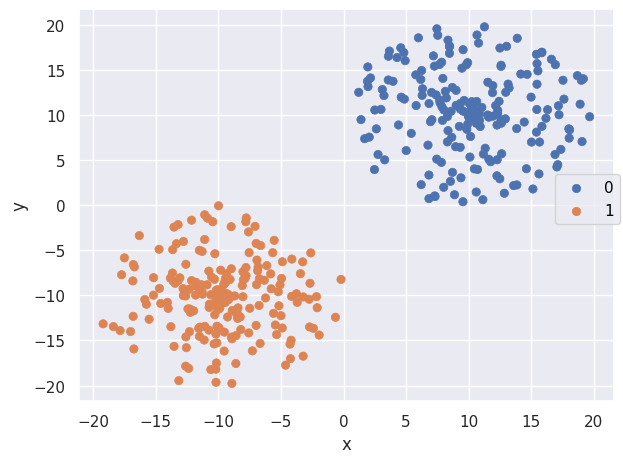

In [137]:
# Instancio la implementación de K-medias de sklearn
impl_kmedias = KMeans(n_clusters=2)
# Obtengo las clasificaciones
etiquetas_d1 = impl_kmedias.fit_predict(d1)
etiquetas_d2 = impl_kmedias.fit_predict(d2)

# Creo los gráficos
d1_kmedias_vis = (
    so.Plot(data=d1, x=d1.x, y=d1.y, color=etiquetas_d1.astype('str'))
    .add(so.Dot())
)
d2_kmedias_vis = (
    so.Plot(data=d2, x=d2.x, y=d2.y, color=etiquetas_d2.astype('str'))
    .add(so.Dot())
)

# Visualizo
d1_kmedias_vis.show()  # El algoritmo no funciona bien en cluster no esféricos e isotrópicos 
d2_kmedias_vis.show()  # El algoritmo funciona bien

### Ejercicio 3

#### a), b)

LongSepalo  AnchoSepalo  LongPetalo  AnchoPetalo
0         5.1          3.5         1.4          0.2
1         4.9          3.0         1.4          0.2
2         4.7          3.2         1.3          0.2
3         4.6          3.1         1.5          0.2
4         5.0          3.6         1.4          0.2

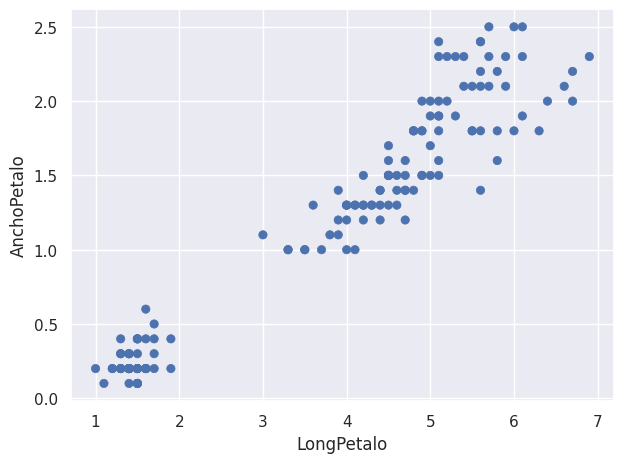

In [140]:
import os
from pathlib import Path

# Cargo los datos
ruta_iris = Path(os.getcwd()) / 'recs' / 'p7-iris.txt' 
iris = pd.read_csv(ruta_iris, sep='\t')
display(iris.head())

# Creo los gráficos
iris_vis1 = so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo').add(so.Dot())

# Visualizo
iris_vis1.show()


#### c), d)

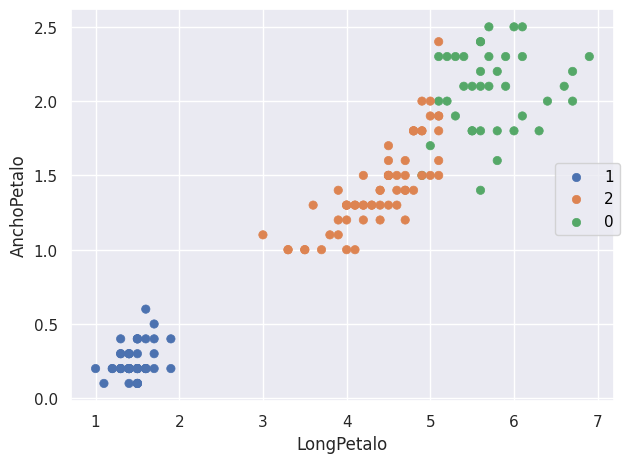

In [142]:
# Instancio la implementación de K-medias de sklearn
impl_kmedias = KMeans(n_clusters=3)
# Obtengo las clasificaciones
etiquetas_iris = impl_kmedias.fit_predict(iris)

# Creo los gráficos
iris_kmedias_vis = (
    so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo', color=etiquetas_iris.astype('str'))
    .add(so.Dot())  
)

# Visualizo
iris_kmedias_vis.show()


#### e), f)

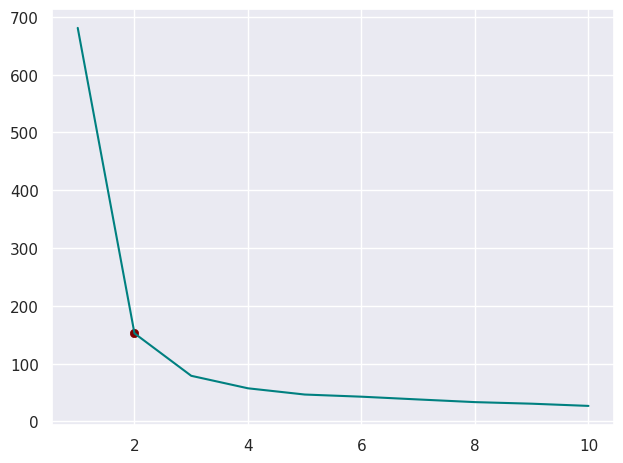

In [162]:
errores_de_agrupamiento = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    cluster = kmeans.fit_predict(iris)
    errores_de_agrupamiento.append(kmeans.inertia_) # Agrego la suma de cuadrados de cada cluster (WCSS)

# Grafico para detectar en que valor de k se da el "codo"
eda_vis = (
    so.Plot(x=range(1,11), y=errores_de_agrupamiento)
    .add(so.Line(color='teal'))
    .add(so.Dot(color='maroon'), x=[2], y=errores_de_agrupamiento[1]) # En k=2 la curva deja de caer abruptamente

) 

eda_vis.show()


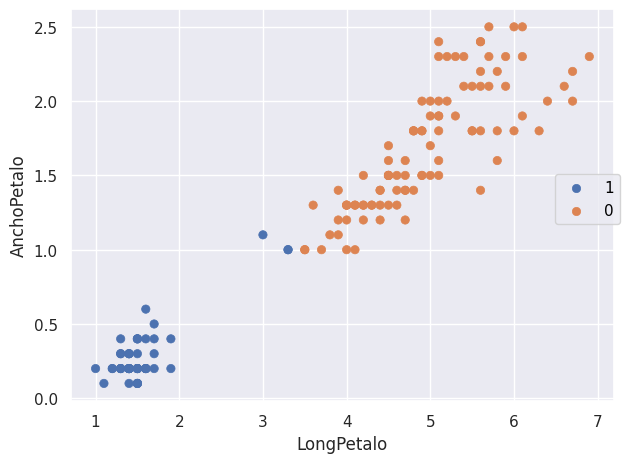

In [168]:
# Instancio la implementación de K-medias de sklearn
impl_kmedias = KMeans(n_clusters=2)
# Obtengo las clasificaciones
etiquetas_iris = impl_kmedias.fit_predict(iris)

# Creo los gráficos
iris_kmedias_vis = (
    so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo', color=etiquetas_iris.astype('str'))
    .add(so.Dot())  
)

# Visualizo
iris_kmedias_vis.show()


### Ejercicio 4

#### a)

x           y
0  0.002501  6488.26703
1 -0.026980  2521.94722
2 -0.029001  3068.77291
3  0.007030  4314.27482
4 -0.025356  2384.49945

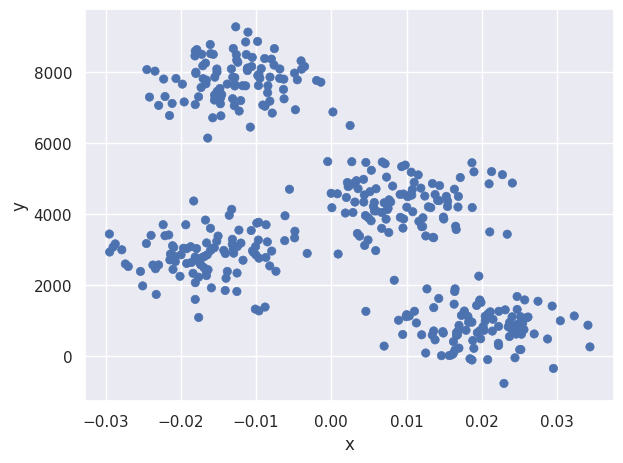

In [174]:
import os
from pathlib import Path

# Cargo los datos
ruta = Path(os.getcwd()) / 'recs' / 'p7-dataSinEscalar.csv' 
dse = pd.read_csv(ruta).rename(columns={' y':'y'})
display(dse.head())

# Creo los gráficos
dse_vis1 = so.Plot(data=dse, x='x', y='y').add(so.Dot())

# Visualizo
dse_vis1.show()


#### b), c), d)

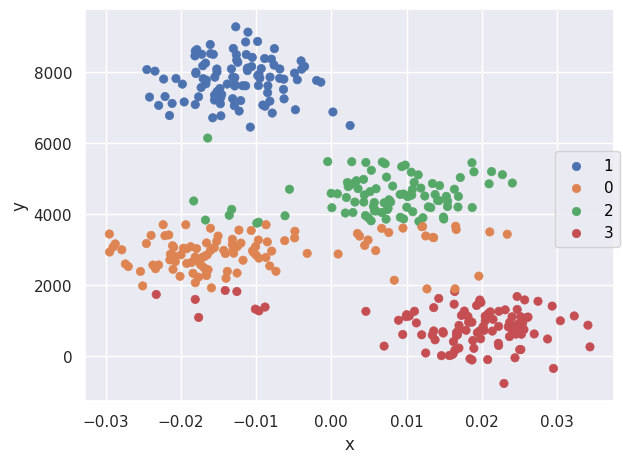

In [175]:
# Se ven claramente 4 grupos, trato de agruparlos con kmedias

# Instancio la implementación de K-medias de sklearn
impl_kmedias = KMeans(n_clusters=4)
# Obtengo las clasificaciones
etiquetas_dse = impl_kmedias.fit_predict(dse)

# Creo los gráficos
dse_kmedias_vis = (
    so.Plot(data=dse, x='x', y='y', color=etiquetas_dse.astype('str'))
    .add(so.Dot())  
)

# Visualizo
dse_kmedias_vis.show()  # El algoritmo no funcionó muy bien

#### e), f)

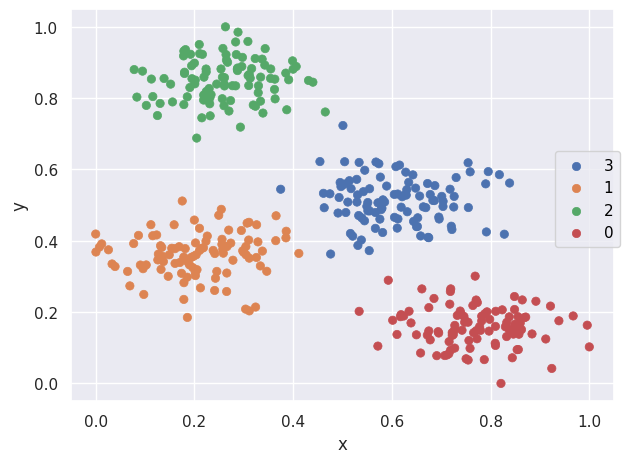

In [179]:
# Instancio el escalador de datos y le indico que devuelva un DataFrame
escalador = MinMaxScaler().set_output(transform='pandas')  

# Calculo los coeficientes y escalo las variables
datos_escalados = escalador.fit_transform(dse)
datos_escalados.head()

# Instancio la implementación de K-medias de sklearn
impl_kmedias = KMeans(n_clusters=4)
# Obtengo las clasificaciones
etiquetas_de = impl_kmedias.fit_predict(datos_escalados)

# Creo los gráficos
de_kmedias_vis = (
    so.Plot(data=datos_escalados, x='x', y='y', color=etiquetas_de.astype('str'))
    .add(so.Dot())  
)

# Visualizo
de_kmedias_vis.show()  # Escalando los datos funcionó mucho mejor!

### **Algoritmo *DBSCAN***

#### Idea general
Es una **técnica de aprendizaje no supervisado**. Los *clusters* son **regiones densas en el espacio** de datos y están separados entre sí por **regiones de baja densidad** de puntos de datos. 

- Depende de un **radio** $\epsilon$ y un valor $\nu$ que indica la **cantidad mínima de puntos cercanos**, necesaria para considerar a un punto como **central**. 

- Cada grupo correspondiente a un **punto central** $p$ está formado por todos los puntos **alcanzables** desde $p$: por todos los puntos $q$ que están a menos de $\epsilon$ de $p$ y todos los puntos que están a menos de $\epsilon$ de aquellos $q$ que tienen al menos $\nu$ puntos en su vecindad. 

#### Proceso
**(1)** Identificar un punto central $p$ que no pertenezca a ningún grupo.

**(2)** Agregar al grupo todos los puntos $q$ directamente alcanzables desde $p$.

**(3)** Si se agregaron puntos centrales nuevos al grupo, agregar al grupo a todos los puntos alcanzables desde los nuevos puntos centrales.

**(4)** Repetir el paso anterior hasta que no se agreguen nuevos puntos.

**(5)** Repetir hasta que no queden puntos sin asignar.

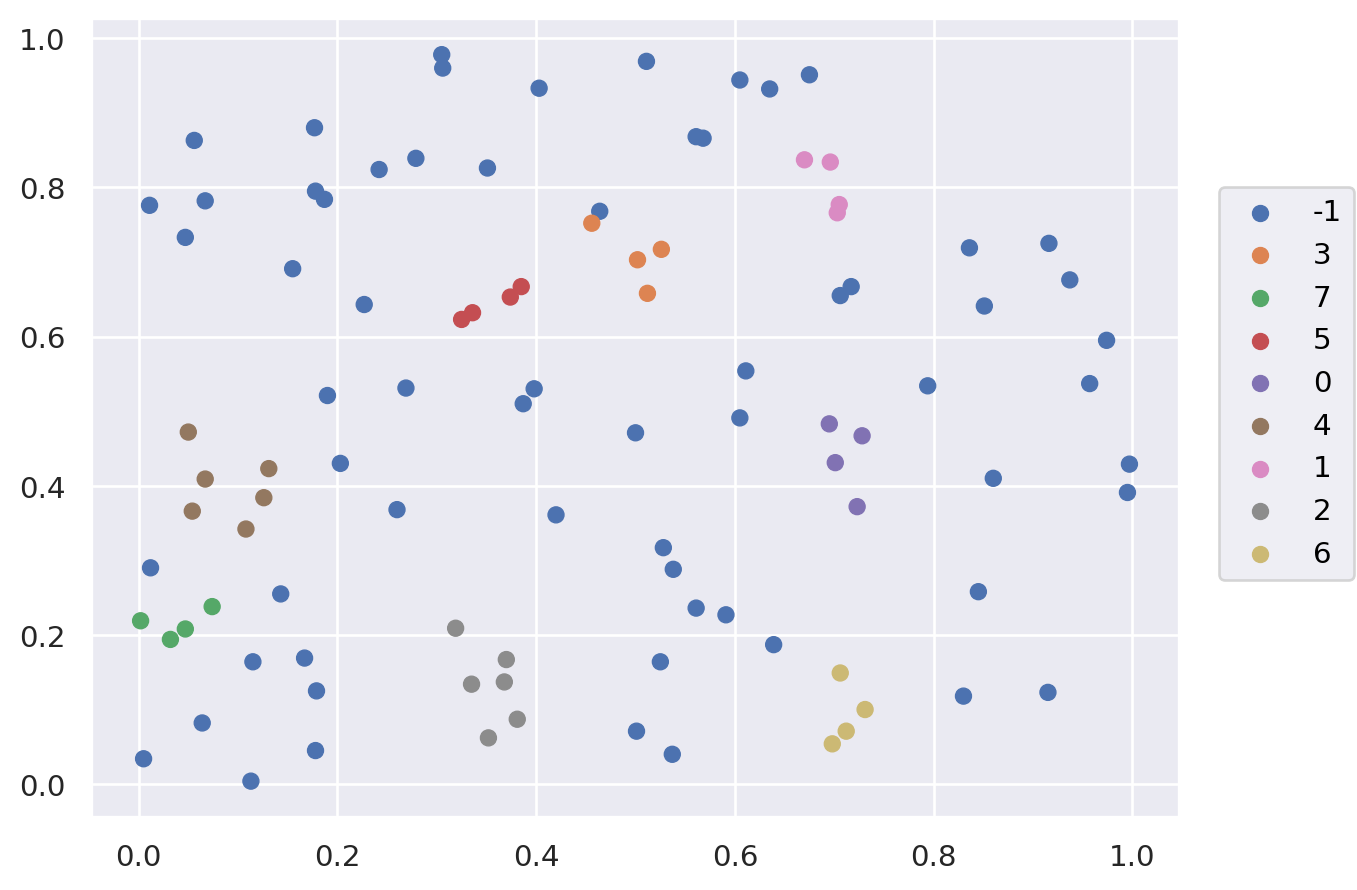

In [95]:
# DBSCAN con sklearn
matriz = np.round(np.random.rand(100, 2),3)

impl_DBSCAN = DBSCAN(eps=0.07, min_samples=4)
etiquetas = impl_DBSCAN.fit_predict(matriz)

(
    so.Plot(x=matriz[:,0], y=matriz[:,1])
    .add(so.Dot(), color=etiquetas.astype('str'))
)


### Ejercicio 5

#### Aplico `DBSCAN` sobre los datos anteriores

In [189]:
# Conjuntos de datos
# 2 grupos
display(d1.head())
display(d2.head())
display(iris.head())
# 4 grupos
display(dse.head())
display(datos_escalados.head())

x         y
0  1.765881 -8.314427
1  6.483456 -3.332369
2 -8.480197  0.067655
3  4.706642  7.349470
4  4.502446 -8.135970

x          y
0  9.319049   6.406236
1  2.752240   5.609928
2  8.469910  17.636237
3  8.701497   3.632456
4  7.858546  10.899268

LongSepalo  AnchoSepalo  LongPetalo  AnchoPetalo
0         5.1          3.5         1.4          0.2
1         4.9          3.0         1.4          0.2
2         4.7          3.2         1.3          0.2
3         4.6          3.1         1.5          0.2
4         5.0          3.6         1.4          0.2

x           y
0  0.002501  6488.26703
1 -0.026980  2521.94722
2 -0.029001  3068.77291
3  0.007030  4314.27482
4 -0.025356  2384.49945

x         y
0  0.500874  0.723261
1  0.039251  0.327807
2  0.007607  0.382327
3  0.571790  0.506507
4  0.064673  0.314103

**Busco el mejor `eps` para `d1`**

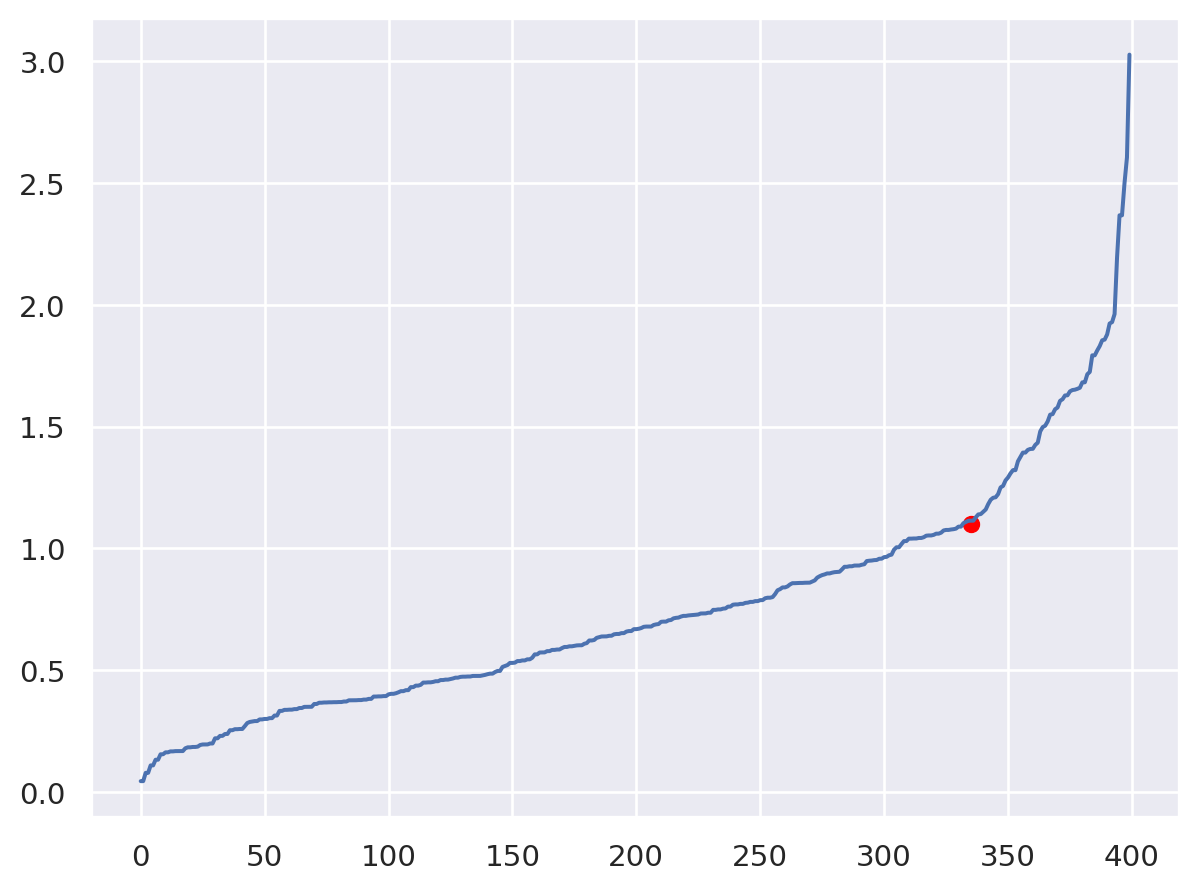

In [218]:
# Grafico las distancias a los vecinos para elegir el el mejor eps (codo de la curva)
vecinos = NearestNeighbors(n_neighbors=2)  # El primer punto más cercano es el punto mismo, por eso se pide 2: el 2do es el verdadero
ajuste_vecinos = vecinos.fit(d1)
distancias, indices = ajuste_vecinos.kneighbors(d1)
distancias = distancias[:,1]  # La primer columna corresponde a la distancia consigo mismo, la descarto 
distancias = np.sort(distancias, axis=0)
# Marco lo que considero el codo (eps en eje y) 
so.Plot(x = np.arange(len(distancias)), y = distancias).add(so.Line()).add(so.Dot(color='red'), x=[335], y=[1.1])  
# eps=1.1

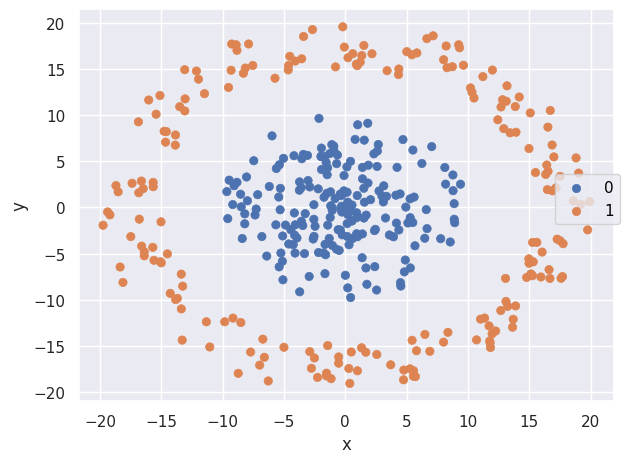

In [240]:
# d1 
# Instancio la implementación de DBSCAN y obtengo las etiquetas
impl_DBSCAN = DBSCAN(eps=4, min_samples=4)  # El eps que indica el codo no siempre es el mejor!
etiquetas_d1 = impl_DBSCAN.fit_predict(d1)

# Creo los gráficos
d1_dbscan_vis = (
    so.Plot(data=d1, x='x', y='y', color=etiquetas_d1.astype('str'))
    .add(so.Dot())  
)

# Visualizo
d1_dbscan_vis.show()

**Busco el mejor `eps` para `d2`**

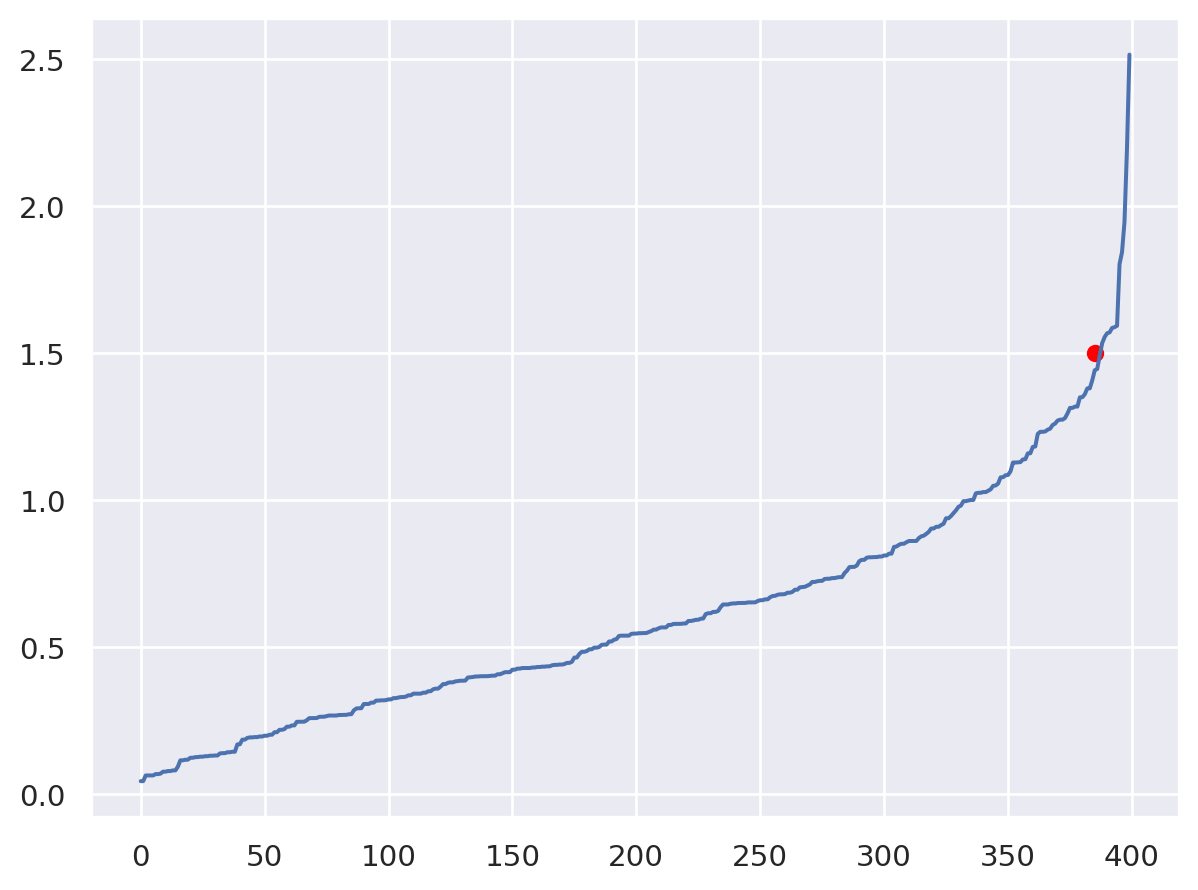

In [211]:
# Grafico las distancias a los vecinos para elegir el el mejor eps (codo de la curva)
vecinos = NearestNeighbors(n_neighbors=2)  # El primer punto más cercano es el punto mismo, por eso se pide 2: el 2do es el verdadero
ajuste_vecinos = vecinos.fit(d2)
distancias, indices = ajuste_vecinos.kneighbors(d2)
distancias = distancias[:,1]  # La primer columna corresponde a la distancia consigo mismo, la descarto 
distancias = np.sort(distancias, axis=0)
# Marco lo que considero el codo (eps en eje y) 
so.Plot(x = np.arange(len(distancias)), y = distancias).add(so.Line()).add(so.Dot(color='red'), x=[385], y=[1.5])  
# eps=1.5

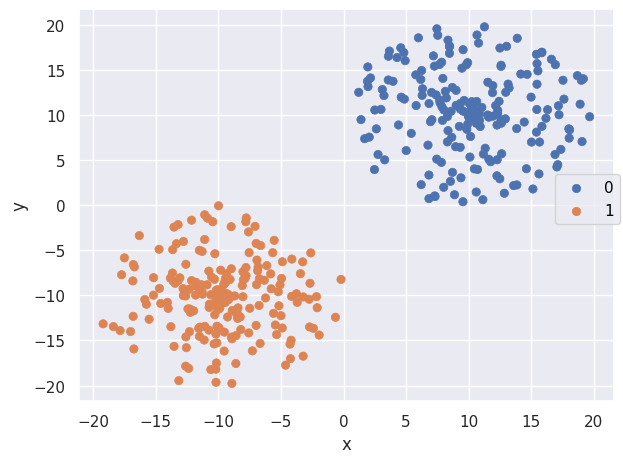

In [249]:
# d2
# Instancio la implementación de DBSCAN y obtengo las etiquetas
impl_DBSCAN = DBSCAN(eps=3, min_samples=5)  # De nuevo, el codo no indica siempre el mejor eps, es solo una guía
etiquetas_d2 = impl_DBSCAN.fit_predict(d2) 

# Creo los gráficos
d2_dbscan_vis = (
    so.Plot(data=d2, x='x', y='y', color=etiquetas_d2.astype('str'))
    .add(so.Dot())  
)

# Visualizo
d2_dbscan_vis.show()

**Busco el mejor `eps` para `iris`**

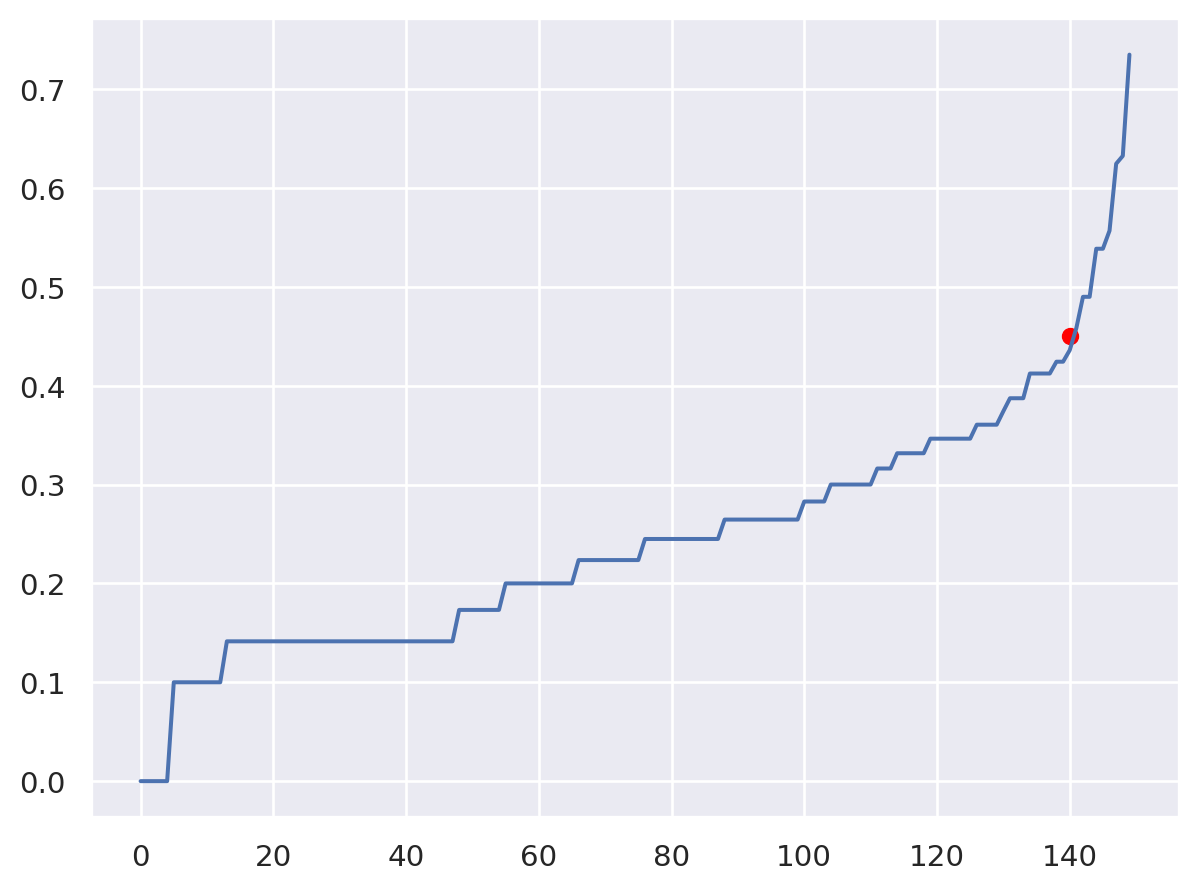

In [256]:
# Grafico las distancias a los vecinos para elegir el el mejor eps (codo de la curva)
vecinos = NearestNeighbors(n_neighbors=2)  # El primer punto más cercano es el punto mismo, por eso se pide 2: el 2do es el verdadero
ajuste_vecinos = vecinos.fit(iris)
distancias, indices = ajuste_vecinos.kneighbors(iris)
distancias = distancias[:,1]  # La primer columna corresponde a la distancia consigo mismo, la descarto 
distancias = np.sort(distancias, axis=0)
# Marco lo que considero el codo (eps en eje y) 
so.Plot(x = np.arange(len(distancias)), y = distancias).add(so.Line()).add(so.Dot(color='red'), x=[140], y=[0.45])  
# eps=0.45

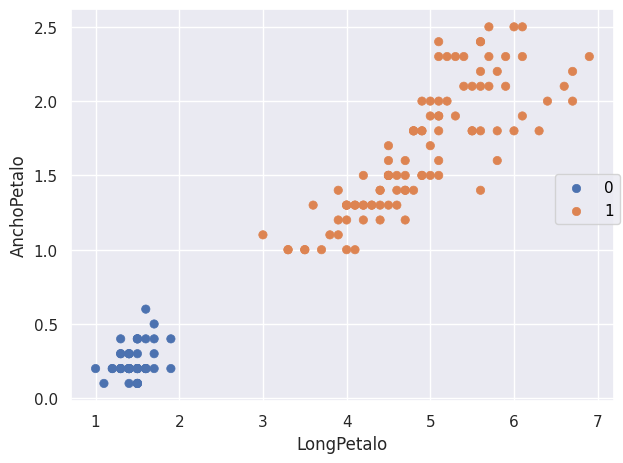

In [264]:
# iris
# Instancio la implementación de DBSCAN y obtengo las etiquetas
impl_DBSCAN = DBSCAN(eps=1, min_samples=5)   # ¿eps=0.45?
etiquetas_iris = impl_DBSCAN.fit_predict(iris)


# Creo los gráficos
iris_dbscan_vis = (
    so.Plot(data=iris, x='LongPetalo', y='AnchoPetalo', color=etiquetas_iris.astype('str'))
    .add(so.Dot())  
)

# Visualizo
iris_dbscan_vis.show()

**Busco el mejor `eps` para `dse`**

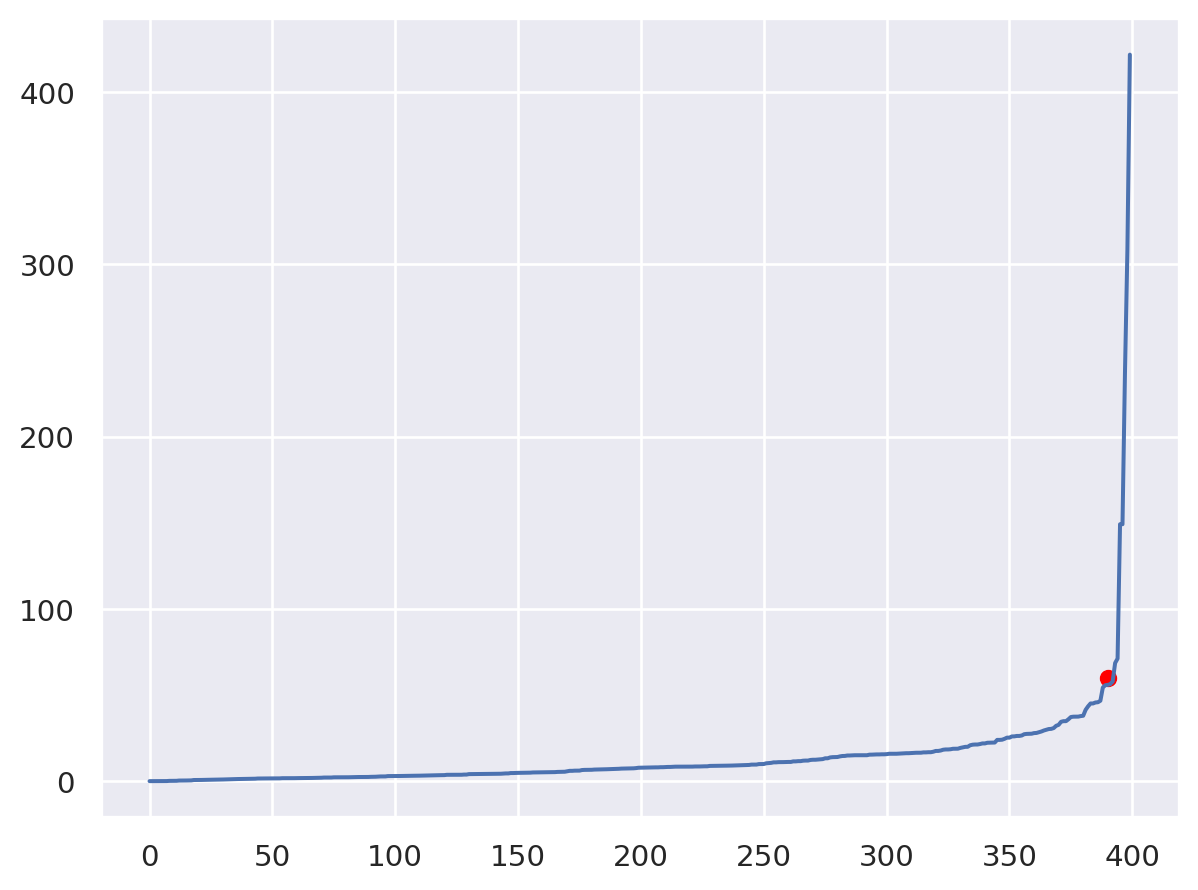

In [268]:
# Grafico las distancias a los vecinos para elegir el el mejor eps (codo de la curva)
vecinos = NearestNeighbors(n_neighbors=2)  # El primer punto más cercano es el punto mismo, por eso se pide 2: el 2do es el verdadero
ajuste_vecinos = vecinos.fit(dse)
distancias, indices = ajuste_vecinos.kneighbors(dse)
distancias = distancias[:,1]  # La primer columna corresponde a la distancia consigo mismo, la descarto 
distancias = np.sort(distancias, axis=0)
# Marco lo que considero el codo (eps en eje y) 
so.Plot(x = np.arange(len(distancias)), y = distancias).add(so.Line()).add(so.Dot(color='red'), x=[390], y=[60])  
# eps=60

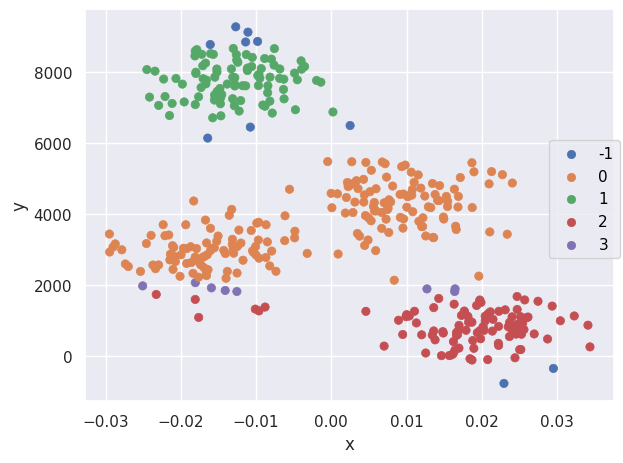

In [311]:
# dse
# Instancio la implementación de DBSCAN y obtengo las etiquetas
impl_DBSCAN_dse = DBSCAN(eps=110, min_samples=5) 

etiquetas_dse = impl_DBSCAN_dse.fit_predict(dse)

# Creo los gráficos
dse_dbscan_vis = (
    so.Plot(data=dse, x='x', y='y', color=etiquetas_dse.astype('str'))
    .add(so.Dot())  
)

# Visualizo
dse_dbscan_vis.show()

**Busco el mejor `eps` para `datos_escalados`**

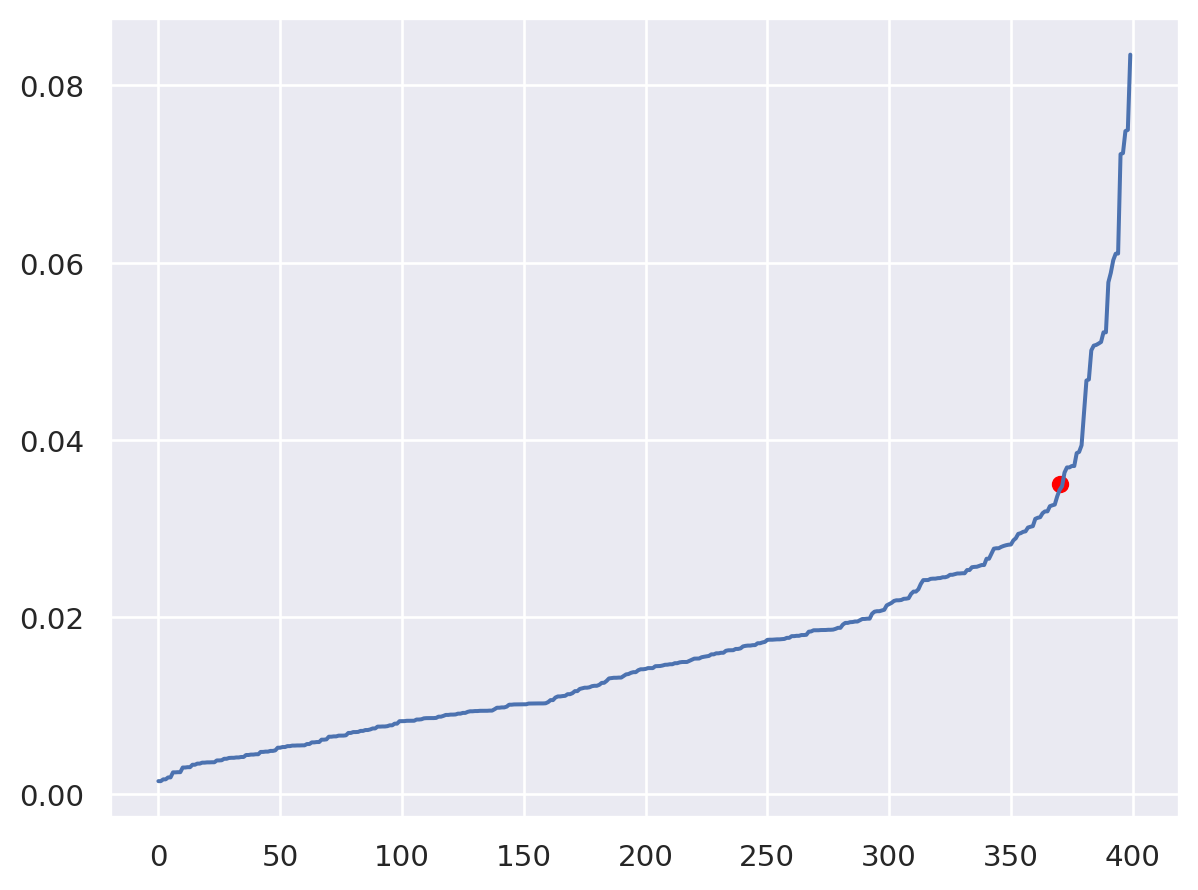

In [317]:
# Grafico las distancias a los vecinos para elegir el el mejor eps (codo de la curva)
vecinos = NearestNeighbors(n_neighbors=2)  # El primer punto más cercano es el punto mismo, por eso se pide 2: el 2do es el verdadero
ajuste_vecinos = vecinos.fit(datos_escalados)
distancias, indices = ajuste_vecinos.kneighbors(datos_escalados)
distancias = distancias[:,1]  # La primer columna corresponde a la distancia consigo mismo, la descarto 
distancias = np.sort(distancias, axis=0)
# Marco lo que considero el codo (eps en eje y) 
so.Plot(x = np.arange(len(distancias)), y = distancias).add(so.Line()).add(so.Dot(color='red'), x=[370], y=[0.035])  
# eps=0.45

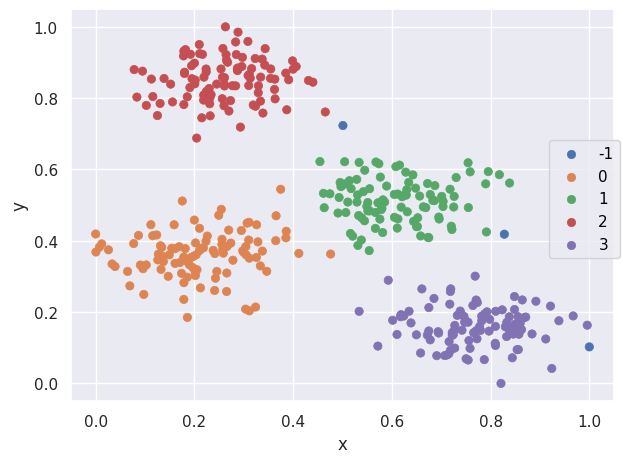

In [334]:
# datos escalados
# Instancio la implementación de DBSCAN y obtengo las etiquetas
impl_DBSCAN_de = DBSCAN(eps=0.09, min_samples=9) 

etiquetas_de = impl_DBSCAN_de.fit_predict(datos_escalados)

# Creo los gráficos
de_dbscan_vis = (
    so.Plot(data=datos_escalados, x='x', y='y', color=etiquetas_de.astype('str'))
    .add(so.Dot())  
)

# Visualizo
de_dbscan_vis.show()

### Ejercicio 6

In [344]:
# Eliminamos datos faltantes y reseteo indices
penguins = sns.load_dataset("penguins").dropna().reset_index(drop=True)
# Normalizo las variables "bill_length_mm" y "flipper_length_mm" (K-NN es sensible a las escalas)
penguins[["bill_length_mm", "flipper_length_mm"]] = StandardScaler().fit_transform(penguins[["bill_length_mm", "flipper_length_mm"]])
pings = penguins[["bill_length_mm", "flipper_length_mm"]]  # Me quedo con las variables con las que voy a trabajar
pings.head()

bill_length_mm  flipper_length_mm
0       -0.896042          -1.426752
1       -0.822788          -1.069474
2       -0.676280          -0.426373
3       -1.335566          -0.569284
4       -0.859415          -0.783651

In [378]:
# Para predecir el sexo de un ping
sexo_pings = penguins['sex']

k = 9 # La cantidad de vecinos cercanos
ind = 205  # Índice de un pingüino al cual vamos a encontrarle los vecinos más cercanos

# Obtengo los k vecinos más cercanos al ping #ind
kvecinos = NearestNeighbors(n_neighbors=k) 
# Dejo fuera al ping en cuestión del grupo de cercanos (validación leave-one-out)
kvecinos.fit(pings.drop([ind]))
distancias, indices = kvecinos.kneighbors(pings.iloc[[ind]])

# Obtengo una serie con el sexo de los pings cercanos al #ind
sexo_pings_cercanos = sexo_pings.iloc[indices.flatten()]
display(sexo_pings_cercanos)

# Hago la predicción (tomo la moda entre los k más cercanos)
pred_sexo_ping = mode(sexo_pings_cercanos)
print(f'\nLa predicción del sexo para el pingüino {ind} es: {pred_sexo_ping}')

14       Male
207    Female
198    Female
154    Female
189    Female
156    Female
170    Female
105      Male
67       Male
Name: sex, dtype: object


La predicción del sexo para el pingüino 205 es: Female


In [408]:
# Creo una función que hago todo lo anterior para poder aplicarsela luego a cada ping
def predecir_sexo_ping(datos_pings, sexo_pings, ind_ping, k):
    kvecinos = NearestNeighbors(n_neighbors=k)
    kvecinos.fit(datos_pings.drop([ind_ping]))  # Método de validación: leave-one-out
    distancias, indices = kvecinos.kneighbors(datos_pings.iloc[[ind_ping]])
    sexo_pings_cercanos = sexo_pings.iloc[indices.flatten()]
    return mode(sexo_pings_cercanos)

# Pruebo
print(predecir_sexo_ping(pings, sexo_pings, 205, 9))

Female


In [409]:
def acierto_predicciones_sexo_pings(datos_pings, sexo_pings, k):
    aciertos = 0
    total = len(datos_pings)
    for i in range(total):
        prediccion = predecir_sexo_ping(datos_pings, sexo_pings, i, k)
        if sexo_pings[i] == prediccion:
            aciertos += 1
    return aciertos / total

# Pruebo para k = 5
acierto_predicciones_sexo_pings(pings, sexo_pings, 9)

0.5165165165165165

In [410]:
# Obtengo los aciertos en las predicciones para distintos valores de k
porcentajes = []
for k in range(1,30,2):
    por_cien = acierto_predicciones_sexo_pings(pings, sexo_pings, k)
    porcentajes.append(por_cien)
    print(k, por_cien)

1 0.5105105105105106
3 0.5525525525525525
5 0.5285285285285285
7 0.5345345345345346
9 0.5165165165165165
11 0.5165165165165165
13 0.5195195195195195
15 0.5255255255255256
17 0.5255255255255256
19 0.5375375375375375
21 0.5405405405405406
23 0.5435435435435435
25 0.5435435435435435
27 0.5225225225225225
29 0.5405405405405406


In [411]:
k_optimo = int(2 * np.argmax(porcentajes) + 1)
k_optimo

3

### Ejercicio 7

Implementar un clasificador de k-NN que prediga la especie de los pingüinos. Pueden elegir las
variables. ¿Con cuáles variables obtienen mejores resultados?
Reportar los resultados con visualizaciones adecuadas.

In [415]:
def predecir_knn(var_a_explicar, vars_explicativas, k):
    # Cargo datos
    pings = sns.load_dataset("penguins").dropna().reset_index(drop=True)
    # Normalizo las variables explicativas
    pings[[v for v in vars_explicativas if pings[v].dtype != 'object']] = StandardScaler().fit_transform(
        pings[[v for v in vars_explicativas if pings[v].dtype != 'object']]
    )
    
    datos = pings[vars_explicativas]
    categoria = pings[var_a_explicar]
    # print(datos)
    # print(categoria)
    aciertos = 0
    total = len(datos)
    for i in range(total):
        prediccion = predecir_sexo_ping(datos, categoria, i, k)
        if categoria[i] == prediccion:
            aciertos += 1
    
    return k, aciertos / total

def predecir_var_ping(datos, categoria, ind_ping, k):
    kvecinos = NearestNeighbors(n_neighbors=k)
    kvecinos.fit(datos.drop([ind_ping]))  # Método de validación: leave-one-out
    distancias, indices = kvecinos.kneighbors(datos.iloc[[ind_ping]])
    cat_pings_cercanos = categoria.iloc[indices.flatten()]
    return mode(cat_pings_cercanos)

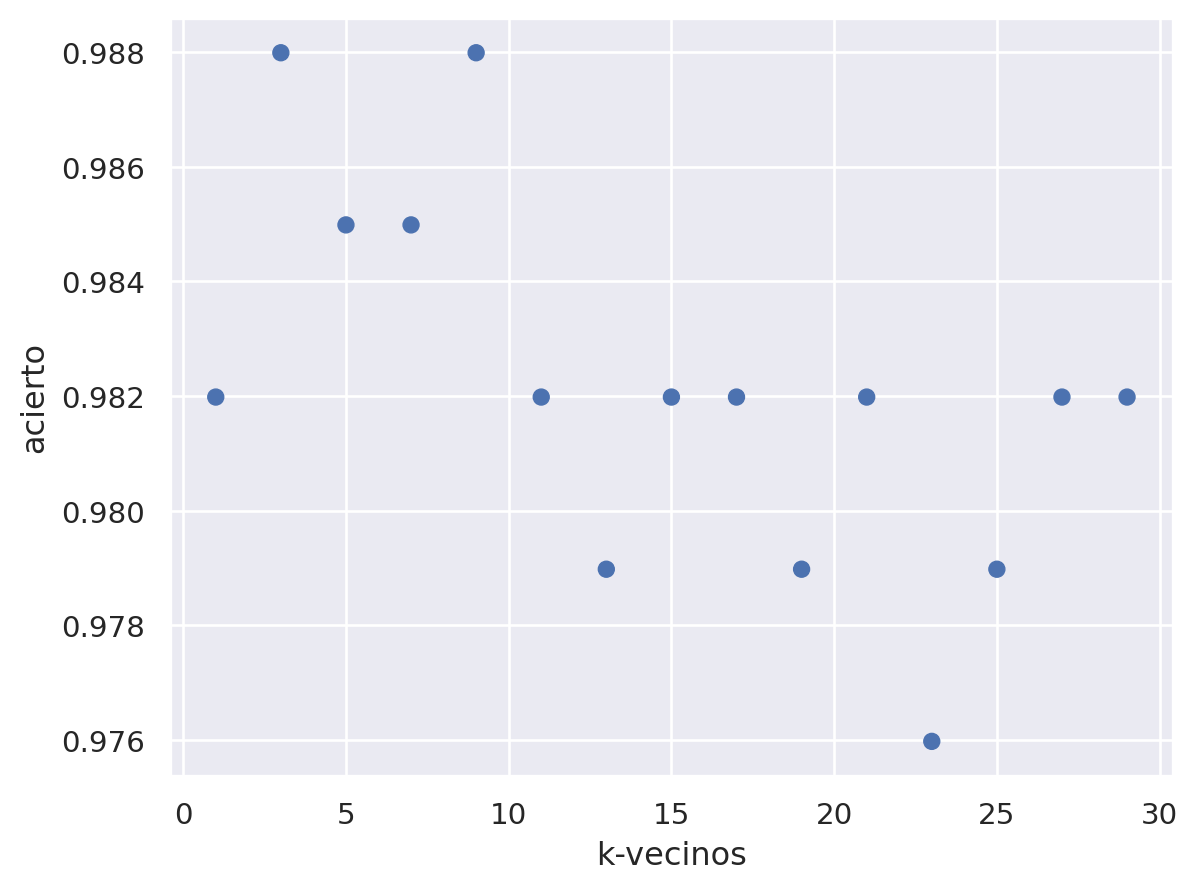

In [422]:
# Posibles 'species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'
vars_explicativas = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
var_a_explicar = 'species'

resultados = []
for k in range(1,30,2):
    res = predecir_knn(var_a_explicar, vars_explicativas, k)
    resultados.append(res)

(
    so.Plot(x=[k[0] for k in resultados], y=[p[1] for p in resultados])
    .add(so.Dot())
    .label(x='k-vecinos', y='acierto')
)

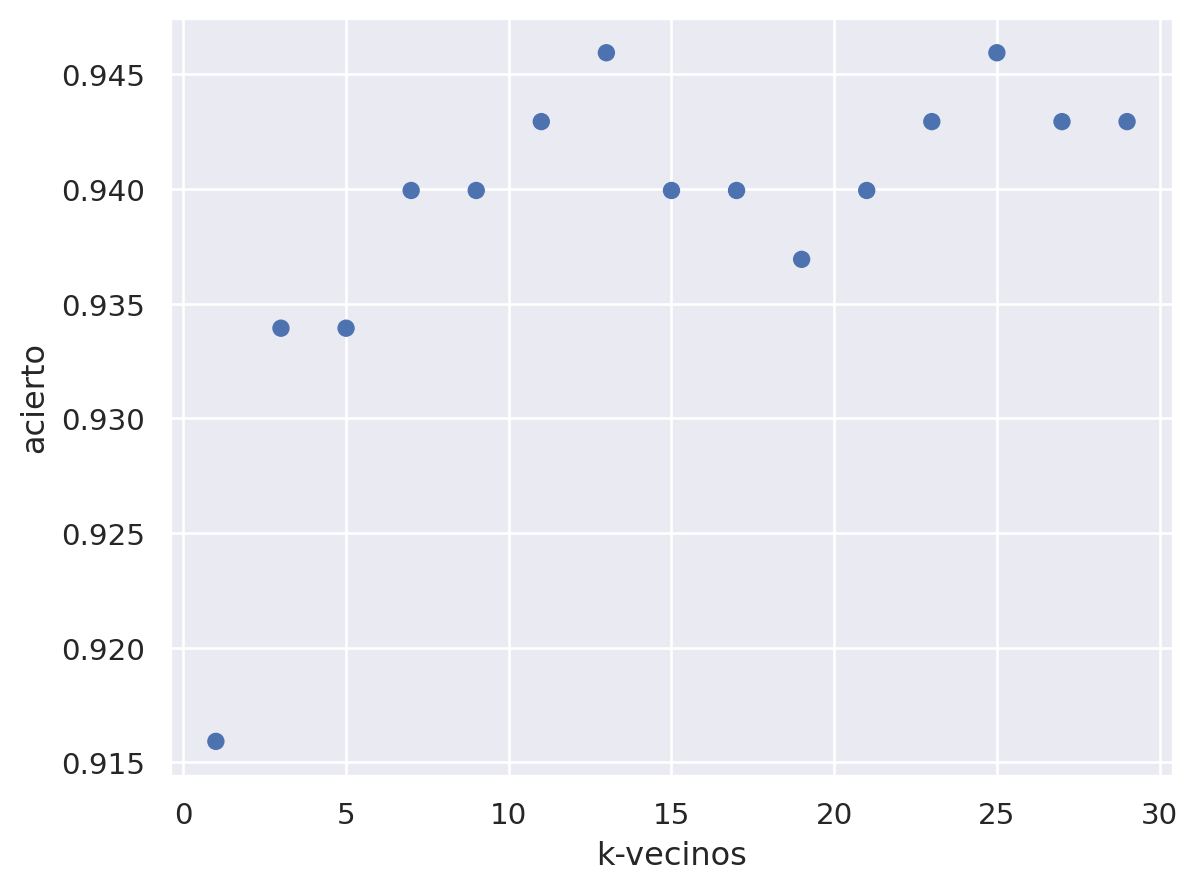

In [424]:
# Posibles 'species', 'island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm', 'body_mass_g', 'sex'
vars_explicativas = ['bill_length_mm', 'body_mass_g']
var_a_explicar = 'species'

resultados = []
for k in range(1,30,2):
    res = predecir_knn(var_a_explicar, vars_explicativas, k)
    resultados.append(res)

(
    so.Plot(x=[k[0] for k in resultados], y=[p[1] for p in resultados])
    .add(so.Dot())
    .label(x='k-vecinos', y='acierto')
)

## **Ejercicios Práctica 9**: *Componentes principales*

<span style='color:orange'> **REPASO PREVIO PARA PARCIAL** </span>


---
### **ESTADÍSTICA DESCRIPTIVA**  

---

#### **Medidas de tendencia central**

- **MEDIA** *(promedio, es más sensible a valores atípicos)* $= \mu = \frac{\displaystyle\sum_{i=1}^{\dim(\mathbf{x})} x_i}{\dim(\mathbf{x})}$.

    - Para facilitar la notación, llamo $\vec{\mu}$ al vector $\left[\begin{array}{c}\mu\\\vdots\\\mu\end{array}\right]$. El subíndice indica la variable a ala cual corresponde la media. Y llamo $\mathbf{M}$ a la matriz que tiene en cada columna el vector $\vec{\mu}$ correspondiente.

- **MEDIANA**: valor del medio cuando los datos están ordenados en forma ascendente. *Cuando se tiene una cantidad par de datos, es el promedio de los dos del medio.* Es más robusta frente a valores atípicos.


#### **Medidas de dispersión**

*Indican cuánto varían los datos respecto de la media.*

- **VARIANZA** $\displaystyle var(\mathbf{x}) = \frac{\displaystyle \sum_{i=1}^{\dim(\mathbf{x})} (x_i - \mu)^2}{\dim(\mathbf{x})} = \frac{\langle \mathbf{x} - \vec{\mu}, \mathbf{x} - \vec{\mu} \rangle}{\dim(\mathbf{x})} = \frac{||\mathbf{x} - \vec{\mu}||^2}{\dim(\mathbf{x})}$

- **DESVÍO ESTÁNDAR** $\displaystyle = \sigma =  \sqrt{\frac{\displaystyle \sum_{i=1}^{\dim(\mathbf{x})} (x_i - \mu)^2}{\dim(\mathbf{x})}}$

    - Esta medida está en las *mismas unidades* que los datos, es más interpretable.



---
### **NORMALIZACIÓN ESTÁNDAR**  

---


- Fórmula conceptual: $\boxed{\displaystyle \frac{columna\_datos - promedio\_col\_datos}{desvio\_estandar}}$ 

- Cada valor $x_i$ de cada columna $\mathbf{x}$ pasa a ser: $\frac{x_i - \mu}{\sqrt{var(\mathbf{x})}}$

- Código: `X_estandar = (X - X.mean()) / np.sqrt(X.var())`, donde $X$ es un dataframe.



---
### **COMPONENTES PRINCIPALES**  

---

#### **Relación entre variables**

- **COVARIANZA** $\displaystyle = covar(\mathbf{x},\mathbf{y}) = \frac{\displaystyle \sum_{i=1}^n (x_i - \mu_x)(y_i - \mu_y)}{n} = \frac{\langle \mathbf{x} - \vec{\mu}_x, \mathbf{y} - \vec{\mu}_y \rangle}{n}$

- **MATRIZ DE COVARIANZA**: mide la relación lineal entre dos o más variables de una matriz $X$ con $n$ **observaciones** y $p$ **variables**: $\displaystyle \Sigma = \frac{(X - \mathbf{M})^T(X - \mathbf{M})}{n} \in \mathbb{R}^{p\times p}$.

   - Llamando $\displaystyle X^\star = X - \mathbf{M}$ a los **datos normalizados**, se tiene que $\displaystyle \boxed{\Sigma = \frac{(X^\star)^T X^\star}{n}}$
       - Se usa el **estimador insesgado** $n-1$ cuando se calcula sobre una muestra *(varianza muestral)*.
   - $\Sigma$ es **simétrica, diagonalizable, con autovalores no negativos y existe una base otogonal de autovectore.**

- **CORRELACIÓN**: *normaliza* la covarianza, dividiéndola por los desvíos estándar de cada variable: $cor(\mathbf{x}, \mathbf{y}) = \displaystyle \frac{cov(\mathbf{x}, \mathbf{y})}{\sqrt{var(\mathbf{x})} \sqrt{var(\mathbf{y})}} = \frac{\langle \mathbf{x} - \vec{\mu}_x, \mathbf{y} - \vec{mu}_y \rangle}{||\mathbf{x} -\vec{\mu}_x || \;||\mathbf{y} - \vec{\mu}_y|||}$

   - La ***similitud*** entre dos vectores se mide con el ***conseo del ángulo*** que forman: $\cos(\theta) = \frac{\langle\mathbf{x}, \mathbf{y} \rangle}{||\mathbf{x}|| \; ||\mathbf{y}||} \leadsto$ la correlación mide la similitud entre el vector $\mathbf{x} - \vec{\mu}_x$ y el vector $ \mathbf{y} - \vec{\mu}_y$.
      - Si el ángulo es $0$ la correlación es $1$ tienen la misma dirección y sentido: uno es multipĺo escalar del otro.
      - Si $\pi$, la correlación es $-1$: están sobre la misma recta pero van en sentidos opuestos.
      - Si $\displaystyle \frac{\pi}{2}$, la correlación es $0$: son **ortogonales**.



#### **Cálculo de las componentes principales**


- Para calcular la **varianza** de la proyección sobre la recta generada por el **vector unitario** $\vec{v}$ se usa la fórmula: $var(X^\star \vec{v}) = \vec{v}^T\Sigma\vec{v}$

- El vector $\vec{v}$ que **maximiza** $ \vec{v}^T\Sigma\vec{v}$ y que corresponde con el **mayor autovalor de la matriz de covarianza**, es la **dirección en la que las proyecciones tienen mayor varianza**, es decir, es la **dirección de la primera componente principal**.

- Las demás componentes se obtienen con los autovectores asociados a los demás autovalores de mayor tamaño, que al ser ortogonales entre sí, garantizan la menor dependendencia lineal entre las variables, es decir, la menor redundancia de información.

- Al **diagonalizar la matriz de covarianza**, obtengo una base de autovectores ortogonales asociados a **autovalores**, de los cuales puedo ir tomando los de mayor valor para el modelo **PCA**.

- Los **autovalores** indican la cantidad de **varianza explicada** por cada **componente principal**: $\begin{cases} tr(\Sigma) = 100 \%\;  varianza\_explicada \\ \lambda_i = \displaystyle \frac{\lambda_i \cdot 100}{tr(\Sigma)} \%\; varianza\_explicada\end{cases}$



### Ejercicio 1

In [102]:
longitud = np.array([93,94,96,101,102,103,104,106])
ancho = np.array([76,78,80,84,85,82,83,83])
tortus = pd.DataFrame()
tortus['longitud'] = longitud
tortus['ancho'] = ancho
display(tortus)

longitud  ancho
0        93     76
1        94     78
2        96     80
3       101     84
4       102     85
5       103     82
6       104     83
7       106     83

**(a)** Normalizar las variables para que tengan media 0 y hacer el diagrama de dispersión. Estimar la presencia de correlación entre las variables a partir de este gráfico.

Media de los datos:
longitud    0.0
ancho       0.0
dtype: float64


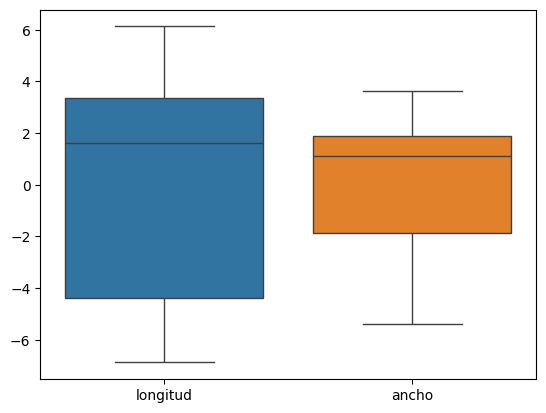

In [103]:
# Normalizo a media cero
tortus_normal = tortus - tortus.mean()
# Verifico
print(f'Media de los datos:\n{tortus_normal.mean()}')
bp_tortus_normal = sns.boxplot(tortus_normal)
plt.show()

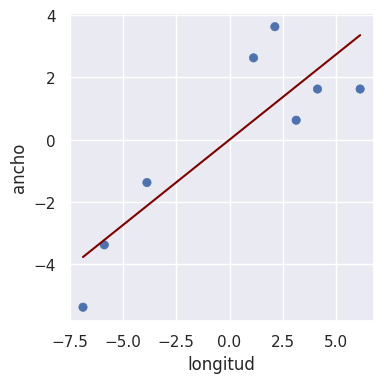

In [230]:
dispersion_tortus_normal = (
    so.Plot(tortus_normal, 'longitud', 'ancho')
    .add(so.Dot())
    .add(so.Line(color='maroon'), so.PolyFit(1))
    .layout(size=(4, 4))    
)
dispersion_tortus_normal.show()
# El gŕafico muestra que hay una correlación positiva entre longitud y ancho

In [231]:
# La matriz muestra una correlación positiva fuerte entre longitud y ancho 
tortus_normal.corr()

longitud     ancho
longitud  1.000000  0.858572
ancho     0.858572  1.000000

**(b)**  Calcular la matriz de covarianzas y hallar sus autovalores y autovectores.

In [232]:
# Calculo "a mano" usando la fórmula el estimador sesgado (covarianza poblacional)
matriz_covarianza = (tortus_normal.T @ tortus_normal) / (tortus_normal.shape[0]) 
display(matriz_covarianza)

# Obtengo lo mismo que con el comando de numpy
mcov = tortus_normal.cov()
display(mcov)

longitud      ancho
longitud  20.859375  11.421875
ancho     11.421875   8.484375

longitud      ancho
longitud  23.839286  13.053571
ancho     13.053571   9.696429

In [233]:
# Calculo los autovalores y autovectores de la matriz de covarianza
autovals, autovecs = np.linalg.eigh(matriz_covarianza.to_numpy())  # Con eig obtengo obtengo otros autovectores (equivalentes)
print(f'Autovalores: {autovals}')
print(f'Autovectores:\n{autovecs}')
# Notar que los autovectores (columas) asociados a los autovalores mayorese se retornan en orden ascendente

Autovalores: [ 1.68171008 27.66203992]
Autovectores:
[[ 0.51170211 -0.85916293]
 [-0.85916293 -0.51170211]]


**(c)** Hallar las componentes principales.

*Calculo "a mano"*

In [234]:
print(f'Normas de los autovectores: {np.linalg.norm(autovecs[0])},{np.linalg.norm(autovecs[1])}')
print(f'Son ortogonales: {np.isclose(autovecs[0].T @ autovecs[1], 0)}')

Normas de los autovectores: 0.9999999999999999,0.9999999999999999
Son ortogonales: True


In [235]:
# Diagonalizo la matriz de covarianza (esto es una verificación, no un paso necesario)
D = np.diag(autovals)
diagonalizacion_cov = autovecs @ D @ autovecs.T
# Verifico
print(f'Matriz de covarianza original:\n\n{matriz_covarianza.to_numpy()}\n\n')
print(f'Matriz de covarianza resultado de la diagonalización:\n\n{diagonalizacion_cov}\n')
print(np.isclose(diagonalizacion_cov, matriz_covarianza.to_numpy()))

Matriz de covarianza original:

[[20.859375 11.421875]
 [11.421875  8.484375]]


Matriz de covarianza resultado de la diagonalización:

[[20.859375 11.421875]
 [11.421875  8.484375]]

[[ True  True]
 [ True  True]]


In [236]:
# Defino la primer componente principal como el primer autovector de la matriz de la diagonalización
v1 = autovecs[:, 1] # Ya vi que el segundo autovalor es el mayor, me quedo con la sagunda columna del retorno de eigh
v1 # Es el primer vector que maximiza v1^TSigmav1 

array([-0.85916293, -0.51170211])

In [237]:
# Si U es la matriz de autovectores, el nuevo conjunto de datos es Z = X ⋆ U
U = np.fliplr(autovecs) # Cambio las  posiciones de las columnas
Z = tortus_normal @ U
print(Z.to_numpy())

[[ 8.65714403  1.10004875]
 [ 6.77457687 -0.106575  ]
 [ 4.03284678 -0.80149665]
 [-2.30977635 -1.67963783]
 [-3.68064139 -2.02709865]
 [-3.00469799  1.06209227]
 [-4.37556304  0.71463144]
 [-6.09388891  1.73803567]]


*Calculo con sklearn*

In [238]:
impl_pca = PCA(n_components = 2)
componentes_principales = impl_pca.fit_transform(tortus_normal)
componentes_principales
# Las que calculé a mano solo difieren en el signo, pero el resultado sigue siendo válido

array([[-8.65714403, -1.10004875],
       [-6.77457687,  0.106575  ],
       [-4.03284678,  0.80149665],
       [ 2.30977635,  1.67963783],
       [ 3.68064139,  2.02709865],
       [ 3.00469799, -1.06209227],
       [ 4.37556304, -0.71463144],
       [ 6.09388891, -1.73803567]])

**(d)** Decidir si la información está mayormente representada en una de estas dos componentes.

**(e)** Indicar la proporción de la variabilidad explicada por cada una de ellas. ¿A que conclusión puede llegar?

USO: Los **autovalores** indican la cantidad de **varianza explicada** por cada **componente principal**: $\begin{cases} tr(\Sigma) = 100 \%\;  varianza\_explicada \\ \lambda_i = \displaystyle \frac{\lambda_i \cdot 100}{tr(\Sigma)} \%\; varianza\_explicada\end{cases}$ 

In [239]:
# Recupero los autovalores
aval1 = autovals[0]
aval2 = autovals[1]
traza_cov = matriz_covarianza.to_numpy().trace()
# Verifico que la suma de los autovalores sea igual a la suma de la traza de la matriz de covarianza (vale siempre, pero para recordarlo...)
print(f'tr(matriz_covarianza) = suma(autovals): {np.isclose(traza_cov, aval1 + aval2)}\n')
print(f'El autovector {autovecs[:, 0]} asociado al autovalor {np.round(aval1,3)} explica el {np.round((aval1 * 100) / traza_cov,2)}% de la varianza.\n')
print(f'El autovector {autovecs[:, 1]} asociado al autovalor {np.round(aval2,3)} explica el {np.round((aval2 * 100) / traza_cov,2)}% de la varianza.\n')
print(f'La primera compomnente principal es:\n{componentes_principales[:,0]}')
# Con una sola componente explicamos la mayor parte de la varianza (información) en los datos

tr(matriz_covarianza) = suma(autovals): True

El autovector [ 0.51170211 -0.85916293] asociado al autovalor 1.682 explica el 5.73% de la varianza.

El autovector [-0.85916293 -0.51170211] asociado al autovalor 27.662 explica el 94.27% de la varianza.

La primera compomnente principal es:
[-8.65714403 -6.77457687 -4.03284678  2.30977635  3.68064139  3.00469799
  4.37556304  6.09388891]


### Ejercicio 2

In [240]:
A = np.array([[3,1,1],[1,3,1],[1,1,5]])
A

array([[3, 1, 1],
       [1, 3, 1],
       [1, 1, 5]])

**(a)** Hallar los autovalores y autovectores de la matriz de covarianzas.

*Calculo "a mano"*

In [241]:
# 1. Llevo los datos a media cero
A_normal = A-A.mean()
# 2. Calculo la matriz de covarianza
matriz_covarianza_A = (A_normal.T @ A_normal) / (A_normal.shape[0]) 
# 3. Obtengo los vectores y valores propios
avals, avecs = np.linalg.eigh(matriz_covarianza_A)
print(f'Autovalores: {avals}\n')
print(f'Autovectores:\n{avecs}')

Autovalores: [0.02053235 1.33333333 4.27576394]

Autovectores:
[[ 6.62256844e-01 -7.07106781e-01 -2.47822260e-01]
 [ 6.62256844e-01  7.07106781e-01 -2.47822260e-01]
 [ 3.50473602e-01 -7.39449017e-17  9.36572610e-01]]


**(b)** Dar la expresión de las componentes principales $z_1, z_2, z_3$ e indicar la proporción de la variabilidad explicada por cada una de ellas.

In [242]:
# Genero la matriz que contiene a las componentes principales
U = np.fliplr(avecs) # Cambio las  posiciones de las columnas (np las retorna en orden ascendente)
Z = A_normal @ U
print(Z,'\n')
for i in range(3):
    print(f'La componente principal z{i+1} es {Z[:, i]}')

[[-8.87580600e-01 -1.41421356e+00 -1.64363903e-01]
 [-8.87580600e-01  1.41421356e+00 -1.64363903e-01]
 [ 3.35435436e+00 -2.30050805e-16 -8.69831841e-02]] 

La componente principal z1 es [-0.8875806  -0.8875806   3.35435436]
La componente principal z2 es [-1.41421356e+00  1.41421356e+00 -2.30050805e-16]
La componente principal z3 es [-0.1643639  -0.1643639  -0.08698318]


In [243]:
# Varianza explicada
aval1 = avals[0]
aval2 = avals[1]
aval3 = avals[2]
traza_cov = matriz_covarianza_A.trace()
print(f'tr(matriz_covarianza) = suma(autovals): {np.isclose(traza_cov, aval1 + aval2+ aval3)}\n')
print(f'El autovector {np.round(avecs[:, 0],3)} asociado al autovalor {np.round(aval1,2)} explica el {np.round((aval1 * 100) / traza_cov,1)}% de la varianza. Componente principal: {np.round(Z[:, 2],2)}\n')
print(f'El autovector {np.round(avecs[:, 1],3)} asociado al autovalor {np.round(aval2,2)} explica el {np.round((aval2 * 100) / traza_cov,1)}% de la varianza. Componente principal: {np.round(Z[:, 1],2)}\n')
print(f'El autovector {np.round(avecs[:, 2],3)} asociado al autovalor {np.round(aval3,2)} explica el {np.round((aval3 * 100) / traza_cov,1)}% de la varianza. Componente principal: {np.round(Z[:, 0],2)}\n')


tr(matriz_covarianza) = suma(autovals): True

El autovector [0.662 0.662 0.35 ] asociado al autovalor 0.02 explica el 0.4% de la varianza. Componente principal: [-0.16 -0.16 -0.09]

El autovector [-0.707  0.707 -0.   ] asociado al autovalor 1.33 explica el 23.7% de la varianza. Componente principal: [-1.41  1.41 -0.  ]

El autovector [-0.248 -0.248  0.937] asociado al autovalor 4.28 explica el 76.0% de la varianza. Componente principal: [-0.89 -0.89  3.35]



**(c)** Hallar los `scores` de las primeras dos componentes principales correspondientes a la observación $x_1 = 2, x_2 = 2, x_3 = 1$ (es decir, los valores de $z1$ y $z2$ para dicha observación.

In [244]:
# Llevo la observación a media cero
obs_normal = np.array([2,2,1]) - A.mean()
z1 = obs_normal @ U[:, 0]
z2 = obs_normal @ U[:, 1]
print(f'z1: {z1},\nz2: {z2}')

z1: -0.8875806004378205,
z2: 7.132219303019097e-17


*Calculo con sklearn*

In [245]:
impl_pca = PCA(n_components = 2)
componentes_principales = impl_pca.fit_transform(A_normal)
z1 = obs_normal @ componentes_principales[:, 0]
z2 = obs_normal @ componentes_principales[:, 1]
print(f'z1: {z1},\nz2: {z2}')

z1: -2.82842712474619,
z2: -2.0486244229277057e-16


### Ejercicio 3

Implementar un programa que reciba como input un archivo de datos y un número `p_acum` y devuelva la mínima cantidad de componentes principales que deben considerarse para que el porcentaje de varianza acumulada sea mayor o igual que `p_acum`.

In [268]:
def calcular_componentes_necesarias(datos:np.ndarray, p_acum:float) -> int:
   
    if p_acum <= 0 or p_acum >= 100:   # Condición sobre el argumento
        raise ValueError('p_acum tiene que estar entre 0 y 100%')

    datos_normal = datos - datos.mean()  # Lleva los datos a media cero
    matriz_covarianza = (datos_normal.T @ datos_normal) / (datos_normal.shape[0])  # Calcula la matriz de covarianza
    autovalores, _ = np.linalg.eigh(matriz_covarianza) # Obtiene los vectores y valores propios
    autovalores = autovalores[::-1]  # Los ordena de mayor a menor
    traza_m_cov = matriz_covarianza.trace()  # Es igual a la suma de los autovalores
    conteo_cp = 0
    varianza_explicada = 0
    while varianza_explicada < p_acum:
        varianza_explicada += (autovalores[conteo_cp] * 100) / traza_m_cov
        conteo_cp += 1
    
    return conteo_cp
        
A = np.array([[3,1,1],[1,3,1],[1,1,5]])
res = calcular_componentes_necesarias(A, 80)
res

2

### Ejercicio 4

In [247]:
import os
from pathlib import Path

ruta = Path(os.getcwd()) / 'recs' / 'p8-chalets.csv'
datos_chalets = pd.read_csv(ruta)
display(datos_chalets)

Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
0          1               8.7          0.3               3.1
1          2              14.3          0.9               7.4
2          3              18.9          1.8               9.0
3          4              19.0          0.8               9.4
4          5              20.5          0.9               8.3
5          6              14.7          1.1               7.6
6          7              18.8          2.5              12.6
7          8              37.3          2.7              18.1
8          9              12.6          1.3               5.9
9         10              25.7          3.4              15.9

**(a)** Graficar los diagramas de dispersión de las variables de a pares. Estimar la presencia de correlación entre las variables a partir de estos gráficos.

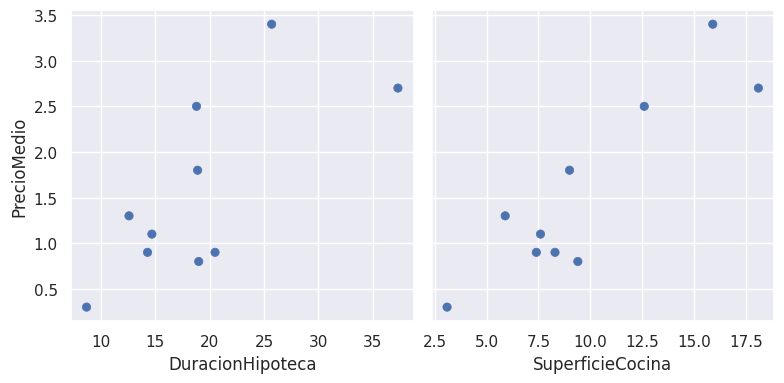

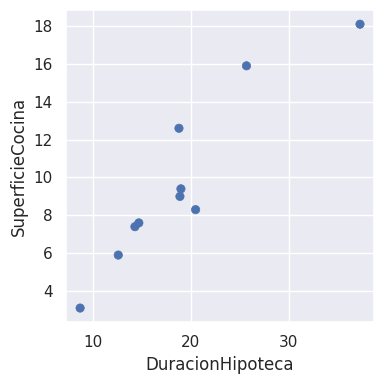

In [248]:
# Descarto la columna de promotoras
datos_chalets = datos_chalets.drop('Promotora', axis=1)
vis1 = (
    so.Plot(datos_chalets)
    .pair(x=['DuracionHipoteca', 'SuperficieCocina'], y=['PrecioMedio'])
    .add(so.Dot())
    .layout(size=(8,4))
)
vis2 = (
    so.Plot(datos_chalets, 'DuracionHipoteca', 'SuperficieCocina')
    .add(so.Dot())
    .layout(size=(4,4))
)
vis1.show() # Correlación positiva
vis2.show() # Correlacion positiva más marcada

In [249]:
correlaciones = datos_chalets.corr()
correlaciones

DuracionHipoteca  PrecioMedio  SuperficieCocina
DuracionHipoteca          1.000000     0.724473          0.932176
PrecioMedio               0.724473     1.000000          0.890607
SuperficieCocina          0.932176     0.890607          1.000000

**(b)** Calcular la matriz de covarianzas.

In [251]:
# Normalizo los datos
chalets_normal = datos_chalets - datos_chalets.mean()
matriz_de_covarianza = (chalets_normal.T @ chalets_normal) / (chalets_normal.shape[0])
matriz_de_covarianza

DuracionHipoteca  PrecioMedio  SuperficieCocina
DuracionHipoteca           56.9685       5.1705           30.4775
PrecioMedio                 5.1705       0.8941            3.6479
SuperficieCocina           30.4775       3.6479           18.7641

**(c), (d)**  Hallar la primera componente principal.

In [255]:
impl_pca = PCA(n_components=3)
Z = impl_pca.fit_transform(chalets_normal)
# print(Z)
print(f'Primera componente principal:\n{Z[:, 0]}')

Primera componente principal:
[-12.33032779  -5.32190768  -0.46379103  -0.26869244   0.51541635
  -4.85966865   1.24815077  20.04288783  -7.49384944   8.93178208]


**(e)** Indicar qué porcentaje de variabilidad total logra explicar esta componente.

In [263]:
autovalores, _ = np.linalg.eigh(matriz_de_covarianza)
autovalores = autovalores[::-1]  # Equivale a np.flip(autovalores) 
autovalores

for i in range(len(autovalores)):
    print(f'La componente {i+1} explica el {np.round((autovalores[i] * 100) / np.sum(autovalores),3)}% de la varianza')    

La componente 1 explica el 97.06% de la varianza
La componente 2 explica el 2.816% de la varianza
La componente 3 explica el 0.124% de la varianza


### Ejercicio 5

In [3]:
import os
from pathlib import Path

ruta = Path(os.getcwd()) / 'recs' / 'p8-iris.txt'
iris = pd.read_csv(ruta, sep='\t')
display(iris)

LongSepalo  AnchoSepalo  LongPetalo  AnchoPetalo
0           5.1          3.5         1.4          0.2
1           4.9          3.0         1.4          0.2
2           4.7          3.2         1.3          0.2
3           4.6          3.1         1.5          0.2
4           5.0          3.6         1.4          0.2
..          ...          ...         ...          ...
145         6.7          3.0         5.2          2.3
146         6.3          2.5         5.0          1.9
147         6.5          3.0         5.2          2.0
148         6.2          3.4         5.4          2.3
149         5.9          3.0         5.1          1.8

[150 rows x 4 columns]

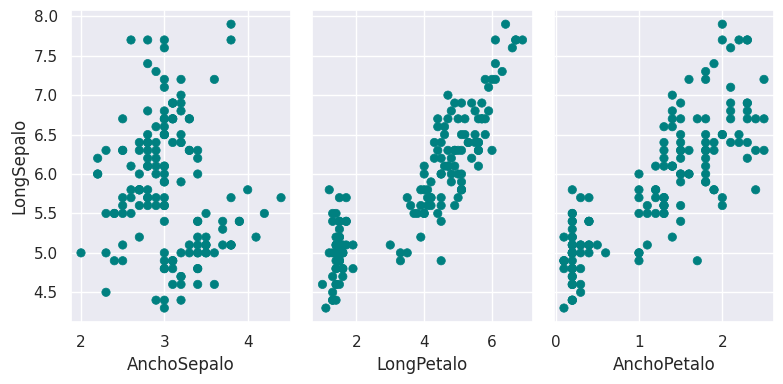

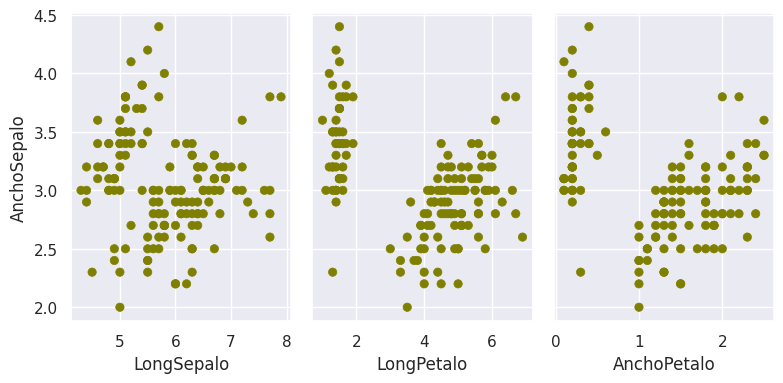

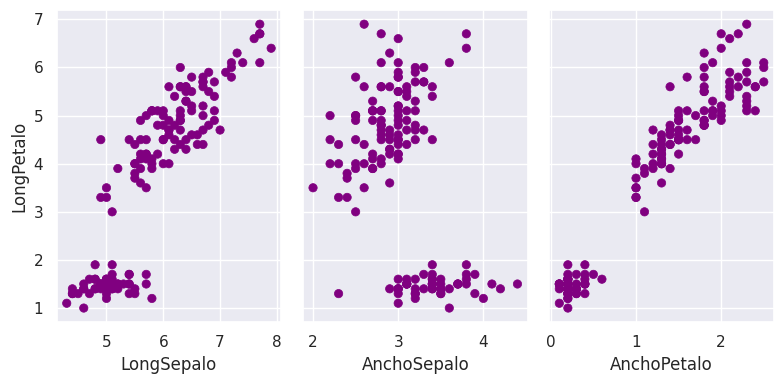

In [290]:
vis1 = (
    so.Plot(iris)
    .pair(x=[c for c in iris.columns if c != 'LongSepalo'], y=['LongSepalo'])
    .add(so.Dot(color='teal'))
    .layout(size=(8,4))
)

vis2 = (
    so.Plot(iris)
    .pair(x=[c for c in iris.columns if c != 'AnchoSepalo'], y=['AnchoSepalo'])
    .add(so.Dot(color='olive'))
    .layout(size=(8,4))
)

vis3 = (
    so.Plot(iris)
    .pair(x=[c for c in iris.columns if c != 'LongPetalo'], y=['LongPetalo'])
    .add(so.Dot(color='purple'))
    .layout(size=(8,4))
)

vis1.show()
vis2.show()
vis3.show()

In [292]:
iris_normal = iris - iris.mean()  # Normalizo
cps = calcular_componentes_necesarias(iris.to_numpy(), 90)  # Calculo cuantas cp necesito
impl_pca = PCA(n_components=cps)  # Instancio PCA de sklearn
Z = impl_pca.fit_transform(iris_normal)  # Ajusto y transformo
datos_transformados = pd.DataFrame(Z, columns=['Z1', 'Z2'])  # Convierto a df

# Visualizo
vis2 = (
    so.Plot(datos_transformados, 'Z1', 'Z2')
    .add(so.Dot(color='maroon'))
    .layout(size=(4,4))
)
vis2.show()

### Ejercicio 6

In [35]:
import os
from pathlib import Path

ruta = Path(os.getcwd()) / 'recs' / 'p8-hospitales-escalado.csv'
hospi = pd.read_csv(ruta)
display(hospi)

Servicio        NI     MO        RE        NE       ICM  \
0                Cirugia  0.358385  0.304  0.244275  0.257901  0.564103   
1        Tocoginecologia  1.000000  0.024  0.221374  0.065260  0.008547   
2            Hematologia  0.000000  0.328  0.503817  0.356053  1.000000   
3            Cardiologia  0.040369  0.176  0.282443  0.000000  0.675214   
4              Digestivo  0.044879  0.472  0.229008  0.294376  0.470085   
5       Medicina.Interna  0.790638  1.000  0.404580  0.781110  0.452991   
6             Neumologia  0.015675  0.408  0.320611  0.020049  0.820513   
7   Otorrinolaringologia  0.034572  0.168  0.160305  0.799670  0.307692   
8           Oftalmologia  0.107580  0.000  0.000000  0.788719  0.264957   
9              Pediatria  0.700666  0.024  0.145038  0.246065  0.000000   
10           Psiquiatria  0.028559  0.000  1.000000  1.000000  0.735043   
11         Traumatologia  0.197767  0.056  0.099237  0.448045  0.555556   
12              Urologia  0.144299  0.160  0.282443  0.104916  0.239316   

          ES  
0   0.443958  
1   0.447995  
2   0.082968  
3   0.160020  
4   0.130156  
5   1.000000  
6   0.085489  
7   0.044112  
8   0.000000  
9   0.236174  
10  0.121334  
11  0.295901  
12  0.167966

**(a)** Calcular las dos primeras componentes principales.

NI     0.266414
MO     0.240000
RE     0.299472
NE     0.397090
ICM    0.468771
ES     0.247390
dtype: float64

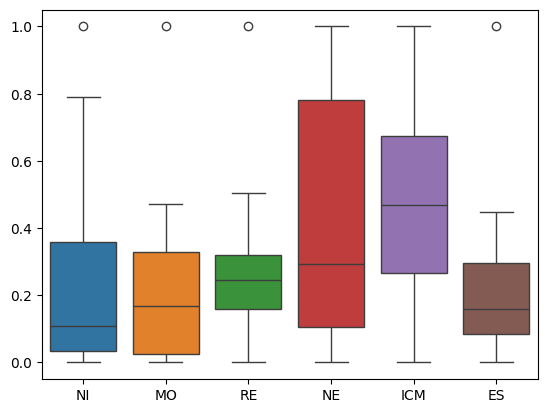

In [13]:
# Descarto las variables categóricas (me quedo solo con las numéricas para PCA) 
hospi_num = hospi[hospi.columns[1:]]
sns.boxplot(hospi_num)  # Tienen varianza 1
hospi_num.mean()  # No tienen media cero

In [15]:
hospi_normal = hospi_num - hospi_num.mean()
sns.boxplot(hospi_normal)  # Tienen varianza 1
hospi_normal.mean()  # Tienen media cero

NI     4.910602e-17
MO    -1.921540e-17
RE    -2.989062e-17
NE    -8.113168e-17
ICM    3.202566e-17
ES    -2.775558e-17
dtype: float64

In [47]:
# Instancio la implementación de PCA de sklearn
impl_pca = PCA(n_components=6)
# Obtengo la matriz que contiene a las componentes principales como columnas
Z = impl_pca.fit_transform(hospi_normal)
# Extraigo las dos primeras componentes
cp1 = Z[:,0]
cp2 = Z[:,1]
print(cp1,'\n',cp2)
# print(impl_pca.components_) # Esto nos da las direcciones (los coeficientes de la combinación lineal z = v_1 x_1 + ... v_p x_p)

[ 0.14281444  0.86685707 -0.54147388 -0.24172728 -0.14666936  0.71363325
 -0.34217044 -0.21248087 -0.14432021  0.55843734 -0.62232912 -0.05909119
  0.02852025] 
 [ 0.06040967 -0.31331282  0.1719503  -0.24924071 -0.03103765  1.01279186
 -0.0909605  -0.03004577 -0.20892222 -0.36479119  0.46940519 -0.1009971
 -0.32524906]


**(b), (c)** ¿Qué porcentaje de variabilidad logra captar cada una de ellas?

In [48]:
matriz_covarianza = (hospi_normal.T @ hospi_normal) / hospi_normal.shape[0]
autovalores, _ = np.linalg.eigh(matriz_covarianza)
autovalores = np.flip(autovalores)

print(f'La primera componente captura el {np.round((autovalores[0] * 100) / np.sum(autovalores), 2)}% de la varianza.')
print(f'La segunda componente captura el {np.round((autovalores[1] * 100) / np.sum(autovalores), 2)}% de la varianza.')
# Explican el 67% de la varianza aprox. (es poco, podría agregar una tercera o cuarta)

La primera componente captura el 39.86% de la varianza.
La segunda componente captura el 27.34% de la varianza.


**(d)** Hallar la correlación entre las nuevas variables y las originales (por medio de R2 ).

In [51]:
print(Z,'\n')
print(hospi_normal.to_numpy())

[[ 0.14281444  0.06040967 -0.20460046  0.00715308  0.11401373  0.06119552]
 [ 0.86685707 -0.31331282  0.03769206  0.31428276  0.0289715  -0.04921251]
 [-0.54147388  0.1719503  -0.28184937  0.10116837  0.08111868 -0.11129112]
 [-0.24172728 -0.24924071 -0.36627606  0.05183668  0.03347786  0.06997087]
 [-0.14666936 -0.03103765 -0.17341659 -0.22072469 -0.17406367 -0.02443046]
 [ 0.71363325  1.01279186 -0.11781694 -0.16736654 -0.02353018  0.01159735]
 [-0.34217044 -0.0909605  -0.50177689 -0.02208026 -0.02596734 -0.07306698]
 [-0.21248087 -0.03004577  0.43122608 -0.26888569 -0.0556937  -0.01528074]
 [-0.14432021 -0.20892222  0.52200085 -0.29043363  0.07529696 -0.04054889]
 [ 0.55843734 -0.36479119  0.19944621  0.10555735 -0.04431109 -0.06285223]
 [-0.62232912  0.46940519  0.47506545  0.46638862 -0.05868604  0.03038177]
 [-0.05909119 -0.1009971   0.06692789 -0.08908413  0.24147667  0.08200873]
 [ 0.02852025 -0.32524906 -0.08662223  0.01218806 -0.19210337  0.12152869]] 

[[ 0.09197073  0.064  

In [76]:
# Obtengo la matriz de correlacion entre la original y los datos tranformados
matriz_de_correlacion = np.corrcoef(hospi_normal.T, Z.T)
matriz_r2 = matriz_de_correlacion**2

        
correl_r2 = pd.DataFrame(
    matriz_r2,
)
correl_r2

0         1         2         3         4         5             6   \
0   1.000000  0.025987  0.033641  0.014853  0.408840  0.550530  9.150640e-01   
1   0.025987  1.000000  0.010579  0.003629  0.081276  0.430267  4.550661e-02   
2   0.033641  0.010579  1.000000  0.113750  0.277857  0.001731  1.580607e-01   
3   0.014853  0.003629  0.113750  1.000000  0.002015  0.005794  4.212495e-02   
4   0.408840  0.081276  0.277857  0.002015  1.000000  0.031597  5.474777e-01   
5   0.550530  0.430267  0.001731  0.005794  0.031597  1.000000  5.296942e-01   
6   0.915064  0.045507  0.158061  0.042125  0.547478  0.529694  1.000000e+00   
7   0.010978  0.514556  0.326228  0.374056  0.160207  0.377809  2.099653e-32   
8   0.002409  0.257622  0.000422  0.560417  0.219106  0.040482  1.934676e-32   
9   0.052709  0.138903  0.464298  0.020449  0.010548  0.000130  2.453201e-32   
10  0.006302  0.038311  0.050469  0.002431  0.059269  0.015659  2.677928e-32   
11  0.012539  0.005101  0.000522  0.000521  0.003391  0.036225  3.685742e-36   

              7             8             9             10            11  
0   1.097765e-02  2.408509e-03  5.270856e-02  6.302022e-03  1.253921e-02  
1   5.145556e-01  2.576220e-01  1.389033e-01  3.831136e-02  5.101156e-03  
2   3.262284e-01  4.223405e-04  4.642975e-01  5.046905e-02  5.220353e-04  
3   3.740559e-01  5.604173e-01  2.044900e-02  2.431445e-03  5.213819e-04  
4   1.602072e-01  2.191063e-01  1.054830e-02  5.926947e-02  3.391030e-03  
5   3.778095e-01  4.048169e-02  1.304885e-04  1.565866e-02  3.622547e-02  
6   2.099653e-32  1.934676e-32  2.453201e-32  2.677928e-32  3.685742e-36  
7   1.000000e+00  2.877890e-33  1.123367e-32  3.704553e-35  3.576094e-36  
8   2.877890e-33  1.000000e+00  6.266305e-32  5.251485e-33  1.129768e-31  
9   1.123367e-32  6.266305e-32  1.000000e+00  2.511465e-33  3.082825e-34  
10  3.704553e-35  5.251485e-33  2.511465e-33  1.000000e+00  4.501571e-33  
11  3.576094e-36  1.129768e-31  3.082825e-34  4.501571e-33  1.000000e+00

In [77]:
# ME quedo solo con los cruces que me interesan Z contra H
n_variables = hospi_normal.shape[1]
n_componentes = Z.shape[1]

# Submatriz de R^2 entre H y Z
r2_h_p = matriz_r2[:n_variables, n_componentes:]

correl_r2 = pd.DataFrame(
    r2_h_p,
    index=[f'H{i+1}' for i in range(n_variables)],  # Filas: variables originales
    columns=[f'Z{i+1}' for i in range(n_componentes)]  # Columnas: componentes
)
correl_r2

Z1        Z2        Z3        Z4        Z5        Z6
H1  0.915064  0.010978  0.002409  0.052709  0.006302  0.012539
H2  0.045507  0.514556  0.257622  0.138903  0.038311  0.005101
H3  0.158061  0.326228  0.000422  0.464298  0.050469  0.000522
H4  0.042125  0.374056  0.560417  0.020449  0.002431  0.000521
H5  0.547478  0.160207  0.219106  0.010548  0.059269  0.003391
H6  0.529694  0.377809  0.040482  0.000130  0.015659  0.036225

### Ejercicio 7

In [84]:
import os
from pathlib import Path

ruta = Path(os.getcwd()) / 'recs' / 'p8-calidad-agua.csv'
agua = pd.read_csv(ruta)
agua = agua.rename(columns={c : c.strip() for c in agua.columns}) # Corrijo el nombre de las columnas
display(agua)

x1       x2       x3       x4
0    0.01411  0.12445  1.04539  0.04318
1   -0.17200  1.01532  0.05276 -0.18680
2    1.03277 -0.00024  0.03330 -0.02765
3    0.06603  0.77159 -0.26459  0.05418
4    0.98548  0.06333 -0.03382 -0.09569
..       ...      ...      ...      ...
360 -0.09208  0.84087 -0.10243 -0.11231
361 -0.32223 -0.24897  1.13032  0.15636
362  1.15268 -0.17168  0.11728 -0.02610
363  0.94714  0.04118 -0.20791 -0.26628
364 -0.00756  0.89027  0.07742 -0.19212

[365 rows x 4 columns]

**(a), (b)** Realizar un gráfico de dispersión de las variables $x_1$ y $x_2$, y $x_3$ y $x_4$. ¿Cuántos clusters puede observar?

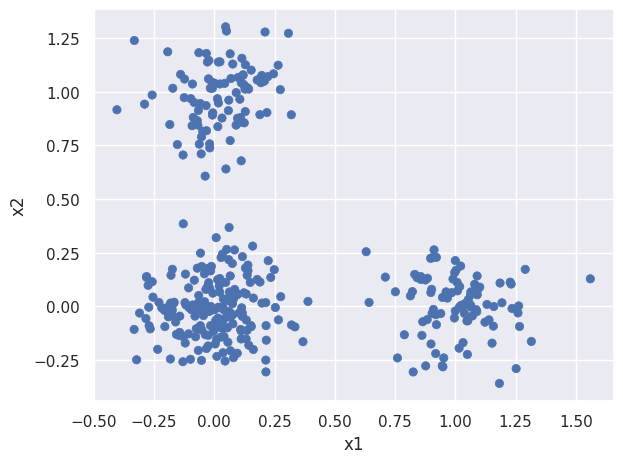

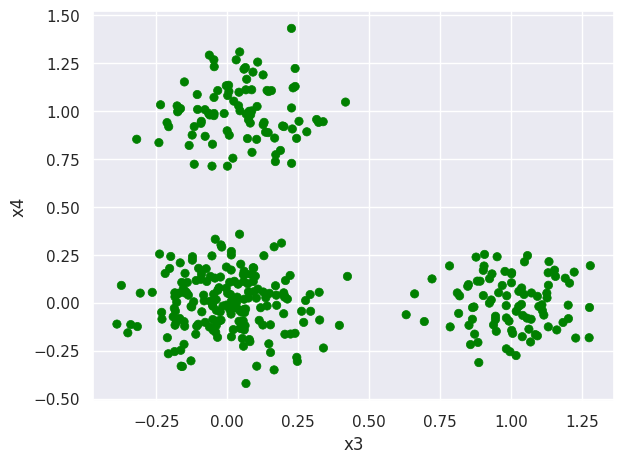

In [89]:
vis1 = (
    so.Plot(x=agua.x1, y=agua.x2)
    .add(so.Dot())
)
vis2 = (
    so.Plot(x=agua.x3, y=agua.x4)
    .add(so.Dot(color='green'))
)
vis1.show() # 3 clusters
vis2.show() # 3 clusters

**(c)** Realizar la descomposición en componentes principales de los datos y realizar un gráfico de dispersión de las dos primeras componentes principales z1 y z2. ¿Cuántos clusters puede observar?

x1    0.259761
x2    0.239784
x3    0.257729
x4    0.246363
dtype: float64


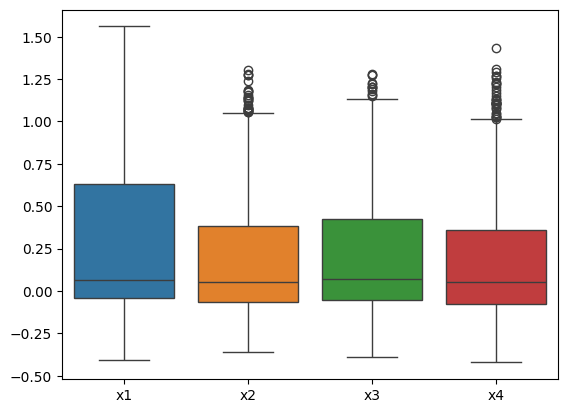

In [91]:
# Verifico que esten normalizados los datos
sns.boxplot(agua)
print(agua.mean())

In [94]:
# Normalizo
agua_normal = agua - agua.mean() # Le resto la media
print(agua_normal.mean())

x1    4.136721e-17
x2   -1.216683e-17
x3    1.703356e-17
x4    8.516779e-18
dtype: float64


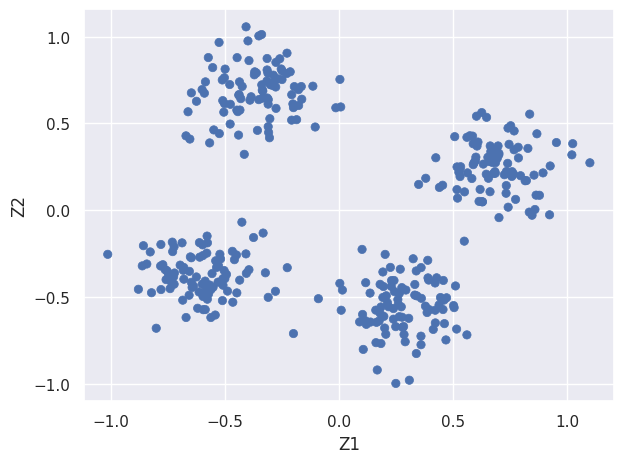

In [101]:
impl_pca = PCA(n_components = 2)
componentes_principales = impl_pca.fit_transform(agua_normal)
W = pd.DataFrame(componentes_principales, columns=['Z1','Z2'])

# Grafico
vis3 = (
    so.Plot(W, W.Z1, W.Z2)
    .add(so.Dot())
)
vis3.show() # Se observan 4 clusters aprox. isotrópicos

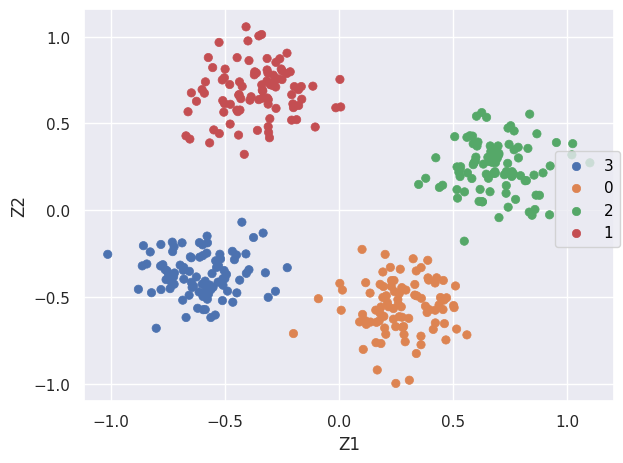

In [108]:
impl_kmedias = KMeans(n_clusters=4) # Instancio la implementación de K-medias de sklearn
etiquetas_agua = impl_kmedias.fit_predict(Z) # Obtengo las clasificaciones (a cual grupo pertenece cada punto)

# Grafico
vis4 = (
    so.Plot(W, W.Z1, W.Z2, color=etiquetas_agua.astype('str'))
    .add(so.Dot())
)
vis4.show()
